# Home Credit Default Risk (HCDR)

The course project is based on the [Home Credit Default Risk (HCDR)  Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk/). The goal of this project is to predict whether or not a client will repay a loan. In order to make sure that people who struggle to get loans due to insufficient or non-existent credit histories have a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.


## Some of the challenges

1. Dataset size 
   * (688 meg uncompressed) with millions of rows of data
   * 2.71 Gig of data uncompressed
* Dealing with missing data
* Imbalanced datasets
* Summarizing transaction data


# Kaggle API setup
Kaggle is a Data Science Competition Platform which shares a lot of datasets. In the past, it was troublesome to submit your result as your have to go through the console in your browser and drag your files there. Now you can interact with Kaggle via the command line. E.g., 

```bash
! kaggle competitions files home-credit-default-risk
```

It is quite easy to setup, it takes me less than 15 minutes to finish a submission.

1. Install library
* Create a API Token (edit your profile on [Kaggle.com](https://www.kaggle.com/)); this produces `kaggle.json` file
* Put your JSON `kaggle.json` in the right place
* Access competition files; make submissions via the command (see examples below)
* Submit result

For more detailed information on setting the Kaggle API see [here](https://medium.com/@nokkk/make-your-kaggle-submissions-with-kaggle-official-api-f49093c04f8a) and [here](https://github.com/Kaggle/kaggle-api).



In [1]:
!pip install kaggle

In [2]:
 !pwd
!ls
!cd /N/home/u010/bhmish/Carbonate/Desktop/'Phase 2'
!rm -rf ~/.kaggle

/home/ec2-user/SageMaker
HCDR_Group24_Phase2.ipynb      home-credit-default-risk  Untitled.ipynb
HCDR_Group24_Phase2_old.ipynb  lost+found
/bin/sh: line 0: cd: /N/home/u010/bhmish/Carbonate/Desktop/Phase 2: No such file or directory


In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat ‘kaggle.json’: No such file or directory
chmod: cannot access ‘/home/ec2-user/.kaggle/kaggle.json’: No such file or directory


In [4]:
! kaggle competitions files home-credit-default-risk

Traceback (most recent call last):
  File "/home/ec2-user/anaconda3/envs/python3/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /home/ec2-user/.kaggle. Or use the environment method.


# Dataset and how to download


## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

## Data files overview
There are 7 different sources of data:

* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [5]:
# ![alt](home_credit.png "Home credit")

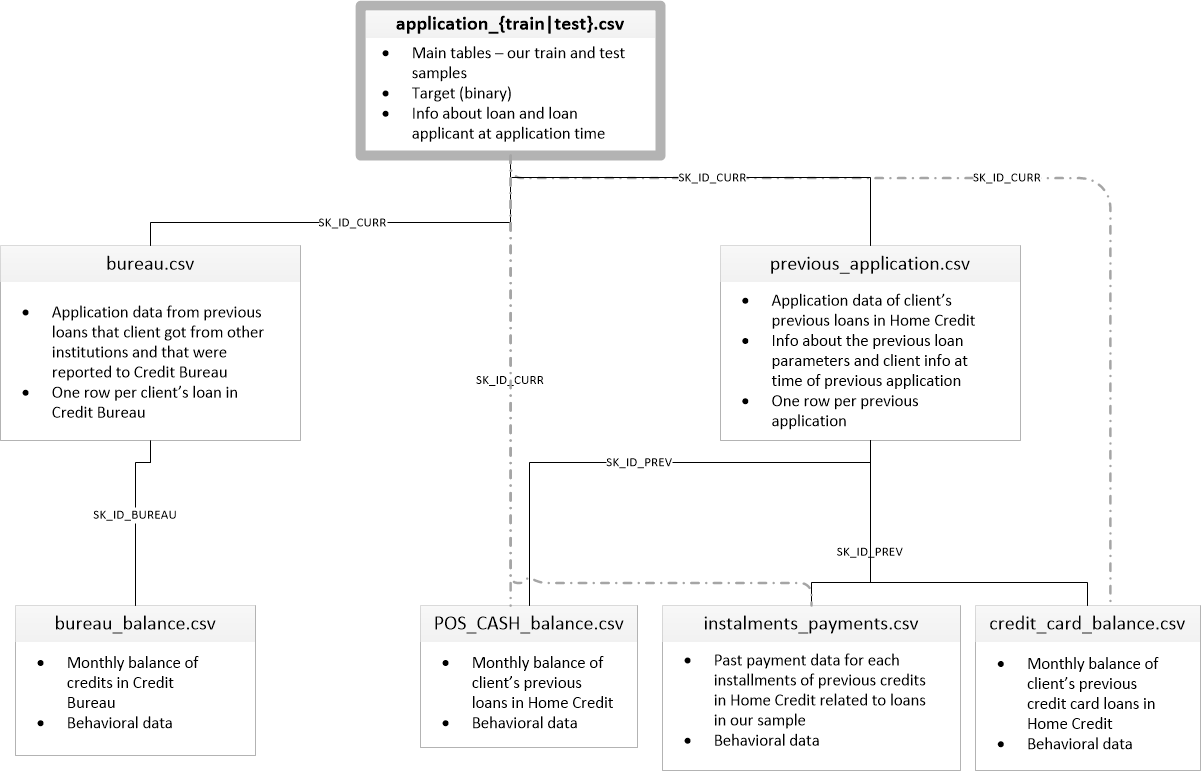

## Downloading the files via Kaggle API

Create a base directory:

```bash
DATA_DIR = "../../../Data/home-credit-default-risk"   #same level as course repo in the data directory
```

Please download the project data files and data dictionary and unzip them using either of the following approaches:

1. Click on the `Download` button on the following [Data Webpage](https://www.kaggle.com/c/home-credit-default-risk/data) and unzip the  zip file to the `BASE_DIR`
2. If you plan to use the Kaggle API, please use the following steps.


In [6]:
DATA_DIR = "home-credit-default-risk/"   #same level as course repo in the data directory
#DATA_DIR = os.path.join('./ddddd/')
#!mkdir $DATA_DIR

In [7]:
!ls -l $DATA_DIR

total 2243424
-rw-rw-r-- 1 ec2-user ec2-user  26567651 Apr 19 23:19 application_test.csv
-rw-rw-r-- 1 ec2-user ec2-user 166133370 Apr 19 23:20 application_train.csv
-rw-rw-r-- 1 ec2-user ec2-user 195035136 Apr 19 23:20 bureau_balance.csv
-rw-rw-r-- 1 ec2-user ec2-user 170016717 Apr 19 23:20 bureau.csv
-rw-rw-r-- 1 ec2-user ec2-user 218103808 Apr 19 23:21 credit_card_balance.csv
-rw-rw-r-- 1 ec2-user ec2-user     37383 Apr 19 23:19 HomeCredit_columns_description.csv
-rw-rw-r-- 1 ec2-user ec2-user 723118349 Apr 19 23:22 installments_payments.csv
-rw-rw-r-- 1 ec2-user ec2-user 392703158 Apr 19 23:22 POS_CASH_balance.csv
-rw-rw-r-- 1 ec2-user ec2-user 404973293 Apr 19 23:22 previous_application.csv
-rw-rw-r-- 1 ec2-user ec2-user    536202 Apr 19 23:19 sample_submission.csv


In [8]:
! kaggle competitions download home-credit-default-risk -p $DATA_DIR

Traceback (most recent call last):
  File "/home/ec2-user/anaconda3/envs/python3/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /home/ec2-user/.kaggle. Or use the environment method.


### Imports

In [9]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [10]:
unzippingReq = False
if unzippingReq: #please modify this code 
    zip_ref = zipfile.ZipFile('application_train.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('application_test.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('bureau_balance.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('bureau.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('credit_card_balance.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('installments_payments.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('POS_CASH_balance.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('previous_application.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()

## Data files overview
### Data Dictionary

As part of the data download comes a  Data Dictionary. It named `HomeCredit_columns_description.csv`

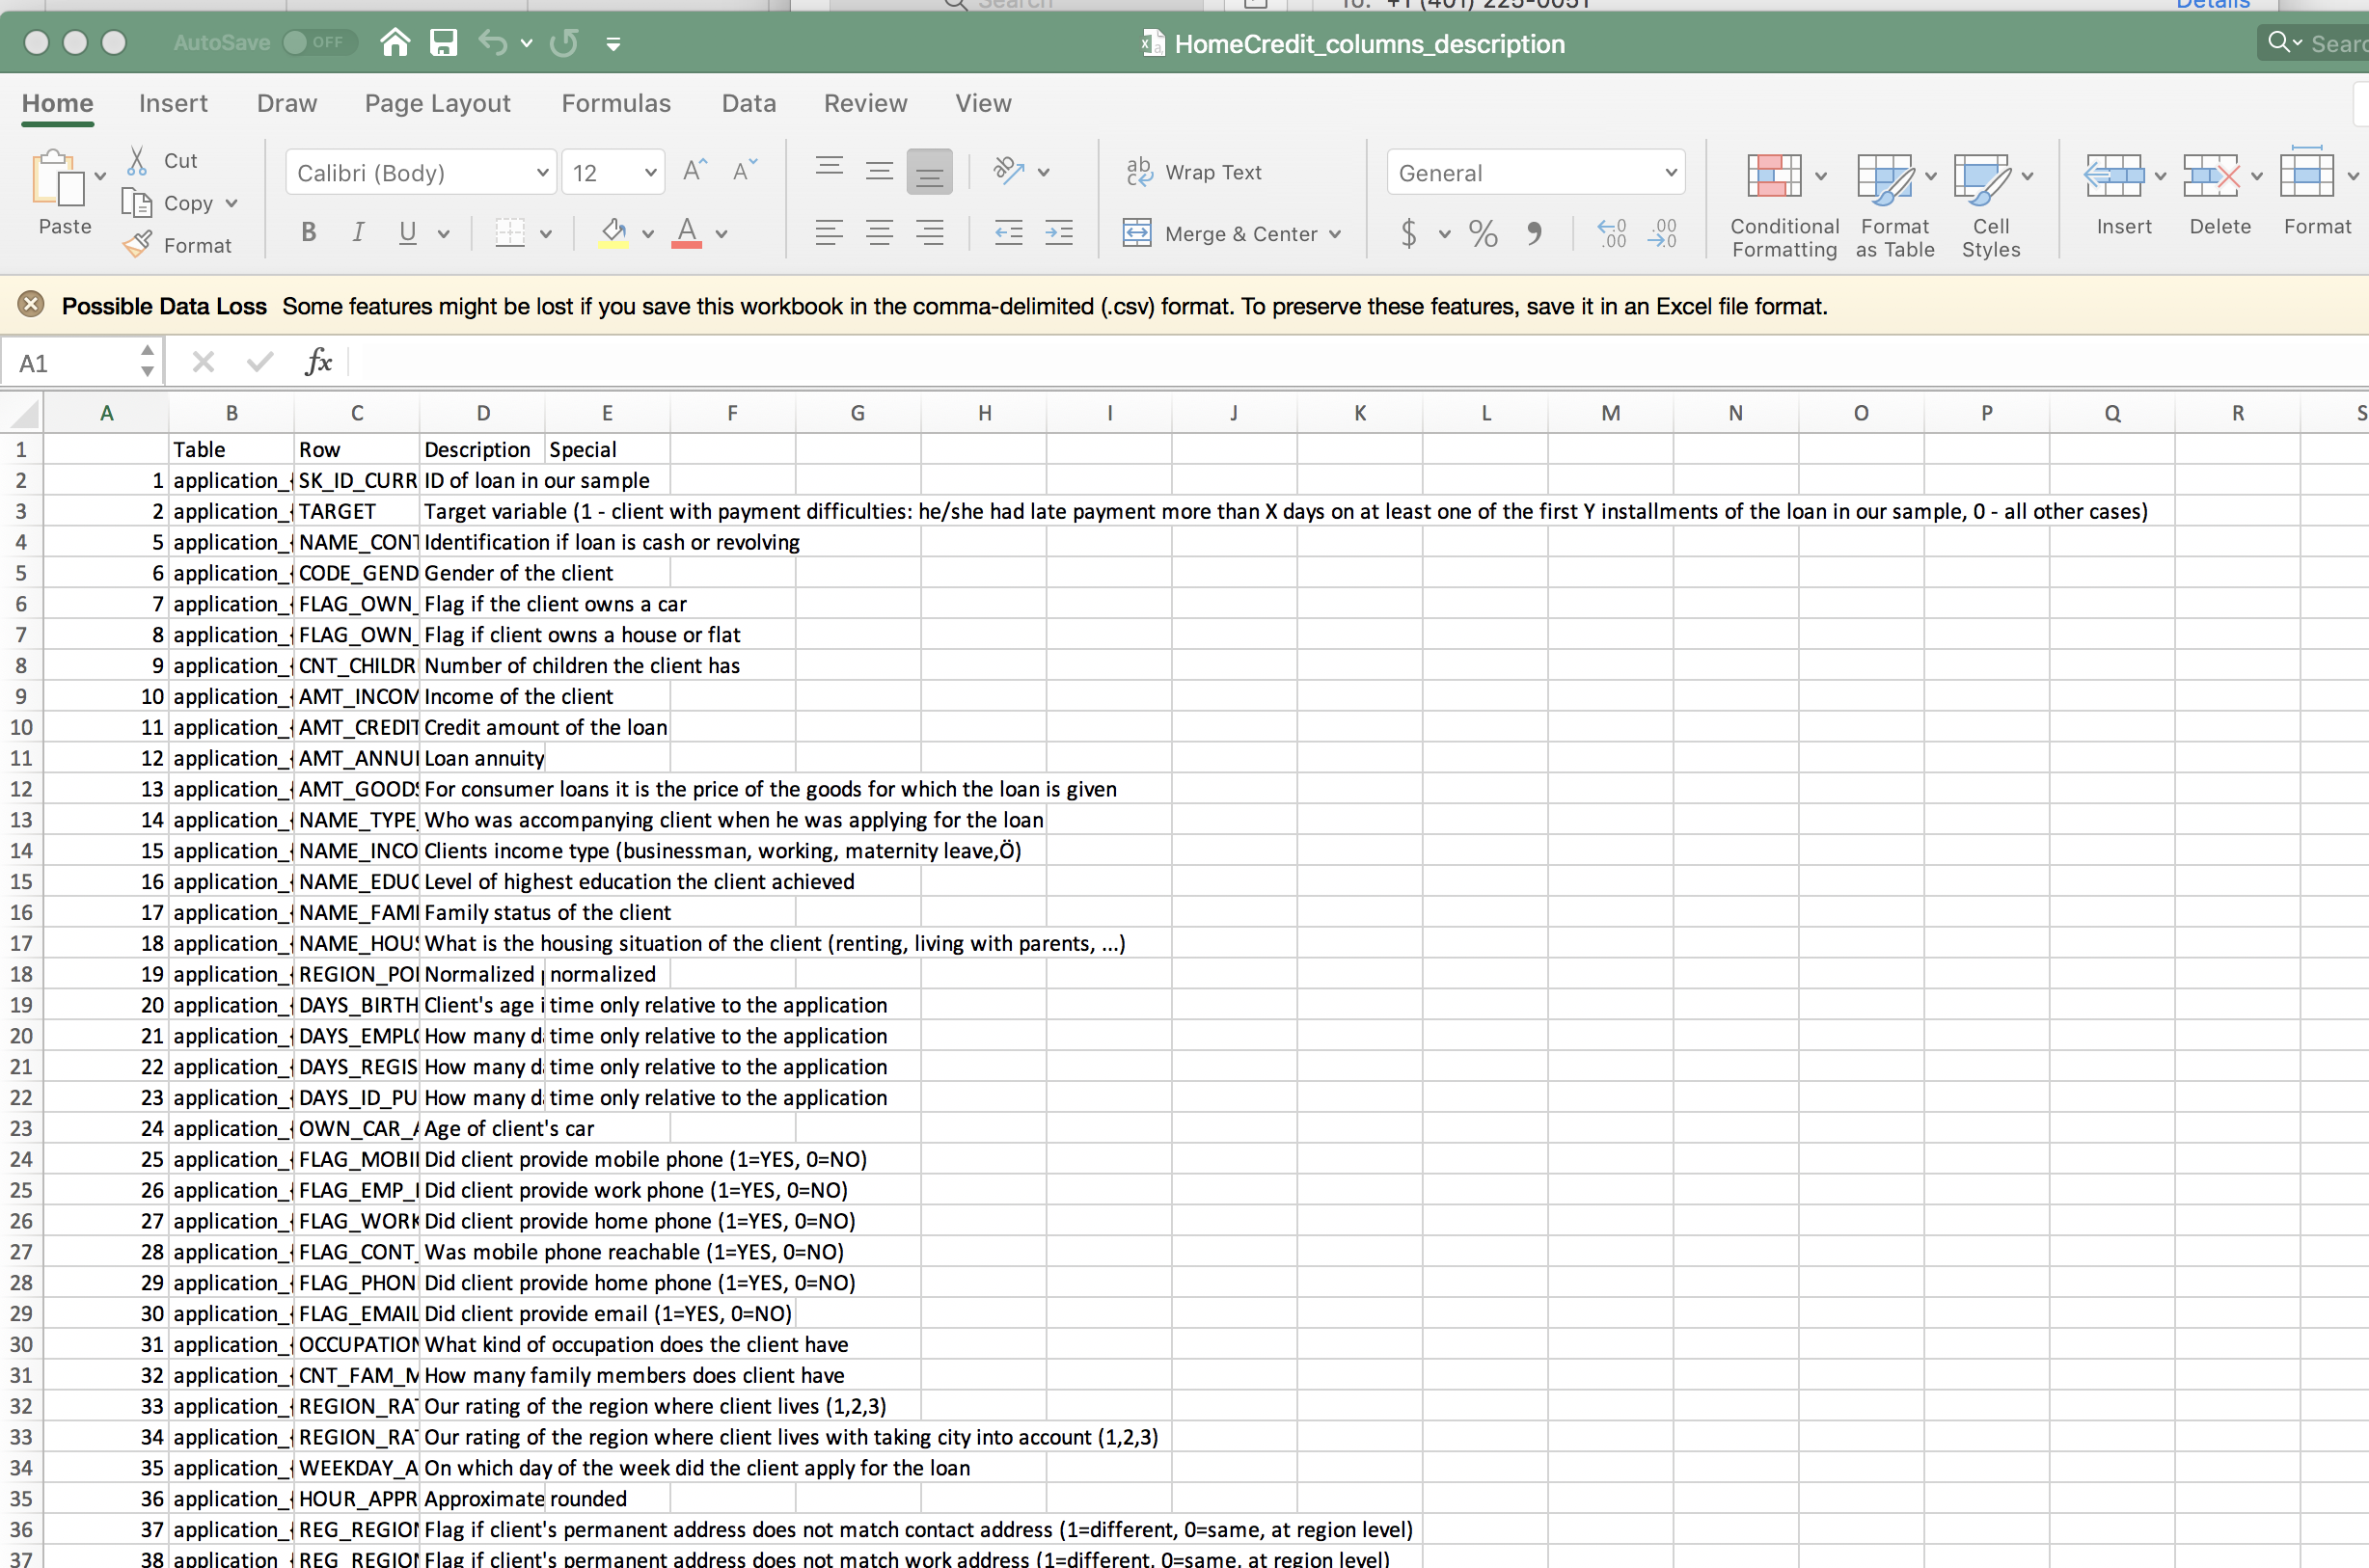

### Application train

In [11]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily
ds_name = ('application_train')
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

datasets['application_train'].shape

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

(307511, 122)

### Application test


* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.


In [12]:
ds_name = 'application_test'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

The application dataset has the most information about the client: Gender, income, family status, education ...

### The Other datasets

* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [13]:
%%time
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)


application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

bureau_balance: shape is (14180260, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14180260 entries, 0 to 14180259
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   SK_ID_BUREAU    int64  
 1   MONTHS_BALANCE  float64
 2   STATUS          object 
dtypes: float64(1), int64(1), object(1)
memory usage: 324.6+ MB
None


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448             0.0      C
1       5715448            -1.0      C
2       5715448            -2.0      C
3       5715448            -3.0      C
4       5715448            -4.0      C

credit_card_balance: shape is (1979436, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1979436 entries, 0 to 1979435
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        float64
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                   1.0                         0.0   
1                       1.0                   1.0                         0.0   
2                       0.0                   0.0                         0.0   
3                       1.0                   1.0                         0.0   
4                       0.0                   1.0                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0     0.0         0.0  
1     0.0         0.0  
2     0.0         0.0  
3     0.0         0.0  
4     0.0         0.0  

[5 rows x 23 columns]

installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

CPU times: user 25 s, sys: 2.86 s, total: 27.9 s
Wall time: 27.9 s


In [14]:
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')


dataset application_train       : [    307,511, 122]
dataset application_test        : [     48,744, 121]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 14,180,260, 3]
dataset credit_card_balance     : [  1,979,436, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


# Exploratory Data Analysis

## EDA of Application train

In [15]:
datasets["application_train"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [16]:
datasets["application_train"].describe() #numerical only features

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [17]:
datasets["application_train"].describe(include='all') #looking at all categorical and numerical

SK_ID_CURR         TARGET NAME_CONTRACT_TYPE CODE_GENDER  \
count   307511.000000  307511.000000             307511      307511   
unique            NaN            NaN                  2           3   
top               NaN            NaN         Cash loans           F   
freq              NaN            NaN             278232      202448   
mean    278180.518577       0.080729                NaN         NaN   
std     102790.175348       0.272419                NaN         NaN   
min     100002.000000       0.000000                NaN         NaN   
25%     189145.500000       0.000000                NaN         NaN   
50%     278202.000000       0.000000                NaN         NaN   
75%     367142.500000       0.000000                NaN         NaN   
max     456255.000000       1.000000                NaN         NaN   

       FLAG_OWN_CAR FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count        307511          307511  307511.000000      3.075110e+05   
unique            2               2            NaN               NaN   
top               N               Y            NaN               NaN   
freq         202924          213312            NaN               NaN   
mean            NaN             NaN       0.417052      1.687979e+05   
std             NaN             NaN       0.722121      2.371231e+05   
min             NaN             NaN       0.000000      2.565000e+04   
25%             NaN             NaN       0.000000      1.125000e+05   
50%             NaN             NaN       0.000000      1.471500e+05   
75%             NaN             NaN       1.000000      2.025000e+05   
max             NaN             NaN      19.000000      1.170000e+08   

          AMT_CREDIT    AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
count   3.075110e+05  307499.000000  ...     307511.000000    307511.000000   
unique           NaN            NaN  ...               NaN              NaN   
top              NaN            NaN  ...               NaN              NaN   
freq             NaN            NaN  ...               NaN              NaN   
mean    5.990260e+05   27108.573909  ...          0.008130         0.000595   
std     4.024908e+05   14493.737315  ...          0.089798         0.024387   
min     4.500000e+04    1615.500000  ...          0.000000         0.000000   
25%     2.700000e+05   16524.000000  ...          0.000000         0.000000   
50%     5.135310e+05   24903.000000  ...          0.000000         0.000000   
75%     8.086500e+05   34596.000000  ...          0.000000         0.000000   
max     4.050000e+06  258025.500000  ...          1.000000         1.000000   

       FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
count     307511.000000    307511.000000              265992.000000   
unique              NaN              NaN                        NaN   
top                 NaN              NaN                        NaN   
freq                NaN              NaN                        NaN   
mean           0.000507         0.000335                   0.006402   
std            0.022518         0.018299                   0.083849   
min            0.000000         0.000000                   0.000000   
25%            0.000000         0.000000                   0.000000   
50%            0.000000         0.000000                   0.000000   
75%            0.000000         0.000000                   0.000000   
max            1.000000         1.000000                   4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
unique                       NaN                         NaN   
top                          NaN                         NaN   
freq                         NaN                         NaN   
mean                    0.007000                    0.034362   
std                     0.110757                    0.204685   
min                     0.000000           

In [18]:
datasets["application_train"].shape

(307511, 122)

Total number of records: 307511

Total number of columns: 122


### Missing data for application train

In [19]:
datasets["application_train"].isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [20]:
features_with_null = datasets["application_train"].isnull().sum()

In [21]:
print("Features with Null values",features_with_null[features_with_null>0])

Features with Null values AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 67, dtype: int64


In [22]:
print("Count of features with Null values",features_with_null[features_with_null>0].count())

Count of features with Null values 67


In [23]:
features_with_null = pd.DataFrame(features_with_null)
features_with_null.columns = ['Count']
features_with_null.index.names = ['Feature']
features_with_null['Feature'] = features_with_null.index
features_with_null.head(20)

Count                     Feature
Feature                                                      
SK_ID_CURR                      0                  SK_ID_CURR
TARGET                          0                      TARGET
NAME_CONTRACT_TYPE              0          NAME_CONTRACT_TYPE
CODE_GENDER                     0                 CODE_GENDER
FLAG_OWN_CAR                    0                FLAG_OWN_CAR
FLAG_OWN_REALTY                 0             FLAG_OWN_REALTY
CNT_CHILDREN                    0                CNT_CHILDREN
AMT_INCOME_TOTAL                0            AMT_INCOME_TOTAL
AMT_CREDIT                      0                  AMT_CREDIT
AMT_ANNUITY                    12                 AMT_ANNUITY
AMT_GOODS_PRICE               278             AMT_GOODS_PRICE
NAME_TYPE_SUITE              1292             NAME_TYPE_SUITE
NAME_INCOME_TYPE                0            NAME_INCOME_TYPE
NAME_EDUCATION_TYPE             0         NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS              0          NAME_FAMILY_STATUS
NAME_HOUSING_TYPE               0           NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE      0  REGION_POPULATION_RELATIVE
DAYS_BIRTH                      0                  DAYS_BIRTH
DAYS_EMPLOYED                   0               DAYS_EMPLOYED
DAYS_REGISTRATION               0           DAYS_REGISTRATION

In [24]:
features_with_null[features_with_null['Count']>(len(datasets["application_train"])/2)].count()

Count      41
Feature    41
dtype: int64

In [25]:
len(datasets["application_train"])

307511

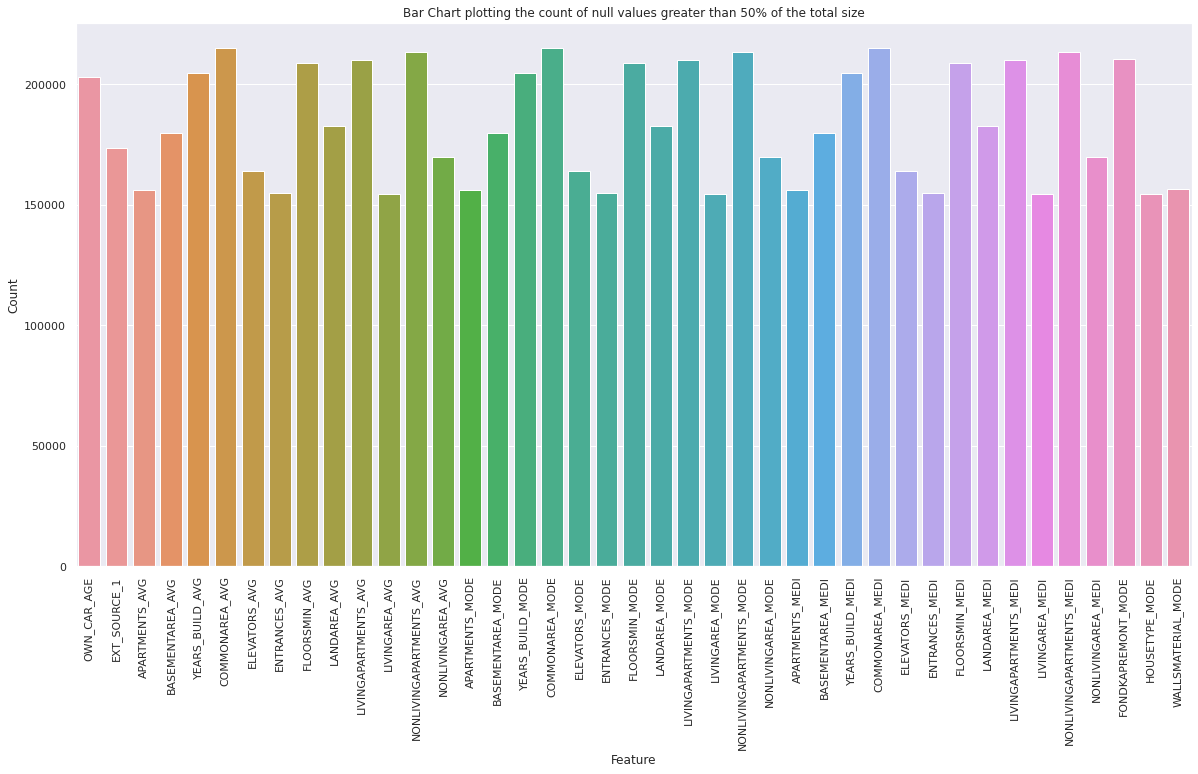

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(20,10),})
sns.barplot(x ='Feature' , y ='Count' , data = features_with_null[features_with_null['Count'] > (len(datasets["application_train"])/2) ])
plt.title("Bar Chart plotting the count of null values greater than 50% of the total size")
plt.xticks(rotation = 90)
plt.show()

In [27]:
percent = (datasets["application_train"].isnull().sum()/datasets["application_train"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_train"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

Percent  Train Missing Count
Feature                                               
COMMONAREA_MEDI             69.87               214865
COMMONAREA_AVG              69.87               214865
COMMONAREA_MODE             69.87               214865
NONLIVINGAPARTMENTS_MODE    69.43               213514
NONLIVINGAPARTMENTS_MEDI    69.43               213514
NONLIVINGAPARTMENTS_AVG     69.43               213514
FONDKAPREMONT_MODE          68.39               210295
LIVINGAPARTMENTS_MEDI       68.35               210199
LIVINGAPARTMENTS_MODE       68.35               210199
LIVINGAPARTMENTS_AVG        68.35               210199
FLOORSMIN_MEDI              67.85               208642
FLOORSMIN_MODE              67.85               208642
FLOORSMIN_AVG               67.85               208642
YEARS_BUILD_MEDI            66.50               204488
YEARS_BUILD_AVG             66.50               204488
YEARS_BUILD_MODE            66.50               204488
OWN_CAR_AGE                 65.99               202929
LANDAREA_MODE               59.38               182590
LANDAREA_AVG                59.38               182590
LANDAREA_MEDI               59.38               182590

So we have figured out that around 67 columns have null records and 47 of them have null values greater than 50% of the number of records

### Distribution of the target column 

Text(0.5, 1.0, 'Distribution of target column')

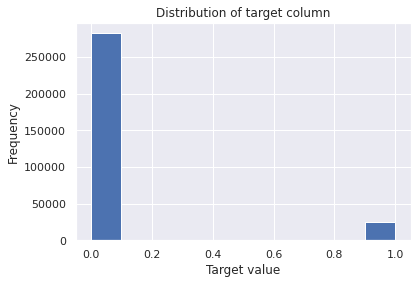

In [28]:
plt.figure(figsize=(6,4))
datasets["application_train"]['TARGET'].astype(int).plot.hist();
plt.xlabel("Target value")
plt.title("Distribution of target column")

So from the distribution we can see, more than 275000 people has paid back the loan on time

### Categorical Feature Analysis of Application train data set

#### Distribution based on gender

Text(0.5, 1.0, 'Distribution of target column based on Gender')

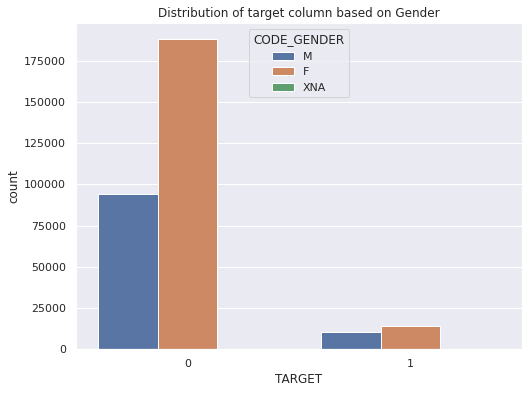

In [29]:
gender = datasets["application_train"]['CODE_GENDER']
plt.figure(figsize=(8,6))
sns.countplot(data =datasets["application_train"], x= datasets["application_train"]['TARGET'], hue=gender )
plt.title("Distribution of target column based on Gender")

So it is clear from the count plot that females are availing more credits compared to that of males

In [30]:
## Function to plot the stacked bar graph
def univariate_analysis(data, col1, col2='TARGET', top=False):
    
    temp = pd.DataFrame(data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()
    temp['total'] = pd.DataFrame(data.groupby(col1)[col2].agg(total='count')).reset_index()['total']
    temp['Avg'] = pd.DataFrame(data.groupby(col1)[col2].agg(Avg='mean')).reset_index()['Avg']  
    temp.sort_values(by=['total'],inplace=True, ascending=False)  
    if top:
        temp = temp[0:top]  
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(10))


def stack_plot(data, xtick, col2='TARGET', col3='total'):
    ind = np.arange(data.shape[0])
    
    if len(data[xtick].unique())<7:
        plt.figure(figsize=(5,5))
    else:
        plt.figure(figsize=(10,10))
    p1 = plt.bar(ind, data[col3].values,color=['blue'])
    p2 = plt.bar(ind, data[col2].values,color=['red'])
    plt.ylabel('Loans')
    plt.title('Loans Approved vs Rejected')
    plt.xticks(ticks=ind,rotation=90,labels= list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('Capable', 'Incapable'))
    plt.show()


#### Analysis based on the Gender

CODE_GENDER column giving the gender of the applicant

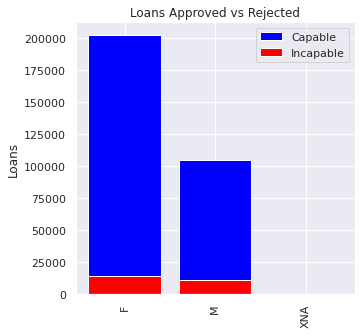

  CODE_GENDER  TARGET   total       Avg
0           F   14170  202448  0.069993
1           M   10655  105059  0.101419
2         XNA       0       4  0.000000


In [31]:
univariate_analysis(datasets['application_train'], 'CODE_GENDER', col2='TARGET', top=False)

- From the above stacked bar chart we can see that there are more than 200000 female applicants.
- There are more than 100000 male applicants
- Around 12500 female applicants and around the same amount of male applicanats are inacpable of paying back the loan

#### Distribution based on number of children

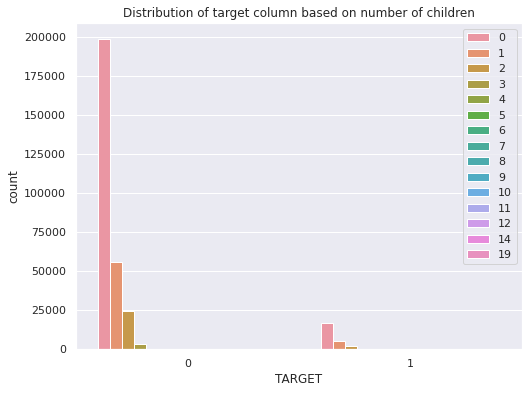

In [32]:
cnt_child = datasets["application_train"]['CNT_CHILDREN']
plt.figure(figsize=(8,6))
sns.countplot(data =datasets["application_train"], x= datasets["application_train"]['TARGET'], hue=cnt_child )
plt.title("Distribution of target column based on number of children")
plt.legend(loc=1)

#### Analysis based on the Number of Children

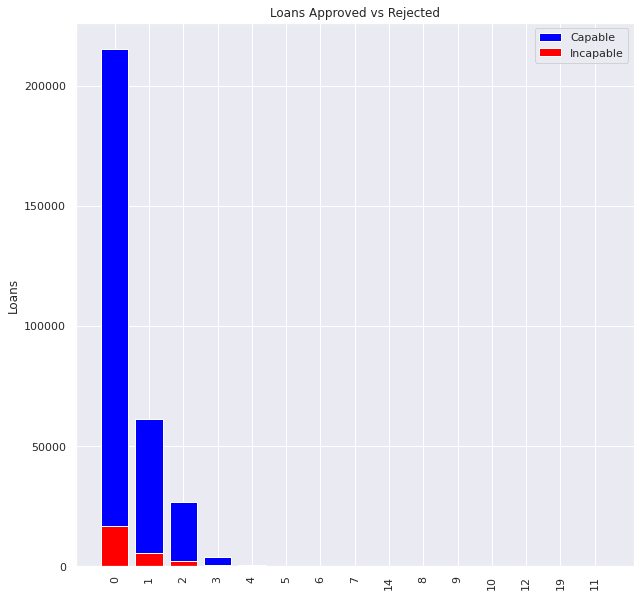

    CNT_CHILDREN  TARGET   total       Avg
0              0   16609  215371  0.077118
1              1    5454   61119  0.089236
2              2    2333   26749  0.087218
3              3     358    3717  0.096314
4              4      55     429  0.128205
5              5       7      84  0.083333
6              6       6      21  0.285714
7              7       0       7  0.000000
13            14       0       3  0.000000
8              8       0       2  0.000000


In [33]:
univariate_analysis(datasets['application_train'], 'CNT_CHILDREN', col2='TARGET', top=False)

- Applicants with no children are taking more loans
- Applicants with no children have more chance of paying back the loan


#### Analysis based on the contract type

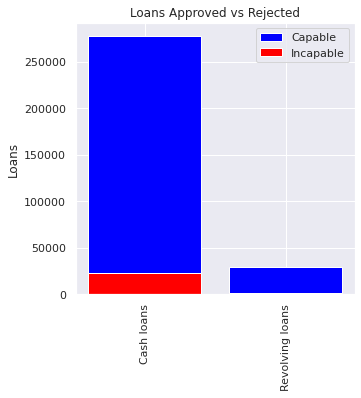

  NAME_CONTRACT_TYPE  TARGET   total       Avg
0         Cash loans   23221  278232  0.083459
1    Revolving loans    1604   29279  0.054783


In [34]:
univariate_analysis(datasets['application_train'], 'NAME_CONTRACT_TYPE', col2='TARGET', top=False)

- Number of cash loan takers are more compared to that of the revolving loans
- Revolving loan takeres will not be incapable of paying back the loan

#### Analysis based on the pocession of a car

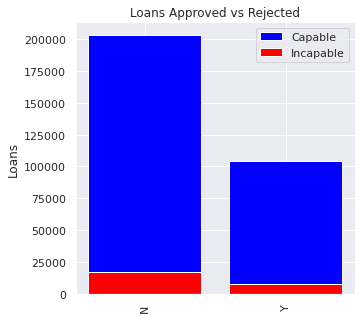

  FLAG_OWN_CAR  TARGET   total       Avg
0            N   17249  202924  0.085002
1            Y    7576  104587  0.072437


In [35]:
univariate_analysis(datasets['application_train'], 'FLAG_OWN_CAR', col2='TARGET', top=False)

- Most loan applicants does not own a car
- High number of applicants without car are capable of paying back the loan

#### Analysis based on the reality owned

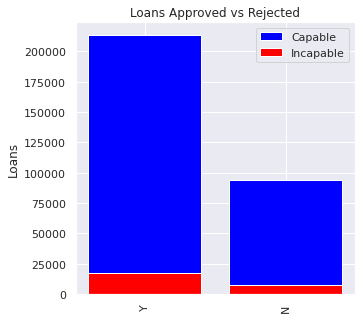

  FLAG_OWN_REALTY  TARGET   total       Avg
1               Y   16983  213312  0.079616
0               N    7842   94199  0.083249


In [36]:
univariate_analysis(datasets['application_train'], 'FLAG_OWN_REALTY', col2='TARGET', top=False)

- Most loan applicants are looking for realty owned properties


### Numerical Feature Analysis of Application train data set


#### Analysis based on the AMT_CREDIT

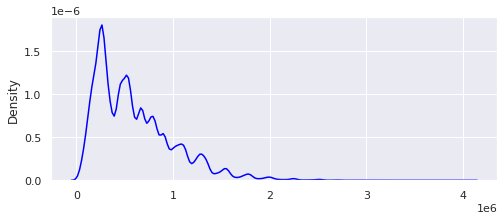

In [37]:
plt.figure(figsize=(8,3))
sns.kdeplot(datasets['application_train']['AMT_CREDIT'].values, color='blue')
plt.show()

- From the distribution we can see most of the credit amount is less than 10,000,00

#### Analysis based on the AMT_ANNUITY

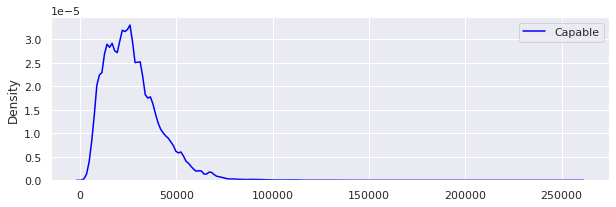

In [38]:
plt.figure(figsize=(10,3))
sns.kdeplot(datasets['application_train']['AMT_ANNUITY'].values,label="Capable", color='blue')
plt.legend()
plt.show()

- From the distribution we can see most of the credit amount is less than 10,000,00

#### Distribution on the  Applicants Age 

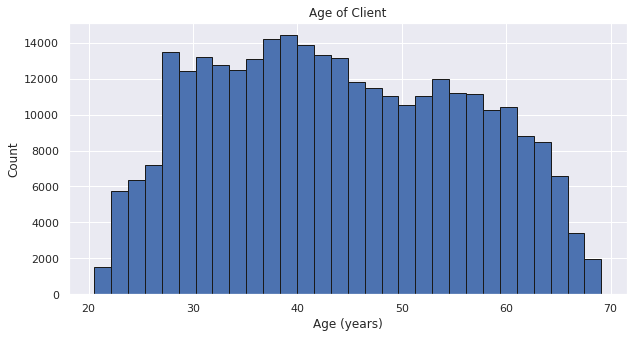

In [39]:
plt.figure(figsize=(10,5))
plt.hist(datasets["application_train"]['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 30)
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

- So we can see from the distribution more applicants are in the range of 30-60

#### Distribution of Applicants occupations

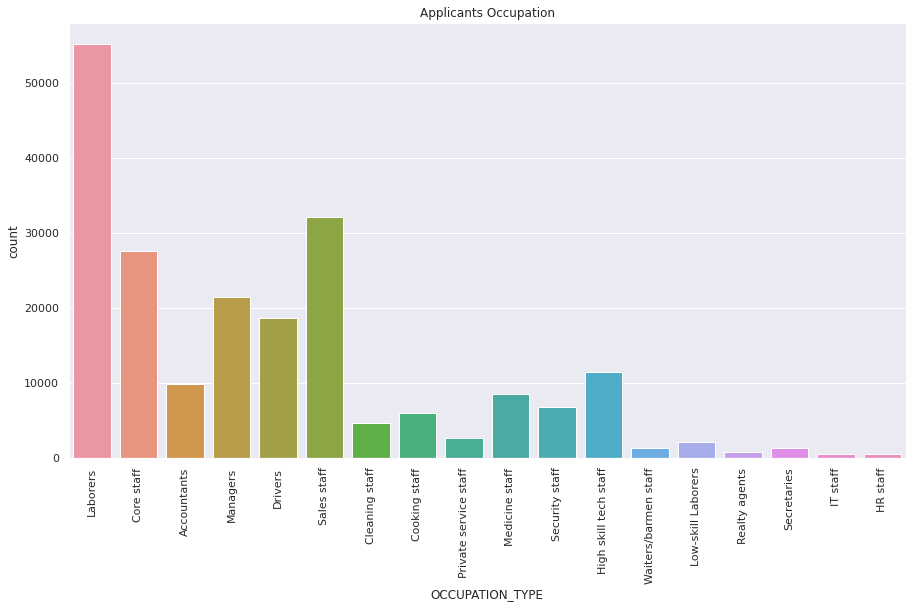

In [40]:
plt.figure(figsize=(15,8))
sns.countplot(x='OCCUPATION_TYPE', data=datasets["application_train"]);
plt.title('Applicants Occupation');
plt.xticks(rotation=90);
plt.show()

- Applicants with the occupation Laborers have the most number of application

### Correlation Anlysis with  the target column 

In [41]:
correlations = datasets["application_train"].corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 Feature
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 Feature
EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


In [42]:
correlations = pd.DataFrame(correlations, columns = ['TARGET'])

In [43]:
#Top 5 correlated values
correlations["ABS_TARGET"] = np.abs(correlations)
correlations.nlargest(6, ['ABS_TARGET'])


TARGET  ABS_TARGET
Feature                                          
TARGET                       1.000000    1.000000
EXT_SOURCE_3                -0.178919    0.178919
EXT_SOURCE_2                -0.160472    0.160472
EXT_SOURCE_1                -0.155317    0.155317
DAYS_BIRTH                   0.078239    0.078239
REGION_RATING_CLIENT_W_CITY  0.060893    0.060893

<Figure size 1080x1080 with 0 Axes>

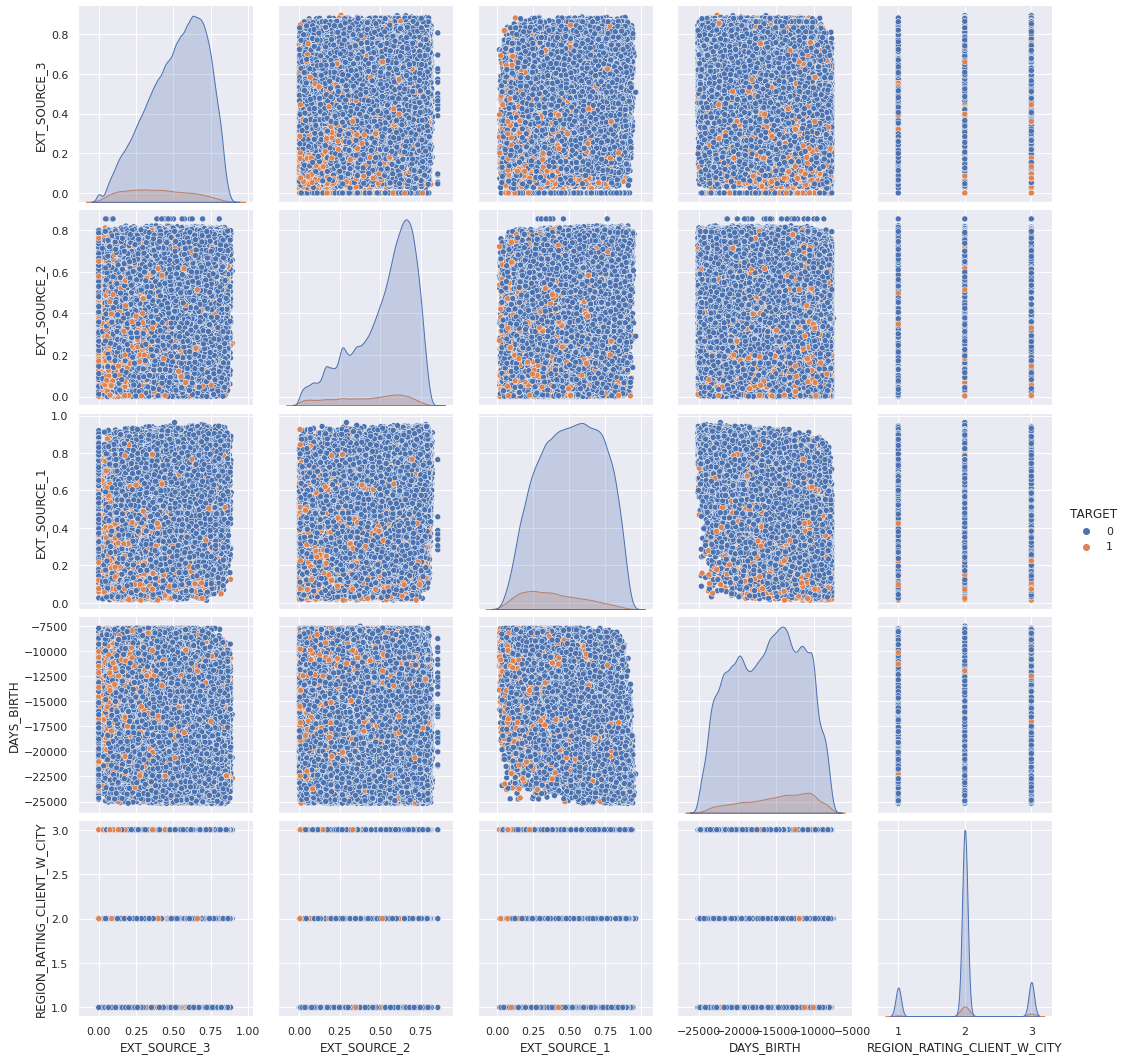

In [44]:
plt.figure(figsize=(15,15))
cols = ["EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1","DAYS_BIRTH","REGION_RATING_CLIENT_W_CITY"]
sns.pairplot(data = datasets["application_train"], hue="TARGET", vars = cols, height=3)
plt.show()

In [45]:
corr = correlations.nlargest(10, ['ABS_TARGET'])

In [46]:
corr_hm = corr.drop(["ABS_TARGET"],axis=1)
corr_hm

TARGET
Feature                              
TARGET                       1.000000
EXT_SOURCE_3                -0.178919
EXT_SOURCE_2                -0.160472
EXT_SOURCE_1                -0.155317
DAYS_BIRTH                   0.078239
REGION_RATING_CLIENT_W_CITY  0.060893
REGION_RATING_CLIENT         0.058899
DAYS_LAST_PHONE_CHANGE       0.055218
DAYS_ID_PUBLISH              0.051457
REG_CITY_NOT_WORK_CITY       0.050994

[Text(0.5, 1.0, 'Heat Map for the top 10 correlated values with Target')]

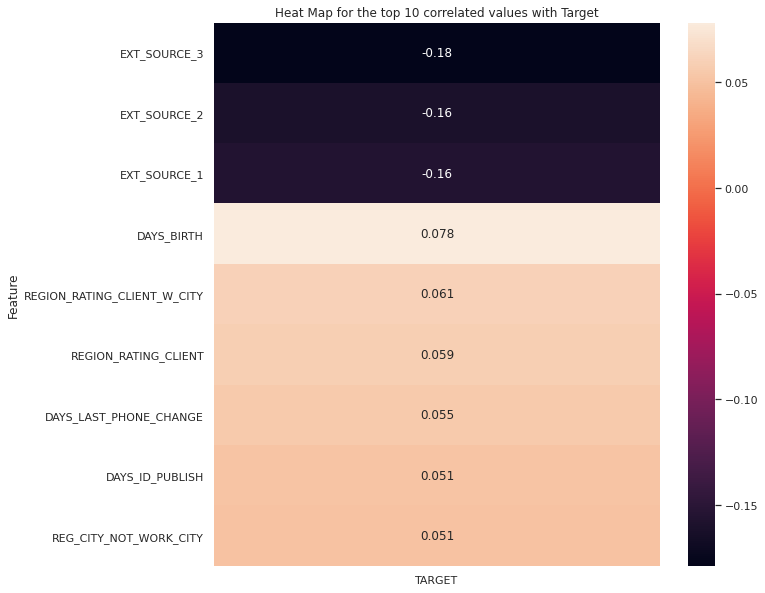

In [47]:
plt.figure(figsize=(10,10))
hm = sns.heatmap(corr_hm[1:], annot = True)
hm.set(title = "Heat Map for the top 10 correlated values with Target")

<Figure size 1080x504 with 0 Axes>

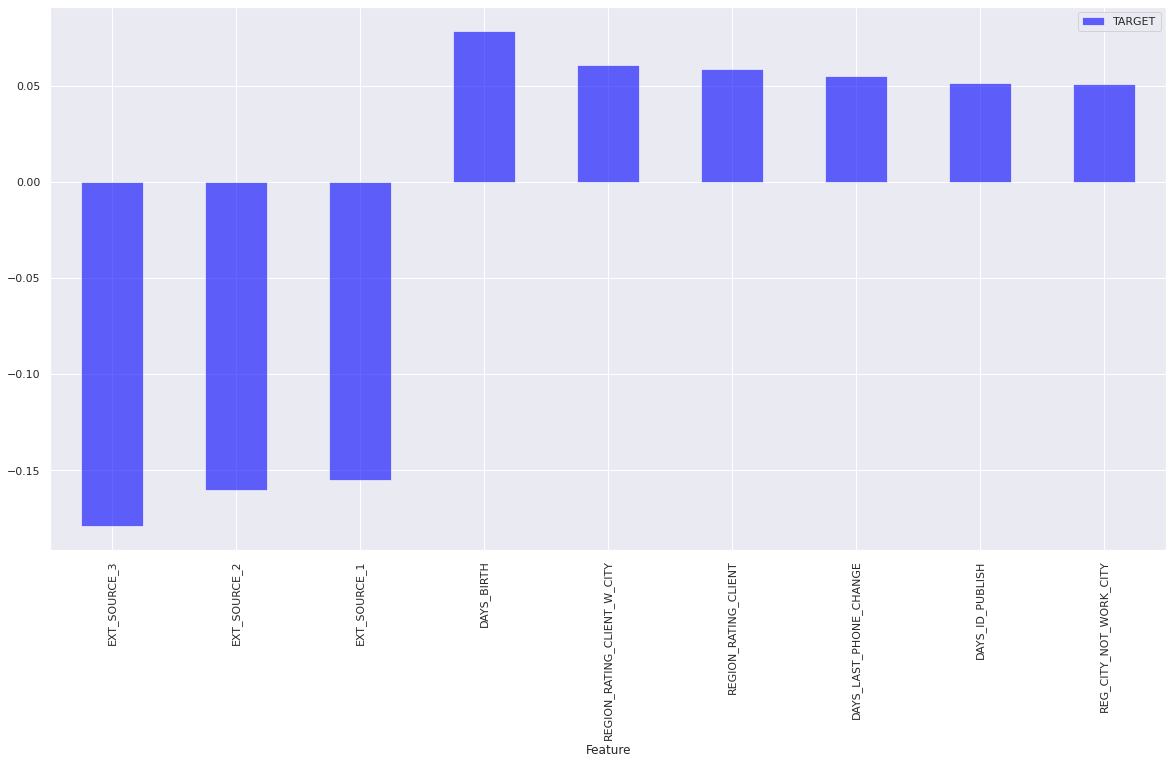

In [48]:
plt.figure(figsize=(15,7))
plot = corr_hm[1:].plot(kind = 'bar', color = 'blue',alpha =0.6)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

In [49]:
percent = (datasets["application_test"].isnull().sum()/datasets["application_test"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_test"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_train_data.head(20)

Percent  Test Missing Count
COMMONAREA_MEDI             68.72               33495
COMMONAREA_AVG              68.72               33495
COMMONAREA_MODE             68.72               33495
NONLIVINGAPARTMENTS_MODE    68.41               33347
NONLIVINGAPARTMENTS_MEDI    68.41               33347
NONLIVINGAPARTMENTS_AVG     68.41               33347
FONDKAPREMONT_MODE          67.28               32797
LIVINGAPARTMENTS_AVG        67.25               32780
LIVINGAPARTMENTS_MEDI       67.25               32780
LIVINGAPARTMENTS_MODE       67.25               32780
FLOORSMIN_MEDI              66.61               32466
FLOORSMIN_MODE              66.61               32466
FLOORSMIN_AVG               66.61               32466
OWN_CAR_AGE                 66.29               32312
YEARS_BUILD_MEDI            65.28               31818
YEARS_BUILD_MODE            65.28               31818
YEARS_BUILD_AVG             65.28               31818
LANDAREA_AVG                57.96               28254
LANDAREA_MODE               57.96               28254
LANDAREA_MEDI               57.96               28254

## EDA of Bureau and Bureau Balance

In [50]:
datasets['bureau'].head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [51]:
datasets['bureau'].describe()

SK_ID_CURR  SK_ID_BUREAU   DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
count  1.716428e+06  1.716428e+06  1.716428e+06        1.716428e+06   
mean   2.782149e+05  5.924434e+06 -1.142108e+03        8.181666e-01   
std    1.029386e+05  5.322657e+05  7.951649e+02        3.654443e+01   
min    1.000010e+05  5.000000e+06 -2.922000e+03        0.000000e+00   
25%    1.888668e+05  5.463954e+06 -1.666000e+03        0.000000e+00   
50%    2.780550e+05  5.926304e+06 -9.870000e+02        0.000000e+00   
75%    3.674260e+05  6.385681e+06 -4.740000e+02        0.000000e+00   
max    4.562550e+05  6.843457e+06  0.000000e+00        2.792000e+03   

       DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
count         1.610875e+06       1.082775e+06            5.919400e+05   
mean          5.105174e+02      -1.017437e+03            3.825418e+03   
std           4.994220e+03       7.140106e+02            2.060316e+05   
min          -4.206000e+04      -4.202300e+04            0.000000e+00   
25%          -1.138000e+03      -1.489000e+03            0.000000e+00   
50%          -3.300000e+02      -8.970000e+02            0.000000e+00   
75%           4.740000e+02      -4.250000e+02            0.000000e+00   
max           3.119900e+04       0.000000e+00            1.159872e+08   

       CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
count        1.716428e+06    1.716415e+06         1.458759e+06   
mean         6.410406e-03    3.549946e+05         1.370851e+05   
std          9.622391e-02    1.149811e+06         6.774011e+05   
min          0.000000e+00    0.000000e+00        -4.705600e+06   
25%          0.000000e+00    5.130000e+04         0.000000e+00   
50%          0.000000e+00    1.255185e+05         0.000000e+00   
75%          0.000000e+00    3.150000e+05         4.015350e+04   
max          9.000000e+00    5.850000e+08         1.701000e+08   

       AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  DAYS_CREDIT_UPDATE  \
count          1.124648e+06            1.716428e+06        1.716428e+06   
mean           6.229515e+03            3.791276e+01       -5.937483e+02   
std            4.503203e+04            5.937650e+03        7.207473e+02   
min           -5.864061e+05            0.000000e+00       -4.194700e+04   
25%            0.000000e+00            0.000000e+00       -9.080000e+02   
50%            0.000000e+00            0.000000e+00       -3.950000e+02   
75%            0.000000e+00            0.000000e+00       -3.300000e+01   
max            4.705600e+06            3.756681e+06        3.720000e+02   

        AMT_ANNUITY  
count  4.896370e+05  
mean   1.571276e+04  
std    3.258269e+05  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    1.350000e+04  
max    1.184534e+08

In [52]:
datasets['bureau'].describe(include='all')

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  \
count   1.716428e+06  1.716428e+06       1716428         1716428   
unique           NaN           NaN             4               4   
top              NaN           NaN        Closed      currency 1   
freq             NaN           NaN       1079273         1715020   
mean    2.782149e+05  5.924434e+06           NaN             NaN   
std     1.029386e+05  5.322657e+05           NaN             NaN   
min     1.000010e+05  5.000000e+06           NaN             NaN   
25%     1.888668e+05  5.463954e+06           NaN             NaN   
50%     2.780550e+05  5.926304e+06           NaN             NaN   
75%     3.674260e+05  6.385681e+06           NaN             NaN   
max     4.562550e+05  6.843457e+06           NaN             NaN   

         DAYS_CREDIT  CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  \
count   1.716428e+06        1.716428e+06         1.610875e+06   
unique           NaN                 NaN                  NaN   
top              NaN                 NaN                  NaN   
freq             NaN                 NaN                  NaN   
mean   -1.142108e+03        8.181666e-01         5.105174e+02   
std     7.951649e+02        3.654443e+01         4.994220e+03   
min    -2.922000e+03        0.000000e+00        -4.206000e+04   
25%    -1.666000e+03        0.000000e+00        -1.138000e+03   
50%    -9.870000e+02        0.000000e+00        -3.300000e+02   
75%    -4.740000e+02        0.000000e+00         4.740000e+02   
max     0.000000e+00        2.792000e+03         3.119900e+04   

        DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  \
count        1.082775e+06            5.919400e+05        1.716428e+06   
unique                NaN                     NaN                 NaN   
top                   NaN                     NaN                 NaN   
freq                  NaN                     NaN                 NaN   
mean        -1.017437e+03            3.825418e+03        6.410406e-03   
std          7.140106e+02            2.060316e+05        9.622391e-02   
min         -4.202300e+04            0.000000e+00        0.000000e+00   
25%         -1.489000e+03            0.000000e+00        0.000000e+00   
50%         -8.970000e+02            0.000000e+00        0.000000e+00   
75%         -4.250000e+02            0.000000e+00        0.000000e+00   
max          0.000000e+00            1.159872e+08        9.000000e+00   

        AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  \
count     1.716415e+06         1.458759e+06          1.124648e+06   
unique             NaN                  NaN                   NaN   
top                NaN                  NaN                   NaN   
freq               NaN                  NaN                   NaN   
mean      3.549946e+05         1.370851e+05          6.229515e+03   
std       1.149811e+06         6.774011e+05          4.503203e+04   
min       0.000000e+00        -4.705600e+06         -5.864061e+05   
25%       5.130000e+04         0.000000e+00          0.000000e+00   
50%       1.255185e+05         0.000000e+00          0.000000e+00   
75%       3.150000e+05         4.015350e+04          0.000000e+00   
max       5.850000e+08         1.701000e+08          4.705600e+06   

        AMT_CREDIT_SUM_OVERDUE      CREDIT_TYPE  DAYS_CREDIT_UPDATE  \
count             1.716428e+06          1716428        1.716428e+06   
unique                     NaN               15                 NaN   
top                        NaN  Consumer credit                 NaN   
freq                       NaN          1251615                 NaN   
mean              3.791276e+01              NaN       -5.937483e+02   
std               5.937650e+03              NaN        7.207473e+02   
min               0.000000e+00              NaN       -4.194700e+04   
25%               0.000000e+00              NaN       -9.080000e+02   
50%               0.000000e+00              NaN       -3.950000e+02

In [53]:
datasets['bureau'].shape

(1716428, 17)

In [54]:
datasets['bureau'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [55]:
missing_val = datasets['bureau'].isnull().sum()
missing_val

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [56]:
print("Features with missing values:",missing_val[missing_val>0].count())

Features with missing values: 7


In [57]:
features_with_null = pd.DataFrame(missing_val)
features_with_null.columns = ['Count']
features_with_null.index.names = ['Feature']
features_with_null['Feature'] = features_with_null.index
features_with_null[features_with_null["Count"]>0].head(7)

Count                 Feature
Feature                                                
DAYS_CREDIT_ENDDATE      105553     DAYS_CREDIT_ENDDATE
DAYS_ENDDATE_FACT        633653       DAYS_ENDDATE_FACT
AMT_CREDIT_MAX_OVERDUE  1124488  AMT_CREDIT_MAX_OVERDUE
AMT_CREDIT_SUM               13          AMT_CREDIT_SUM
AMT_CREDIT_SUM_DEBT      257669     AMT_CREDIT_SUM_DEBT
AMT_CREDIT_SUM_LIMIT     591780    AMT_CREDIT_SUM_LIMIT
AMT_ANNUITY             1226791             AMT_ANNUITY

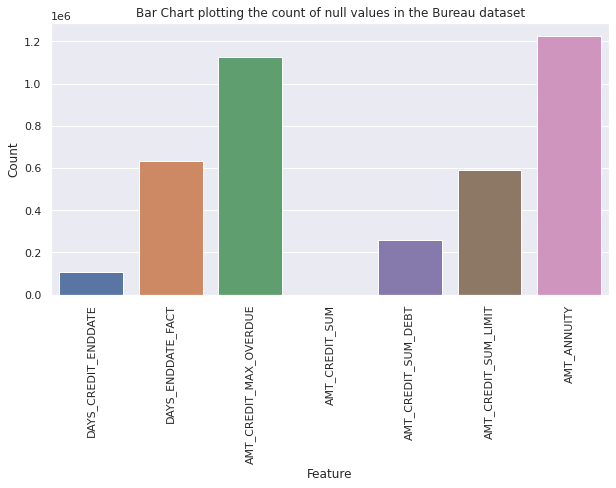

In [58]:
plt.figure(figsize=(10,5))
sns.barplot(x ='Feature' , y ='Count' , data = features_with_null[features_with_null['Count'] >0])
plt.title("Bar Chart plotting the count of null values in the Bureau dataset")
plt.xticks(rotation = 90)
plt.show()

In [59]:
features = datasets['bureau'].select_dtypes(include = ['object']).columns
features

Index(['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE'], dtype='object', name='Feature')

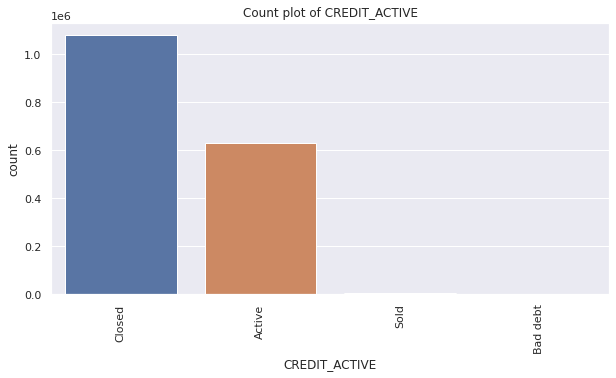

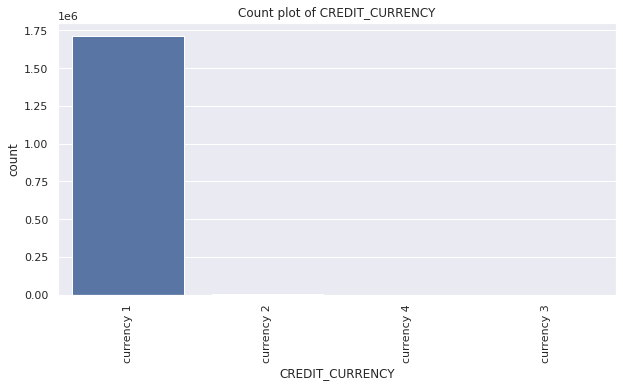

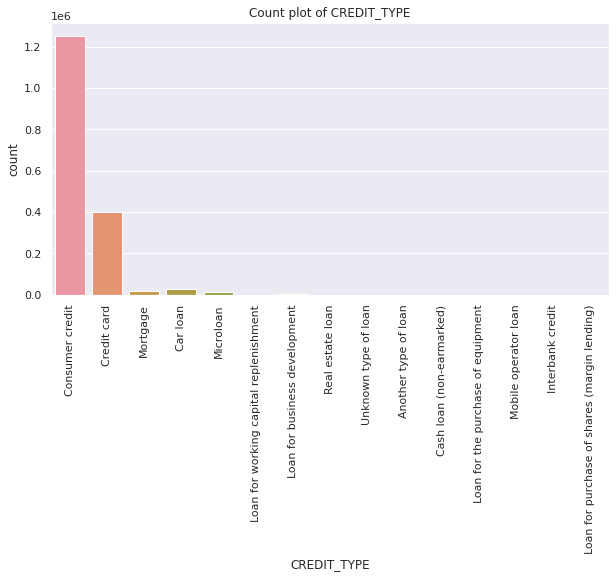

In [60]:
for i in features:
    plt.figure(figsize=(10,5))
    sns.countplot(data = datasets['bureau'] ,x =i)
    plt.title(f'Count plot of {i}')
    plt.xticks(rotation = 90)
    plt.show()

- We can conclude most of the credits are closed
- We can conclude the most used credit type is consumer credit followed by credit card
- Only Currency 1 is used as the credit currency

In [61]:
datasets['bureau_balance'].head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448             0.0      C
1       5715448            -1.0      C
2       5715448            -2.0      C
3       5715448            -3.0      C
4       5715448            -4.0      C

In [62]:
datasets['bureau_balance'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14180260 entries, 0 to 14180259
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   SK_ID_BUREAU    int64  
 1   MONTHS_BALANCE  float64
 2   STATUS          object 
dtypes: float64(1), int64(1), object(1)
memory usage: 324.6+ MB


In [63]:
datasets['bureau_balance'].describe()

SK_ID_BUREAU  MONTHS_BALANCE
count  1.418026e+07    1.418026e+07
mean   6.001150e+06   -3.036035e+01
std    4.933605e+05    2.370782e+01
min    5.001710e+06   -9.600000e+01
25%    5.727644e+06   -4.500000e+01
50%    6.032753e+06   -2.500000e+01
75%    6.398980e+06   -1.100000e+01
max    6.837604e+06    0.000000e+00

In [64]:
datasets['bureau_balance'].describe(include='all')

SK_ID_BUREAU  MONTHS_BALANCE    STATUS
count   1.418026e+07    1.418026e+07  14180259
unique           NaN             NaN         8
top              NaN             NaN         C
freq             NaN             NaN   7019423
mean    6.001150e+06   -3.036035e+01       NaN
std     4.933605e+05    2.370782e+01       NaN
min     5.001710e+06   -9.600000e+01       NaN
25%     5.727644e+06   -4.500000e+01       NaN
50%     6.032753e+06   -2.500000e+01       NaN
75%     6.398980e+06   -1.100000e+01       NaN
max     6.837604e+06    0.000000e+00       NaN

In [65]:
datasets['bureau_balance'].isnull().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    1
STATUS            1
dtype: int64

## EDA of Previous Applications

In [66]:
datasets['previous_application'].head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [67]:
datasets['previous_application'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [68]:
datasets['previous_application'].describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115834    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

In [69]:
datasets['previous_application'].describe(include='all')

SK_ID_PREV    SK_ID_CURR NAME_CONTRACT_TYPE   AMT_ANNUITY  \
count   1.670214e+06  1.670214e+06            1670214  1.297979e+06   
unique           NaN           NaN                  4           NaN   
top              NaN           NaN         Cash loans           NaN   
freq             NaN           NaN             747553           NaN   
mean    1.923089e+06  2.783572e+05                NaN  1.595512e+04   
std     5.325980e+05  1.028148e+05                NaN  1.478214e+04   
min     1.000001e+06  1.000010e+05                NaN  0.000000e+00   
25%     1.461857e+06  1.893290e+05                NaN  6.321780e+03   
50%     1.923110e+06  2.787145e+05                NaN  1.125000e+04   
75%     2.384280e+06  3.675140e+05                NaN  2.065842e+04   
max     2.845382e+06  4.562550e+05                NaN  4.180581e+05   

        AMT_APPLICATION    AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count      1.670214e+06  1.670213e+06      7.743700e+05     1.284699e+06   
unique              NaN           NaN               NaN              NaN   
top                 NaN           NaN               NaN              NaN   
freq                NaN           NaN               NaN              NaN   
mean       1.752339e+05  1.961140e+05      6.697402e+03     2.278473e+05   
std        2.927798e+05  3.185746e+05      2.092150e+04     3.153966e+05   
min        0.000000e+00  0.000000e+00     -9.000000e-01     0.000000e+00   
25%        1.872000e+04  2.416050e+04      0.000000e+00     5.084100e+04   
50%        7.104600e+04  8.054100e+04      1.638000e+03     1.123200e+05   
75%        1.803600e+05  2.164185e+05      7.740000e+03     2.340000e+05   
max        6.905160e+06  6.905160e+06      3.060045e+06     6.905160e+06   

       WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  ...  \
count                     1670214             1.670214e+06  ...   
unique                          7                      NaN  ...   
top                       TUESDAY                      NaN  ...   
freq                       255118                      NaN  ...   
mean                          NaN             1.248418e+01  ...   
std                           NaN             3.334028e+00  ...   
min                           NaN             0.000000e+00  ...   
25%                           NaN             1.000000e+01  ...   
50%                           NaN             1.200000e+01  ...   
75%                           NaN             1.500000e+01  ...   
max                           NaN             2.300000e+01  ...   

       NAME_SELLER_INDUSTRY   CNT_PAYMENT  NAME_YIELD_GROUP  \
count               1670214  1.297984e+06           1670214   
unique                   11           NaN                 5   
top                     XNA           NaN               XNA   
freq                 855720           NaN            517215   
mean                    NaN  1.605408e+01               NaN   
std                     NaN  1.456729e+01               NaN   
min                     NaN  0.000000e+00               NaN   
25%                     NaN  6.000000e+00               NaN   
50%                     NaN  1.200000e+01               NaN   
75%                     NaN  2.400000e+01               NaN   
max                     NaN  8.400000e+01               NaN   

        PRODUCT_COMBINATION  DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
count               1669868       997149.000000  997149.000000   
unique                   17                 NaN            NaN   
top                    Cash                 NaN            NaN   
freq                 285990                 NaN            NaN   
mean                    NaN       342209.855039   13826.269337   
std                     NaN        88916.115834   72444.869708   
min                     NaN        -2922.000000   -2892.000000   
25%                     NaN       365243.000000   -1628.000000   
50%                     NaN       365243.000000    -831.000000   
75%                   

In [70]:
datasets['previous_application'].isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [71]:
missing_val = datasets['previous_application'].isnull().sum()
print("Features with missing values:",missing_val[missing_val>0].count())

Features with missing values: 16


In [72]:
features_with_null = pd.DataFrame(missing_val)
features_with_null.columns = ['Count']
features_with_null.index.names = ['Feature']
features_with_null['Feature'] = features_with_null.index
features_with_null[features_with_null["Count"]>0].head()

Count            Feature
Feature                                     
AMT_ANNUITY        372235        AMT_ANNUITY
AMT_CREDIT              1         AMT_CREDIT
AMT_DOWN_PAYMENT   895844   AMT_DOWN_PAYMENT
AMT_GOODS_PRICE    385515    AMT_GOODS_PRICE
RATE_DOWN_PAYMENT  895844  RATE_DOWN_PAYMENT

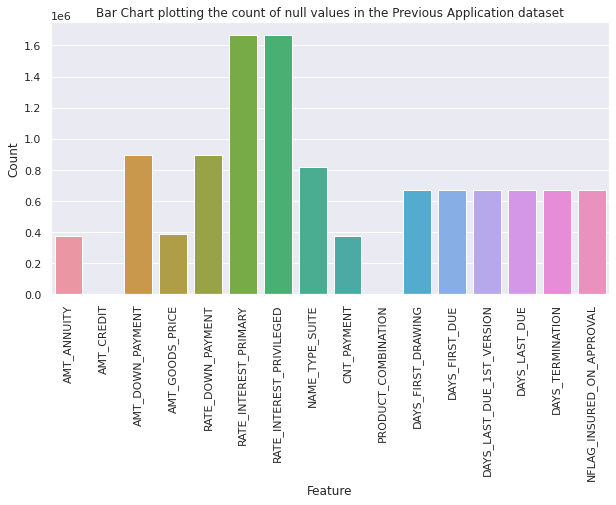

In [73]:
plt.figure(figsize=(10,5))
sns.barplot(x ='Feature' , y ='Count' , data = features_with_null[features_with_null['Count'] >0])
plt.title("Bar Chart plotting the count of null values in the Previous Application dataset")
plt.xticks(rotation = 90)
plt.show()

In [74]:
features = datasets['previous_application'].select_dtypes(include = ['object']).columns
features

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object', name='Feature')

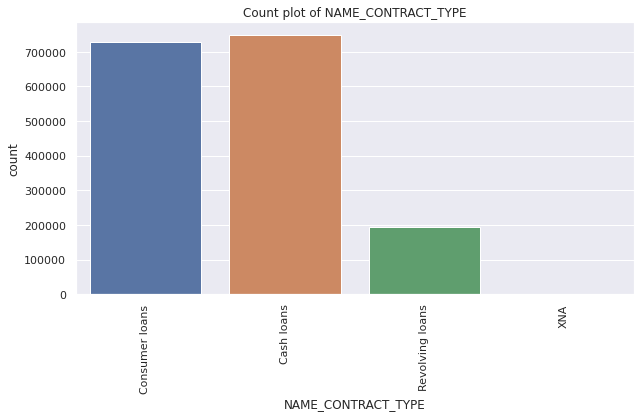

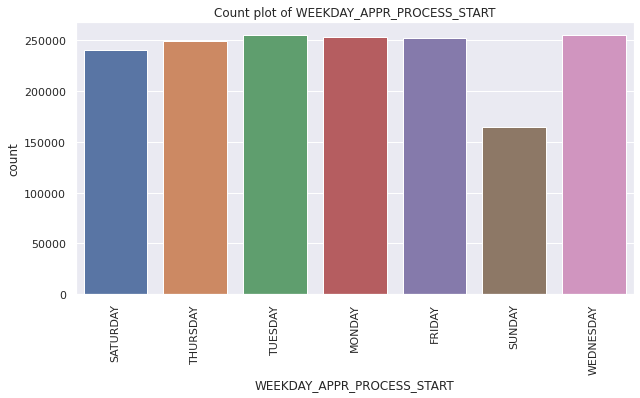

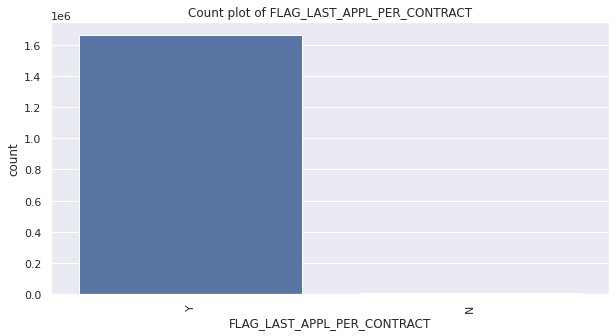

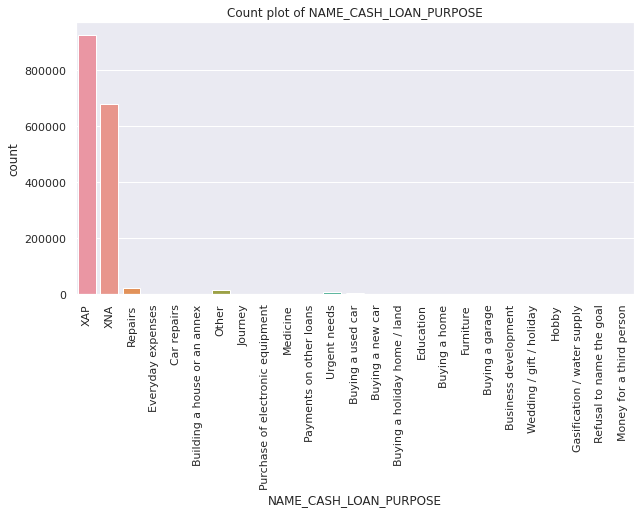

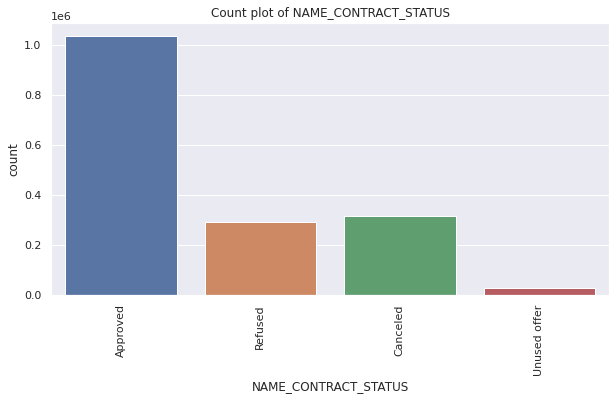

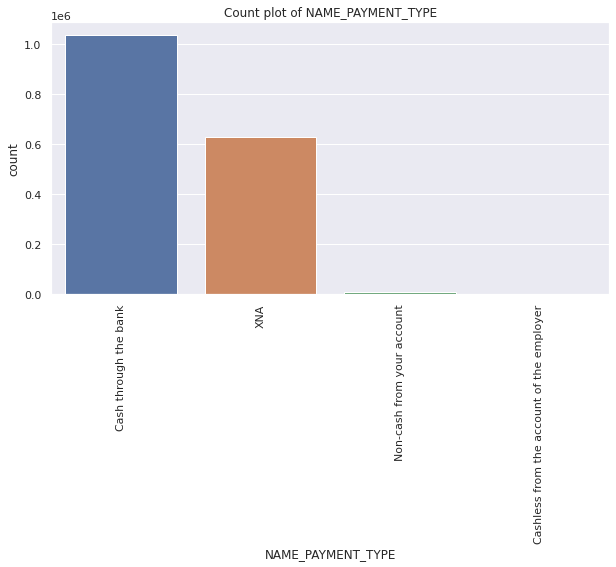

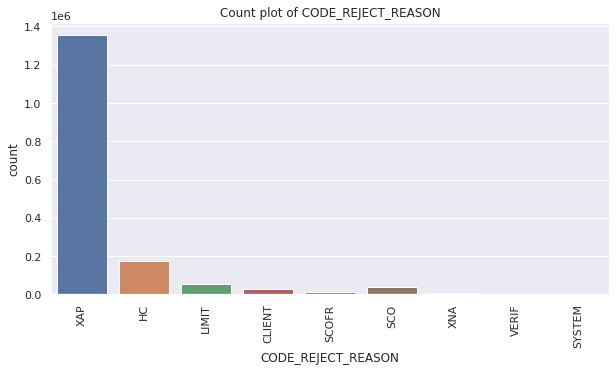

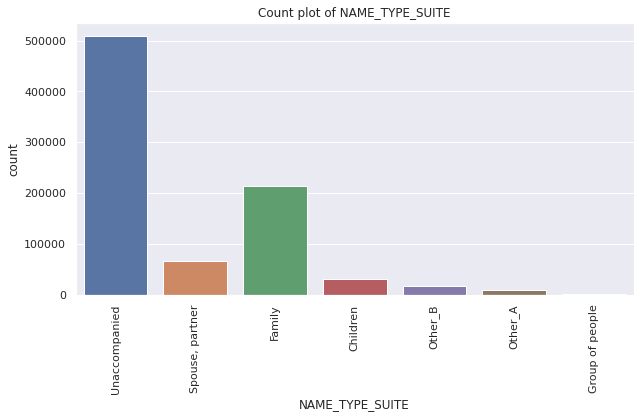

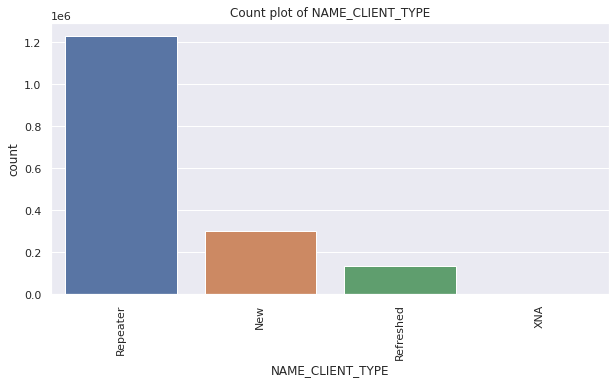

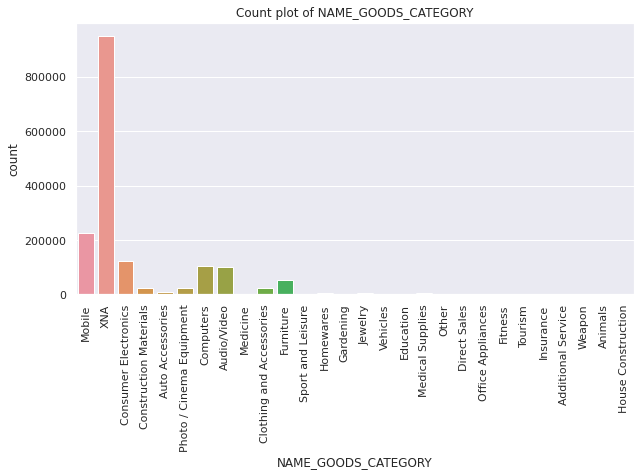

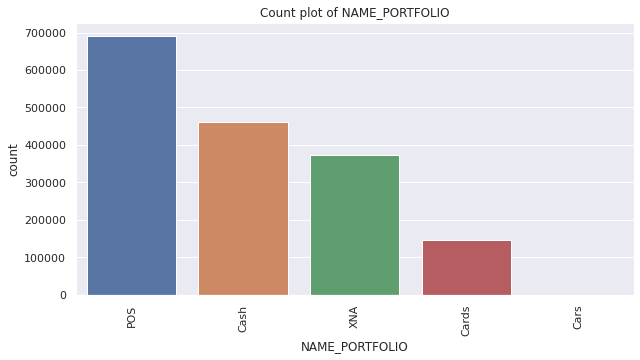

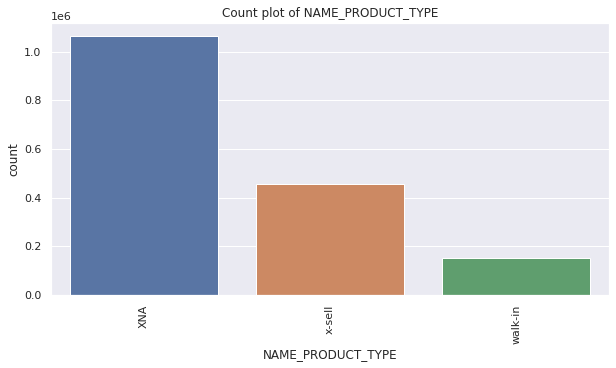

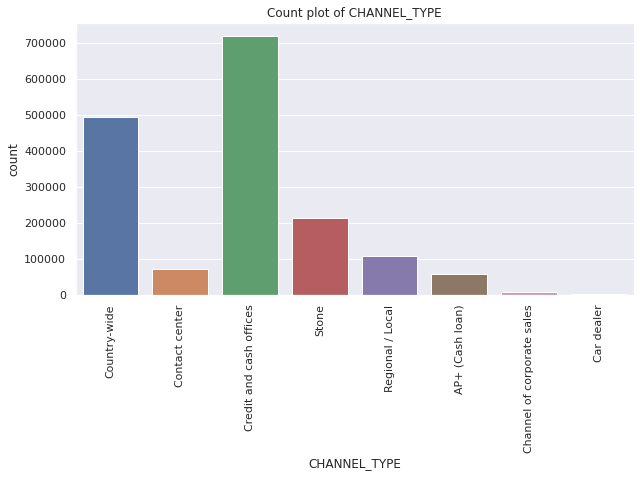

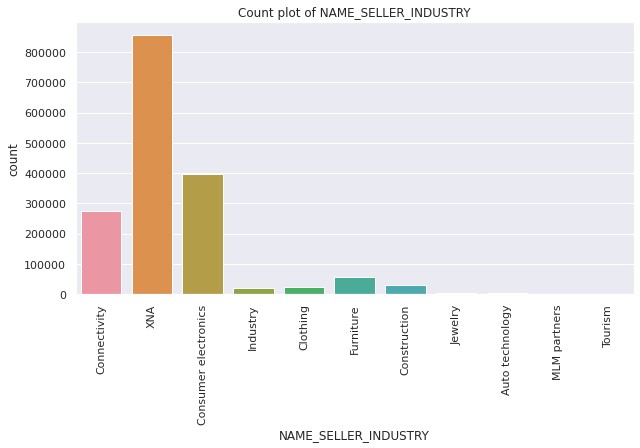

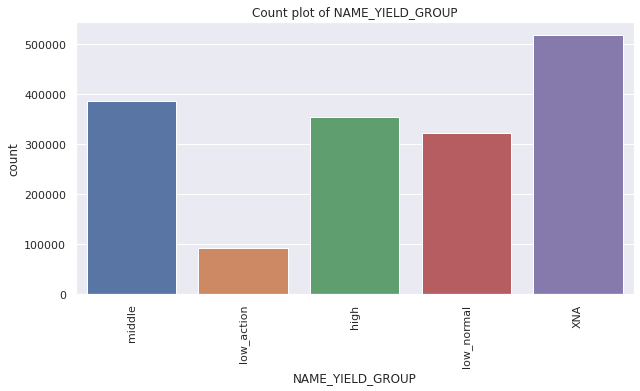

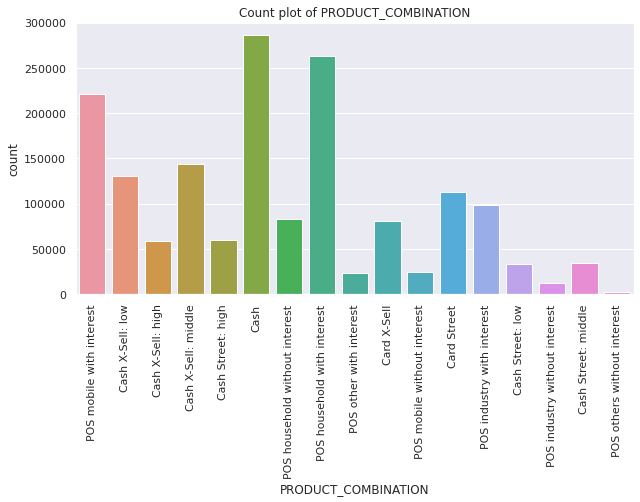

In [75]:
for i in features:
    plt.figure(figsize=(10,5))
    sns.countplot(data = datasets['previous_application'] ,x =i)
    plt.title(f'Count plot of {i}')
    plt.xticks(rotation = 90)
    plt.show()

## EDA of Credit Card Balance

In [76]:
datasets['credit_card_balance'].head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                   1.0                         0.0   
1                       1.0                   1.0                         0.0   
2                       0.0                   0.0                         0.0   
3                       1.0                   1.0                         0.0   
4                       0.0                   1.0                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0     0.0         0.0  
1     0.0         0.0  
2     0.0         0.0  
3     0.0         0.0  
4     0.0         0.0  

[5 rows x 23 columns]

In [77]:
datasets['credit_card_balance'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1979436 entries, 0 to 1979435
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        float64
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [78]:
datasets['credit_card_balance'].describe()

SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE   AMT_BALANCE  \
count  1.979436e+06  1.979436e+06    1.979436e+06  1.979436e+06   
mean   1.904461e+06  2.783274e+05   -3.369070e+01  5.699028e+04   
std    5.365786e+05  1.027110e+05    2.741537e+01  1.039779e+05   
min    1.000018e+06  1.000060e+05   -9.600000e+01 -2.614710e+05   
25%    1.431899e+06  1.895370e+05   -5.500000e+01  0.000000e+00   
50%    1.897378e+06  2.784760e+05   -2.600000e+01  0.000000e+00   
75%    2.369424e+06  3.675970e+05   -9.000000e+00  8.768598e+04   
max    2.843496e+06  4.562500e+05   -1.000000e+00  1.505902e+06   

       AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
count             1.979436e+06              1.577260e+06   
mean              1.521421e+05              5.766248e+03   
std               1.641011e+05              2.740302e+04   
min               0.000000e+00              0.000000e+00   
25%               4.500000e+04              0.000000e+00   
50%               1.125000e+05              0.000000e+00   
75%               1.800000e+05              0.000000e+00   
max               1.350000e+06              1.676250e+06   

       AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
count          1.979436e+06                1.577260e+06   
mean           7.068210e+03                2.798075e+02   
std            3.262194e+04                7.846948e+03   
min           -1.687500e+03                0.000000e+00   
25%            0.000000e+00                0.000000e+00   
50%            0.000000e+00                0.000000e+00   
75%            0.000000e+00                0.000000e+00   
max            2.287098e+06                1.302750e+06   

       AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  ...  \
count              1.577260e+06             1.833205e+06  ...   
mean               2.807286e+03             3.471656e+03  ...   
std                2.011426e+04             5.504377e+03  ...   
min                0.000000e+00             0.000000e+00  ...   
25%                0.000000e+00             0.000000e+00  ...   
50%                0.000000e+00             0.000000e+00  ...   
75%                0.000000e+00             6.300000e+03  ...   
max                1.933462e+06             1.941983e+05  ...   

       AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
count              1.979436e+06   1.979435e+06          1.979435e+06   
mean               5.470154e+04   5.679479e+04          5.680512e+04   
std                1.002789e+05   1.036487e+05          1.036560e+05   
min               -2.676150e+05  -2.617770e+05         -2.617770e+05   
25%                0.000000e+00   0.000000e+00          0.000000e+00   
50%                0.000000e+00   0.000000e+00          0.000000e+00   
75%                8.408316e+04   8.756656e+04          8.758462e+04   
max                1.472317e+06   1.493338e+06          1.493338e+06   

       CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
count              1.577259e+06          1.979435e+06   
mean               3.028279e-01          6.690995e-01   
std                1.077727e+00          3.086792e+00   
min                0.000000e+00          0.000000e+00   
25%                0.000000e+00          0.000000e+00   
50%                0.000000e+00          0.000000e+00   
75%                0.000000e+00          0.000000e+00   
max                4.400000e+01          1.650000e+02   

       CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  \
count                1.577259e+06              1.577259e+06   
mean                 4.884423e-03              5.319970e-01   
std                  8.241988e-02              3.152558e+00   
min                  0.000000e+00              0.000000e+00   
25%                  0.000000e+00              0.000000e+00   
50%                  0.000000e+00              0.000000e+00   
75%                  0.000000e+00              0.000000e+00   
max                  1.000000e+01              1.650000e+02   

       CNT_INST

In [79]:
datasets['credit_card_balance'].describe(include='all')

SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE   AMT_BALANCE  \
count   1.979436e+06  1.979436e+06    1.979436e+06  1.979436e+06   
unique           NaN           NaN             NaN           NaN   
top              NaN           NaN             NaN           NaN   
freq             NaN           NaN             NaN           NaN   
mean    1.904461e+06  2.783274e+05   -3.369070e+01  5.699028e+04   
std     5.365786e+05  1.027110e+05    2.741537e+01  1.039779e+05   
min     1.000018e+06  1.000060e+05   -9.600000e+01 -2.614710e+05   
25%     1.431899e+06  1.895370e+05   -5.500000e+01  0.000000e+00   
50%     1.897378e+06  2.784760e+05   -2.600000e+01  0.000000e+00   
75%     2.369424e+06  3.675970e+05   -9.000000e+00  8.768598e+04   
max     2.843496e+06  4.562500e+05   -1.000000e+00  1.505902e+06   

        AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
count              1.979436e+06              1.577260e+06   
unique                      NaN                       NaN   
top                         NaN                       NaN   
freq                        NaN                       NaN   
mean               1.521421e+05              5.766248e+03   
std                1.641011e+05              2.740302e+04   
min                0.000000e+00              0.000000e+00   
25%                4.500000e+04              0.000000e+00   
50%                1.125000e+05              0.000000e+00   
75%                1.800000e+05              0.000000e+00   
max                1.350000e+06              1.676250e+06   

        AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
count           1.979436e+06                1.577260e+06   
unique                   NaN                         NaN   
top                      NaN                         NaN   
freq                     NaN                         NaN   
mean            7.068210e+03                2.798075e+02   
std             3.262194e+04                7.846948e+03   
min            -1.687500e+03                0.000000e+00   
25%             0.000000e+00                0.000000e+00   
50%             0.000000e+00                0.000000e+00   
75%             0.000000e+00                0.000000e+00   
max             2.287098e+06                1.302750e+06   

        AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  \
count               1.577260e+06             1.833205e+06  ...   1.979435e+06   
unique                       NaN                      NaN  ...            NaN   
top                          NaN                      NaN  ...            NaN   
freq                         NaN                      NaN  ...            NaN   
mean                2.807286e+03             3.471656e+03  ...   5.679479e+04   
std                 2.011426e+04             5.504377e+03  ...   1.036487e+05   
min                 0.000000e+00             0.000000e+00  ...  -2.617770e+05   
25%                 0.000000e+00             0.000000e+00  ...   0.000000e+00   
50%                 0.000000e+00             0.000000e+00  ...   0.000000e+00   
75%                 0.000000e+00             6.300000e+03  ...   8.756656e+04   
max                 1.933462e+06             1.941983e+05  ...   1.493338e+06   

        AMT_TOTAL_RECEIVABLE  CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
count           1.979435e+06              1.577259e+06          1.979435e+06   
unique                   NaN                       NaN                   NaN   
top                      NaN                       NaN                   NaN   
freq                     NaN                       NaN                   NaN   
mean            5.680512e+04              3.028279e-01          6.690995e-01   
std             1.036560e+05              1.077727e+00          3.086792e+00   
min            -2.617770e+05              0.000000e+00          0.000000e+00   
25%             0.000000e+00              0.000000e+00          0.000000e+00   
50%             0.000000e+00              0.00

In [80]:
datasets['credit_card_balance'].isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      402176
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    402176
AMT_DRAWINGS_POS_CURRENT      402176
AMT_INST_MIN_REGULARITY       146231
AMT_PAYMENT_CURRENT           408728
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      1
AMT_TOTAL_RECEIVABLE               1
CNT_DRAWINGS_ATM_CURRENT      402177
CNT_DRAWINGS_CURRENT               1
CNT_DRAWINGS_OTHER_CURRENT    402177
CNT_DRAWINGS_POS_CURRENT      402177
CNT_INSTALMENT_MATURE_CUM     146232
NAME_CONTRACT_STATUS               1
SK_DPD                             1
SK_DPD_DEF                         1
dtype: int64

In [81]:
missing_val = datasets['credit_card_balance'].isnull().sum()
print("Features with missing values:",missing_val[missing_val>0].count())

Features with missing values: 15


In [82]:
features_with_null = pd.DataFrame(missing_val)
features_with_null.columns = ['Count']
features_with_null.index.names = ['Feature']
features_with_null['Feature'] = features_with_null.index
features_with_null[features_with_null["Count"]>0].head()

Count                     Feature
Feature                                                       
AMT_DRAWINGS_ATM_CURRENT    402176    AMT_DRAWINGS_ATM_CURRENT
AMT_DRAWINGS_OTHER_CURRENT  402176  AMT_DRAWINGS_OTHER_CURRENT
AMT_DRAWINGS_POS_CURRENT    402176    AMT_DRAWINGS_POS_CURRENT
AMT_INST_MIN_REGULARITY     146231     AMT_INST_MIN_REGULARITY
AMT_PAYMENT_CURRENT         408728         AMT_PAYMENT_CURRENT

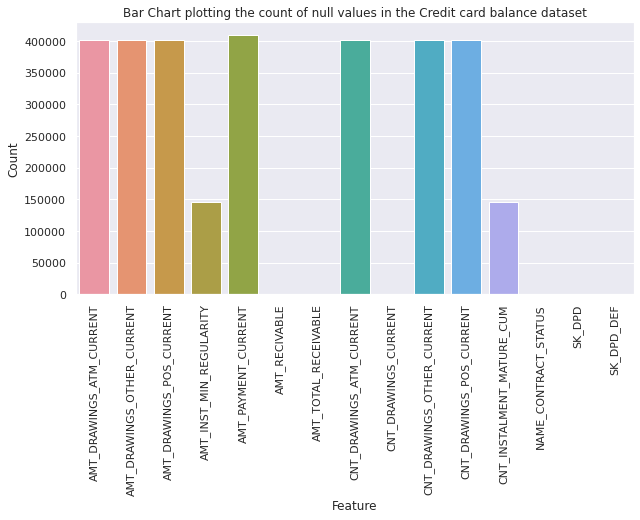

In [83]:
plt.figure(figsize=(10,5))
sns.barplot(x ='Feature' , y ='Count' , data = features_with_null[features_with_null['Count'] >0])
plt.title("Bar Chart plotting the count of null values in the Credit card balance dataset")
plt.xticks(rotation = 90)
plt.show()

## EDA of Installments payments

In [84]:
datasets['installments_payments'].head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

In [85]:
datasets['installments_payments'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [86]:
datasets['installments_payments'].describe(include='all')

SK_ID_PREV    SK_ID_CURR  NUM_INSTALMENT_VERSION  \
count  1.360540e+07  1.360540e+07            1.360540e+07   
mean   1.903365e+06  2.784449e+05            8.566373e-01   
std    5.362029e+05  1.027183e+05            1.035216e+00   
min    1.000001e+06  1.000010e+05            0.000000e+00   
25%    1.434191e+06  1.896390e+05            0.000000e+00   
50%    1.896520e+06  2.786850e+05            1.000000e+00   
75%    2.369094e+06  3.675300e+05            1.000000e+00   
max    2.843499e+06  4.562550e+05            1.780000e+02   

       NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
count           1.360540e+07     1.360540e+07        1.360250e+07   
mean            1.887090e+01    -1.042270e+03       -1.051114e+03   
std             2.666407e+01     8.009463e+02        8.005859e+02   
min             1.000000e+00    -2.922000e+03       -4.921000e+03   
25%             4.000000e+00    -1.654000e+03       -1.662000e+03   
50%             8.000000e+00    -8.180000e+02       -8.270000e+02   
75%             1.900000e+01    -3.610000e+02       -3.700000e+02   
max             2.770000e+02    -1.000000e+00       -1.000000e+00   

       AMT_INSTALMENT   AMT_PAYMENT  
count    1.360540e+07  1.360250e+07  
mean     1.705091e+04  1.723822e+04  
std      5.057025e+04  5.473578e+04  
min      0.000000e+00  0.000000e+00  
25%      4.226085e+03  3.398265e+03  
50%      8.884080e+03  8.125515e+03  
75%      1.671021e+04  1.610842e+04  
max      3.771488e+06  3.771488e+06

In [87]:
missing_val = datasets['installments_payments'].isnull().sum()
print("Features with missing values:",missing_val[missing_val>0].count())

Features with missing values: 2


In [88]:
features_with_null = pd.DataFrame(missing_val)
features_with_null.columns = ['Count']
features_with_null.index.names = ['Feature']
features_with_null['Feature'] = features_with_null.index
features_with_null[features_with_null["Count"]>0].head()

Count             Feature
Feature                                      
DAYS_ENTRY_PAYMENT   2905  DAYS_ENTRY_PAYMENT
AMT_PAYMENT          2905         AMT_PAYMENT

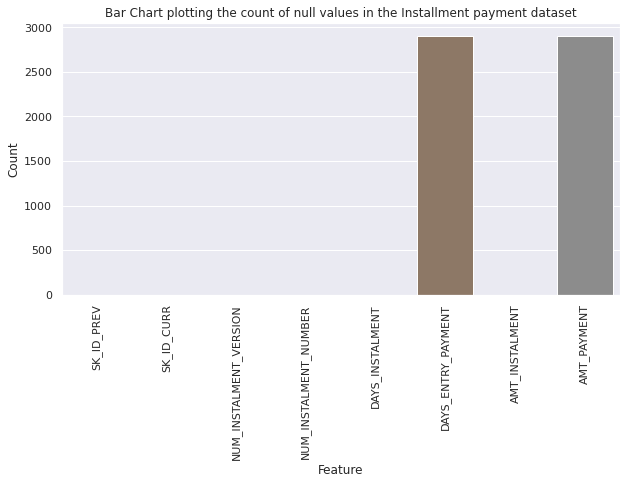

In [89]:
plt.figure(figsize=(10,5))
sns.barplot(x ='Feature' , y ='Count' , data = features_with_null)
plt.title("Bar Chart plotting the count of null values in the Installment payment dataset")
plt.xticks(rotation = 90)
plt.show()

## EDA of POS_CASH_BALANCE

In [90]:
datasets['POS_CASH_balance'].head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [91]:
datasets['POS_CASH_balance'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [92]:
datasets['POS_CASH_balance'].describe(include='all')

SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
count   1.000136e+07  1.000136e+07    1.000136e+07    9.975287e+06   
unique           NaN           NaN             NaN             NaN   
top              NaN           NaN             NaN             NaN   
freq             NaN           NaN             NaN             NaN   
mean    1.903217e+06  2.784039e+05   -3.501259e+01    1.708965e+01   
std     5.358465e+05  1.027637e+05    2.606657e+01    1.199506e+01   
min     1.000001e+06  1.000010e+05   -9.600000e+01    1.000000e+00   
25%     1.434405e+06  1.895500e+05   -5.400000e+01    1.000000e+01   
50%     1.896565e+06  2.786540e+05   -2.800000e+01    1.200000e+01   
75%     2.368963e+06  3.674290e+05   -1.300000e+01    2.400000e+01   
max     2.843499e+06  4.562550e+05   -1.000000e+00    9.200000e+01   

        CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS        SK_DPD    SK_DPD_DEF  
count            9.975271e+06             10001358  1.000136e+07  1.000136e+07  
unique                    NaN                    9           NaN           NaN  
top                       NaN               Active           NaN           NaN  
freq                      NaN              9151119           NaN           NaN  
mean             1.048384e+01                  NaN  1.160693e+01  6.544684e-01  
std              1.110906e+01                  NaN  1.327140e+02  3.276249e+01  
min              0.000000e+00                  NaN  0.000000e+00  0.000000e+00  
25%              3.000000e+00                  NaN  0.000000e+00  0.000000e+00  
50%              7.000000e+00                  NaN  0.000000e+00  0.000000e+00  
75%              1.400000e+01                  NaN  0.000000e+00  0.000000e+00  
max              8.500000e+01                  NaN  4.231000e+03  3.595000e+03

In [93]:
missing_val = datasets['POS_CASH_balance'].isnull().sum()
print("Features with missing values:",missing_val[missing_val>0].count())

Features with missing values: 2


In [94]:
features_with_null = pd.DataFrame(missing_val)
features_with_null.columns = ['Count']
features_with_null.index.names = ['Feature']
features_with_null['Feature'] = features_with_null.index
features_with_null[features_with_null["Count"]>0].head()

Count                Feature
Feature                                            
CNT_INSTALMENT         26071         CNT_INSTALMENT
CNT_INSTALMENT_FUTURE  26087  CNT_INSTALMENT_FUTURE

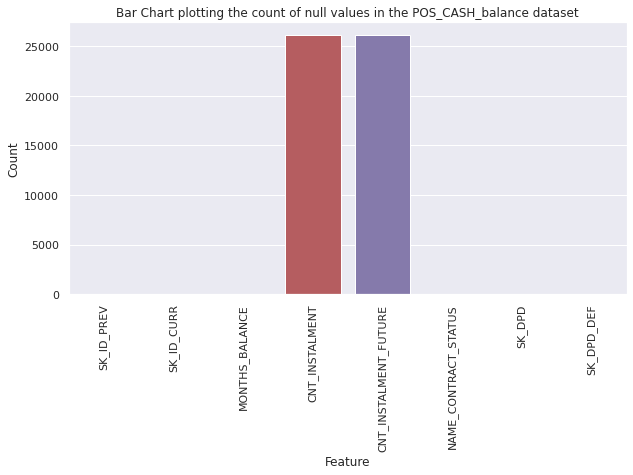

In [95]:
plt.figure(figsize=(10,5))
sns.barplot(x ='Feature' , y ='Count' , data = features_with_null)
plt.title("Bar Chart plotting the count of null values in the POS_CASH_balance dataset")
plt.xticks(rotation = 90)
plt.show()

# Dataset questions
## Unique record for each SK_ID_CURR

In [96]:
datasets.keys()

dict_keys(['application_train', 'application_test', 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 'previous_application', 'POS_CASH_balance'])

In [97]:
len(datasets["application_train"]["SK_ID_CURR"].unique()) == datasets["application_train"].shape[0]

True

In [98]:
np.intersect1d(datasets["application_train"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"])

array([], dtype=int64)

In [99]:
datasets["application_test"].shape

(48744, 121)

In [100]:
datasets["application_train"].shape

(307511, 122)

## previous applications for the submission file
The persons in the kaggle submission file have had previous applications in the `previous_application.csv`. 47,800 out 48,744 people have had previous appications.

In [101]:
appsDF = datasets["previous_application"]

In [102]:
len(np.intersect1d(datasets["previous_application"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"]))

47800

In [103]:
print(f"There are  {appsDF.shape[0]:,} previous applications")

There are  1,670,214 previous applications


In [104]:
# How many entries are there for each month?
prevAppCounts = appsDF['SK_ID_CURR'].value_counts(dropna=False)


In [105]:
len(prevAppCounts[prevAppCounts >40])  #more that 40 previous applications

101

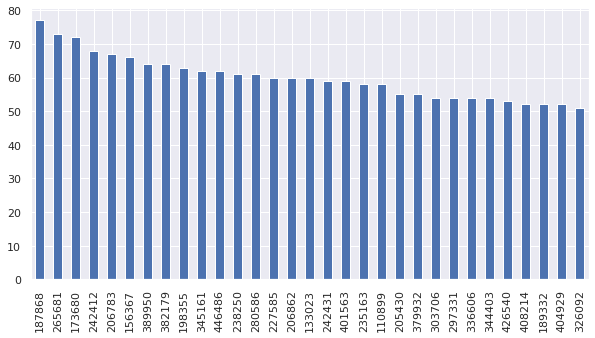

In [106]:
plt.figure(figsize=(10,5))
prevAppCounts[prevAppCounts >50].plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

### Histogram of Number of previous applications for an ID

In [107]:
sum(appsDF['SK_ID_CURR'].value_counts()==1)

60458

Text(0.5, 1.0, 'Histogram of Number of previous applications for an ID')

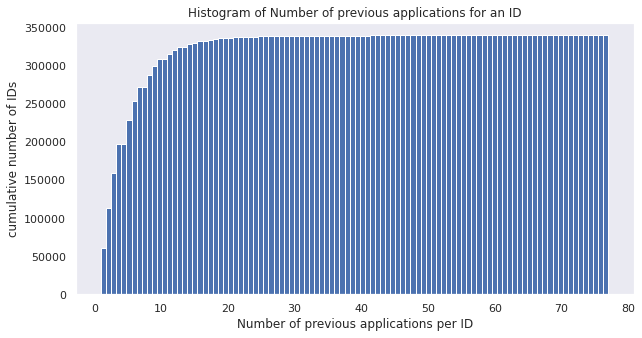

In [108]:
plt.figure(figsize=(10,5))
plt.hist(appsDF['SK_ID_CURR'].value_counts(), cumulative =True, bins = 100);
plt.grid()
plt.ylabel('cumulative number of IDs')
plt.xlabel('Number of previous applications per ID')
plt.title('Histogram of Number of previous applications for an ID')


##### **Can we differentiate applications by low, medium and high previous apps?**
    * Low = <5 claims (22%)
    * Medium = 10 to 39 claims (58%)
    * High = 40 or more claims (20%)

In [109]:
apps_all = appsDF['SK_ID_CURR'].nunique()
apps_5plus = appsDF['SK_ID_CURR'].value_counts()>=5
apps_40plus = appsDF['SK_ID_CURR'].value_counts()>=40
print('Percentage with 10 or more previous apps:', np.round(100.*(sum(apps_5plus)/apps_all),5))
print('Percentage with 40 or more previous apps:', np.round(100.*(sum(apps_40plus)/apps_all),5))

Percentage with 10 or more previous apps: 41.76895
Percentage with 40 or more previous apps: 0.03453


In [110]:
list(datasets["application_train"].columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

# Model Pipeline 

## Model Pipeline for logistic regression

In [111]:
application_Train = datasets['application_train']

In [112]:
corr = datasets['application_train'].corr().abs()
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.99) | any(upper_tri[column] < 0.001)]
print(len(to_drop))

application_Train_X = datasets['application_train'].drop(to_drop, axis=1)
print(application_Train_X.columns)


89
Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'OWN_CAR_AGE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'YEARS_BUILD_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'YEARS_BUILD_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'LIVINGAPARTMENTS_MODE',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
       'EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_8'],
      dtype='object', name='Feature')


In [113]:
y = application_Train['TARGET']
print(y.shape)
X = application_Train_X
print(X.shape)

(307511,)
(307511, 33)


In [114]:
X["TARGET"]

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

In [115]:
X= X.drop(["TARGET"],axis=1)
print(X.shape)

(307511, 32)


In [116]:
X.shape

(307511, 32)

In [117]:
numerical_features = X.select_dtypes(include = ['int64','float64']).columns
len(numerical_features)

16

In [118]:
cat_features = X.select_dtypes(include = ['object']).columns
len(cat_features)

16

In [119]:
cat_features.tolist()

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [120]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split  # sklearn.cross_validation in old versions
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score



# Split the data into training and validationa and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")

# Identify the numeric features we wish to consider. 
numerical_features = X.select_dtypes(include = ['int64','float64']).columns
numerical_features = numerical_features.tolist()

num_pipeline =Pipeline([('std',StandardScaler()),
        ('imputer', SimpleImputer(strategy='mean'))
                       ])

categorical_features = X.select_dtypes(include = ['object']).columns
categorical_features = categorical_features.tolist()


cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

features = numerical_features + categorical_features

data_pipeline = ColumnTransformer([
       ("num_pipeline", num_pipeline, numerical_features),
       ("cat_pipeline", cat_pipeline, categorical_features)],
        remainder='drop',
        n_jobs=-1
    )


data_pipeline.fit(X_train[features])
data_pipeline.fit(X_valid[features])

#transforming the X train, valid, and test sets.
X_train_transformed = data_pipeline.transform(X_train[features])
X_valid_transformed = data_pipeline.transform(X_valid[features])
X_test_transformed = data_pipeline.transform(X_test[features])

column_names = numerical_features  + list(data_pipeline.transformers_[1][1].named_steps["ohe"].get_feature_names(categorical_features))
# display(pd.DataFrame([X_train_transformed]).head())
number_of_inputs = X_train_transformed.shape[1]

X train           shape: (209107, 32)
X validation      shape: (52277, 32)
X test            shape: (46127, 32)


In [121]:


#create a LR pipeline here
lr_clf = Pipeline([("lr", LogisticRegression(solver='saga'))])

#this pipeline is used for the accuracy measure/ fitting and train
clf_pipeline = make_pipeline(
    data_pipeline,
    lr_clf
)

clf_pipeline.fit(X_train, y_train)



#Here, we determine the accuracy scores for the train, validation, and test pipelines.
trainAcc = clf_pipeline.score(X_train, y_train)

validAcc = clf_pipeline.score(X_valid, y_valid)

testAcc = clf_pipeline.score(X_test, y_test)

params = {'lr__C':[1.0, 10.0, 100.0], 
          'lr__penalty':['none', 'l1','l2']}

#using gridsearch here to determine the ROC-AUC scores for the train, validation, and test sets.
clf_gridsearch = GridSearchCV(lr_clf, param_grid = params, cv = 3, scoring='roc_auc', n_jobs = -1,verbose=1)

clf_gridsearch.fit(X_train_transformed, y_train)

results_df = pd.DataFrame(clf_gridsearch.cv_results_)
results_df = results_df.T
display(results_df)

logicModel = clf_gridsearch.best_estimator_


Fitting 3 folds for each of 9 candidates, totalling 27 fits


0  \
mean_fit_time                                    43.9765   
std_fit_time                                    0.365273   
mean_score_time                                 0.045403   
std_score_time                               0.000574268   
param_lr__C                                            1   
param_lr__penalty                                   none   
params             {'lr__C': 1.0, 'lr__penalty': 'none'}   
split0_test_score                               0.689092   
split1_test_score                               0.690495   
split2_test_score                               0.692023   
mean_test_score                                 0.690537   
std_test_score                                0.00119692   
rank_test_score                                        1   

                                                     1  \
mean_fit_time                                  59.3409   
std_fit_time                                  0.484703   
mean_score_time                              0.0429424   
std_score_time                              0.00377647   
param_lr__C                                          1   
param_lr__penalty                                   l1   
params             {'lr__C': 1.0, 'lr__penalty': 'l1'}   
split0_test_score                             0.689039   
split1_test_score                             0.690563   
split2_test_score                             0.691981   
mean_test_score                               0.690528   
std_test_score                              0.00120123   
rank_test_score                                      9   

                                                     2  \
mean_fit_time                                  43.8126   
std_fit_time                                  0.044026   
mean_score_time                              0.0565286   
std_score_time                              0.00770461   
param_lr__C                                          1   
param_lr__penalty                                   l2   
params             {'lr__C': 1.0, 'lr__penalty': 'l2'}   
split0_test_score                             0.689082   
split1_test_score                             0.690512   
split2_test_score                             0.692011   
mean_test_score                               0.690535   
std_test_score                              0.00119575   
rank_test_score                                      4   

                                                        3  \
mean_fit_time                                     43.6165   
std_fit_time                                     0.126383   
mean_score_time                                 0.0495013   
std_score_time                                 0.00640954   
param_lr__C                                            10   
param_lr__penalty                                    none   
params             {'lr__C': 10.0, 'lr__penalty': 'none'}   
split0_test_score                                0.689087   
split1_test_score                                0.690495   
split2_test_score                                0.692022   
mean_test_score                                  0.690535   
std_test_score                                 0.00119862   
rank_test_score                                         5   

                                                      4  \
mean_fit_time                                   59.6331   
std_fit_time                                   0.438368   
mean_score_time                               0.0409315   
std_score_time                               0.00508153   
param_lr__C                                          10   
param_lr__penalty                                    l1   
params             {'lr__C': 10.0, 'lr__penalty': 'l1'}   
split0_test_score                              0.689079   
split1_test_score                              0.690501   
split2_test_score                              0.692019   
mean_test_score                                0.690533   
std_test_score           

In [122]:

#forming the experiment log to track our results.
expLog = pd.DataFrame(columns = ['Model Type', "TrainAcc", "ValidAcc", "TestAcc", 'Hyperparameters'])

expLog = expLog.append({'Model Type' : 'Logistic Regression',
                          'TrainAcc': trainAcc,
                          'ValidAcc': validAcc,
                          'TestAcc': testAcc,
                          'TrainAuc': clf_gridsearch.best_score_,
                          'ValidAuc': roc_auc_score(y_valid, logicModel.predict_proba(X_valid_transformed)[:, 1]),
                          'TestAuc': clf_gridsearch.score(X_test_transformed, y_test),
                          'Hyperparameters' : clf_gridsearch.best_params_},
                        ignore_index=True)


In [123]:
expLog

Model Type  TrainAcc  ValidAcc   TestAcc  \
0  Logistic Regression   0.91996  0.916388  0.919418   

                         Hyperparameters   TestAuc  TrainAuc  ValidAuc  
0  {'lr__C': 1.0, 'lr__penalty': 'none'}  0.701097  0.690537  0.697389

## Model Pipeline for XGBoost

In [124]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [125]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV

params={
 "xgb__learning_rate"    : [0.05, 0.10] ,
 "xgb__max_depth"        : [ 3,5],
 "xgb__min_child_weight" : [ 1, 3, 5]
}
classifier=xgboost.XGBClassifier()
pipeline_xgb = Pipeline([
        ("preparation", data_pipeline),
        ("xgb", xgboost.XGBClassifier())
    ])
random_search=RandomizedSearchCV(pipeline_xgb,param_distributions=params,n_iter=5,scoring='accuracy',n_jobs=-1,cv=3,verbose=1)
random_search.fit(X_train,y_train)


xgboostmodel= random_search.best_estimator_

random_search.best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[01:30:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'xgb__min_child_weight': 1, 'xgb__max_depth': 3, 'xgb__learning_rate': 0.1}

In [126]:
expLog = expLog.append({'Model Type' : 'XGBoost',
                          'TrainAcc': trainAcc,
                          'ValidAcc': validAcc,
                          'TestAcc': testAcc,
                          'TrainAuc': random_search.best_score_,
                          'ValidAuc':"",
                          'TestAuc': "",
                          'Hyperparameters' : random_search.best_params_},
                        ignore_index=True)


In [127]:
expLog

Model Type  TrainAcc  ValidAcc   TestAcc  \
0  Logistic Regression   0.91996  0.916388  0.919418   
1              XGBoost   0.91996  0.916388  0.919418   

                                     Hyperparameters   TestAuc  TrainAuc  \
0              {'lr__C': 1.0, 'lr__penalty': 'none'}  0.701097  0.690537   
1  {'xgb__min_child_weight': 1, 'xgb__max_depth':...            0.919960   

   ValidAuc  
0  0.697389  
1

## Model Pipeline for Random Forest

In [128]:
from sklearn.ensemble import RandomForestClassifier

full_pipeline_with_predictor_rf = Pipeline([
        ("preparation", data_pipeline),
        ("rmf", RandomForestClassifier())
    ])
param_grid = {
    'rmf__bootstrap': [True],
    'rmf__max_depth': [10, 20],
    'rmf__max_features': [2, 3],
    'rmf__n_estimators': [100, 200]
}

grid_search_rf = GridSearchCV(estimator=full_pipeline_with_predictor_rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [129]:
grid_search_rf.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(n_jobs=-1,
                                                          transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('std',
                                                                                          StandardScaler()),
                                                                                         ('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['SK_ID_CURR',
                                                                          'CNT_CHILDREN',
                                                                          'AMT_INCOME_TOTAL',
                                                                          'DAYS

In [130]:
grid_search_rf.best_params_


{'rmf__bootstrap': True,
 'rmf__max_depth': 10,
 'rmf__max_features': 2,
 'rmf__n_estimators': 100}

In [131]:
rfmodel= grid_search_rf.best_estimator_

In [132]:
expLog = expLog.append({'Model Type' : 'Random Forest',
                          'TrainAcc': trainAcc,
                          'ValidAcc': validAcc,
                          'TestAcc': testAcc,
                          'TrainAuc': grid_search_rf.best_score_,
                          'ValidAuc': "",
                          'TestAuc': "",
                          'Hyperparameters' : grid_search_rf.best_params_},
                        ignore_index=True)


In [133]:
expLog

Model Type  TrainAcc  ValidAcc   TestAcc  \
0  Logistic Regression   0.91996  0.916388  0.919418   
1              XGBoost   0.91996  0.916388  0.919418   
2        Random Forest   0.91996  0.916388  0.919418   

                                     Hyperparameters   TestAuc  TrainAuc  \
0              {'lr__C': 1.0, 'lr__penalty': 'none'}  0.701097  0.690537   
1  {'xgb__min_child_weight': 1, 'xgb__max_depth':...            0.919960   
2  {'rmf__bootstrap': True, 'rmf__max_depth': 10,...            0.919960   

   ValidAuc  
0  0.697389  
1            
2

# Baseline Model

## Baseline Model for Logistic regression

To get a baseline, we will use some of the features after being preprocessed through the pipeline.
The baseline model is a logistic regression model

In [134]:
def pct(x):
    return round(100*x,3)

In [135]:
expLog2 = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC",
                                   "Train F1",
                                   "Valid F1",
                                   "Test F1"
                                  ])

In [136]:
%%time 
np.random.seed(42)
full_pipeline_with_predictor_clf = Pipeline([
        ("preparation", data_pipeline),
        ("linear", LogisticRegression(C=1,penalty='l2', solver='lbfgs'))
    ])
model = full_pipeline_with_predictor_clf.fit(X_train, y_train)


CPU times: user 59.6 s, sys: 30.1 s, total: 1min 29s
Wall time: 9.12 s


In [137]:
from sklearn.metrics import accuracy_score

np.round(accuracy_score(y_train, model.predict(X_train)), 3)

0.92

### Evaluation metrics
Submissions are evaluated on [area under the ROC curve](http://en.wikipedia.org/wiki/Receiver_operating_characteristic) between the predicted probability and the observed target.

The SkLearn `roc_auc_score` function computes the area under the receiver operating characteristic (ROC) curve, which is also denoted by AUC or AUROC. By computing the area under the roc curve, the curve information is summarized in one number. 

```python
from sklearn.metrics import roc_auc_score
>>> y_true = np.array([0, 0, 1, 1])
>>> y_scores = np.array([0.1, 0.4, 0.35, 0.8])
>>> roc_auc_score(y_true, y_scores)
0.75
```

In [138]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])


0.6949868557339169

In [139]:
from sklearn.metrics import f1_score
f1_score(y_train, model.predict(X_train), average='weighted')

0.8816546793108152

In [140]:
exp_name = f"Baseline_LogicisticReg_features"
expLog2.loc[len(expLog2)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)), 
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
                f1_score(y_train, model.predict(X_train), average='weighted'),
                f1_score(y_valid, model.predict(X_valid), average='weighted'),
                f1_score(y_test, model.predict(X_test), average='weighted')],             
    4)) 
expLog2

exp_name  Train Acc  Valid Acc  Test  Acc  \
0  Baseline_LogicisticReg_features       0.92     0.9164     0.9194   

   Train AUC  Valid AUC  Test  AUC  Train F1  Valid F1  Test F1  
0      0.695     0.6978     0.7016    0.8817    0.8765   0.8809

Score 0.7015777226768398


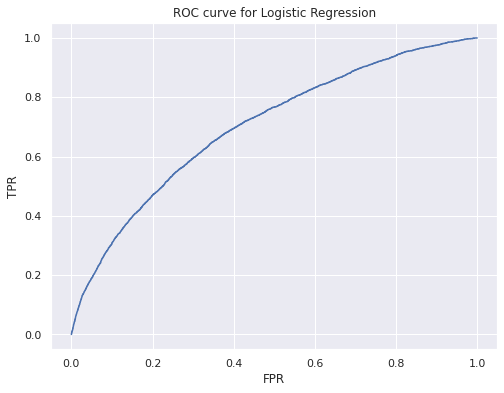

In [141]:
#Plotting the RUC curve
from sklearn import metrics
train_acc = model.score(X_train, y_train)
validAcc  = model.score(X_valid, y_valid)
testAcc  = model.score(X_test, y_test)
    
predictions = model.predict_proba(X_test)
print ("Score",roc_auc_score(y_test, predictions[:,1]))
    
    
fpr, tpr, _ = metrics.roc_curve(y_test, predictions[:,1])
plt.figure(figsize=(8,6))
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for Logistic Regression')
plt.show()

## Baseline Model for XGboost

To get a baseline, we will use some of the features after being preprocessed through the pipeline.
The baseline model is a logistic regression model

In [142]:
%%time 
np.random.seed(42)
full_pipeline_with_predictor_xgb = Pipeline([
        ("preparation", data_pipeline),
        ("xgboost", xgboost.XGBClassifier(min_child_weight = 3,max_depth=5,learning_rate=0.1))
    ])
model_xgb = full_pipeline_with_predictor_xgb.fit(X_train, y_train)


[01:32:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 3min 29s, sys: 737 ms, total: 3min 30s
Wall time: 16.9 s


### Evaluation metrics

In [143]:
np.round(accuracy_score(y_train, model.predict(X_train)), 3)

0.92

In [144]:
roc_auc_score(y_train, model_xgb.predict_proba(X_train)[:, 1])

0.7271296533214748

In [145]:
f1_score(y_train, model.predict(X_train), average='weighted')

0.8816546793108152

In [146]:
exp_name = f"Baseline_XGBoost_features"
expLog2.loc[len(expLog2)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_xgb.predict(X_train)), 
                accuracy_score(y_valid, model_xgb.predict(X_valid)),
                accuracy_score(y_test, model_xgb.predict(X_test)),
                roc_auc_score(y_train, model_xgb.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model_xgb.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_xgb.predict_proba(X_test)[:, 1]),
                f1_score(y_train, model.predict(X_train), average='weighted'),
                f1_score(y_valid, model.predict(X_valid), average='weighted'),
                f1_score(y_test, model.predict(X_test), average='weighted')],
    4)) 


In [147]:
expLog2

exp_name  Train Acc  Valid Acc  Test  Acc  \
0  Baseline_LogicisticReg_features     0.9200     0.9164     0.9194   
1        Baseline_XGBoost_features     0.9201     0.9164     0.9194   

   Train AUC  Valid AUC  Test  AUC  Train F1  Valid F1  Test F1  
0     0.6950     0.6978     0.7016    0.8817    0.8765   0.8809  
1     0.7271     0.7057     0.7078    0.8817    0.8765   0.8809

Score: 0.7077883171167454


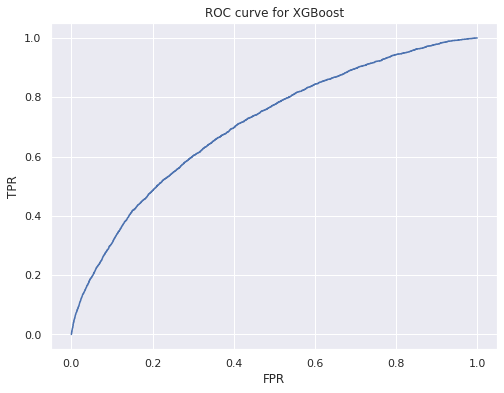

In [148]:
from sklearn import metrics
train_acc = model_xgb.score(X_train, y_train)
validAcc  = model_xgb.score(X_valid, y_valid)
testAcc  = model_xgb.score(X_test, y_test)
    
predictions = model_xgb.predict_proba(X_test)
print ("Score:",roc_auc_score(y_test, predictions[:,1]))
fpr, tpr, _ = metrics.roc_curve(y_test, predictions[:,1])
plt.figure(figsize=(8,6))
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for XGBoost')
plt.show()

<Figure size 1440x720 with 0 Axes>

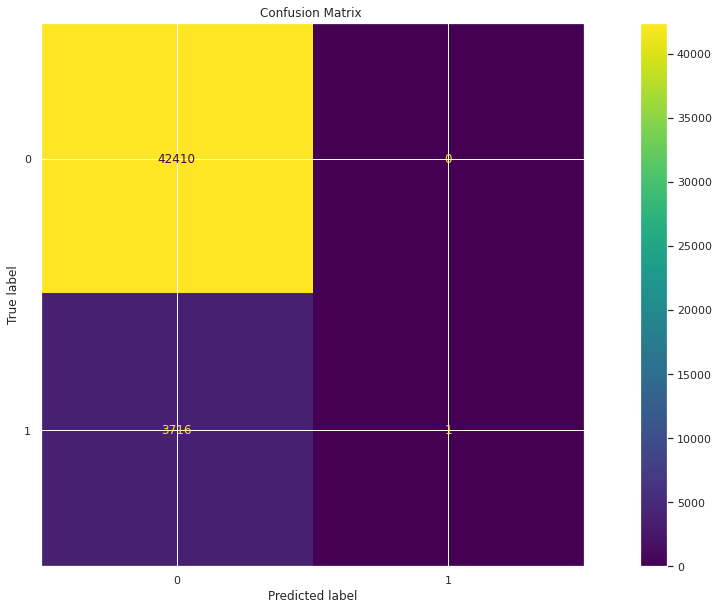

In [149]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
plt.clf()
plot_confusion_matrix(random_search,X_test, y_test)
plt.title('Confusion Matrix ')
plt.show()

## Baseline Model for Random Forest

In [150]:
%%time 
np.random.seed(42)
full_pipeline_with_rfpredictor = Pipeline([
        ("preparation", data_pipeline),
        ("linear", RandomForestClassifier(bootstrap = True,max_depth = 10, max_features = 2, n_estimators = 100))
    ])
model_rf = full_pipeline_with_rfpredictor.fit(X_train, y_train)

CPU times: user 7.91 s, sys: 547 ms, total: 8.46 s
Wall time: 10.9 s


### Evaluation metrics

In [151]:
np.round(accuracy_score(y_train, model_rf.predict(X_train)), 3)

0.92

In [152]:
roc_auc_score(y_train, model_rf.predict_proba(X_train)[:, 1])

0.7214601599630802

In [153]:
f1_score(y_train, model.predict(X_train), average='weighted')

0.8816546793108152

In [154]:
exp_name = "Baseline Random Forest "
expLog2.loc[len(expLog2)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_rf.predict(X_train)),
                accuracy_score(y_valid, model_rf.predict(X_valid)),
                accuracy_score(y_test, model_rf.predict(X_test)),
                roc_auc_score(y_train, model_rf.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model_rf.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1]),
                f1_score(y_train, model.predict(X_train), average='weighted'),
                f1_score(y_valid, model.predict(X_valid), average='weighted'),
                f1_score(y_test, model.predict(X_test), average='weighted')],
                
    4)) 


In [155]:
expLog2

exp_name  Train Acc  Valid Acc  Test  Acc  \
0  Baseline_LogicisticReg_features     0.9200     0.9164     0.9194   
1        Baseline_XGBoost_features     0.9201     0.9164     0.9194   
2          Baseline Random Forest      0.9200     0.9164     0.9194   

   Train AUC  Valid AUC  Test  AUC  Train F1  Valid F1  Test F1  
0     0.6950     0.6978     0.7016    0.8817    0.8765   0.8809  
1     0.7271     0.7057     0.7078    0.8817    0.8765   0.8809  
2     0.7215     0.6778     0.6807    0.8817    0.8765   0.8809

Score 0.6807267310026892


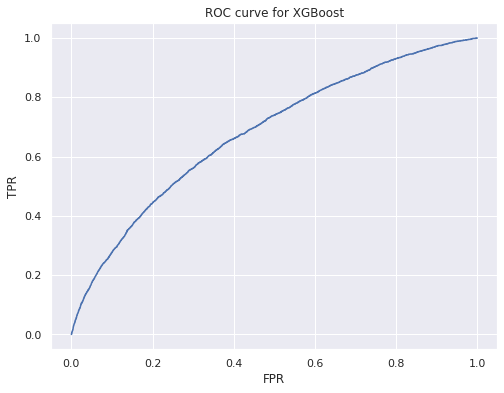

In [156]:
from sklearn import metrics
train_acc = model_rf.score(X_train, y_train)
validAcc  = model_rf.score(X_valid, y_valid)
testAcc  = model_rf.score(X_test, y_test)
    
predictions = model_rf.predict_proba(X_test)
print ("Score",roc_auc_score(y_test, predictions[:,1]))
    
    
fpr, tpr, _ = metrics.roc_curve(y_test, predictions[:,1])
plt.figure(figsize=(8,6))
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for XGBoost')
plt.show()

<Figure size 1440x720 with 0 Axes>

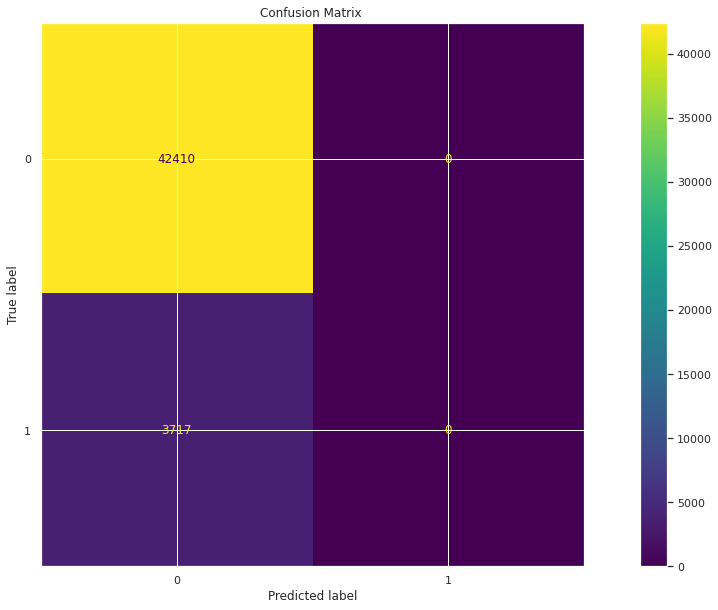

In [157]:
plt.clf()
plot_confusion_matrix(grid_search_rf,X_test, y_test)
plt.title('Confusion Matrix ')
plt.show()

# Phase 2

# Joining secondary tables with the primary table

In the case of the HCDR competition (and many other machine learning problems that involve multiple tables in 3NF or not)  we need to join these datasets (denormalize) when using a machine learning pipeline. Joining the secondary tables with the primary table will lead to lots of new features about each loan application; these features will tend to be aggregate type features or meta data about the loan or its application. How can we do this when using Machine Learning Pipelines?

## Joining `previous_application` with `application_x`
We refer to the `application_train` data (and also `application_test` data also) as the **primary table** and the other files as the **secondary tables** (e.g., `previous_application` dataset). All tables can be joined using the primary key `SK_ID_PREV`.

Let's assume we wish to generate a feature based on previous application attempts. In this case, possible features here could be:

* A simple feature could be the number of previous applications.
* Other summary features of original features such as `AMT_APPLICATION`, `AMT_CREDIT` could be based on average, min, max, median, etc.
 
To build such features, we need to join the `application_train` data (and also `application_test` data also) with the 'previous_application' dataset (and the other available datasets).

When joining this data in the context of pipelines, different strategies come to mind with various tradeoffs:

1. Preprocess each of the non-application data sets, thereby generating many new (derived) features, and then joining (aka merge) the results with the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset) prior to processing the data (in a train, valid, test partition) via your machine learning pipeline. [This approach is recommended for this HCDR competition. WHY?]

* Do the joins as part of the transformation steps. [Not recommended here. WHY?]. How can this be done? Will it work?
  * This would be necessary if we had dataset wide features such as IDF (inverse document frequency) which depend on the entire subset of data as opposed to a single loan application (e.g., a feature about the relative amount applied for such as the percentile of the loan amount being applied for).
 
I want you to think about this section and build on this.

## Roadmap for secondary table processing

1. Transform all the secondary tables to features that can be joined into the main table the application table (labeled and unlabeled)
   * 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 
   * 'previous_application', 'POS_CASH_balance'
* Merge the transformed secondary tables with the primary tables (i.e., the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset)), thereby leading to X_train, y_train, X_valid, etc.
* Proceed with the learning pipeline using X_train, y_train, X_valid, etc.
* Generate a submission file using the learnt model


## agg detour

Aggregate using one or more operations over the specified axis.

For more details see [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html)
```python
DataFrame.agg(func, axis=0, *args, **kwargs**)
```
Aggregate using one or more operations over the specified axis.


In [160]:
appsDF = datasets["previous_application"]

In [161]:
appsDF.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object', name='Feature')

### Multiple condition expressions in Pandas
So far, both our boolean selections have involved a single condition. You can, of course, have as many conditions as you would like. To do so, you will need to combine your boolean expressions using the three logical operators and, or and not.

Use &, | , ~
Although Python uses the syntax and, or, and not, these will not work when testing multiple conditions with pandas. The details of why are explained [here](https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-39e811c81a0c).

You must use the following operators with pandas:

* & for and
* | for or
* ~ for not

In [162]:
appsDF[0:50][(appsDF["SK_ID_CURR"]==175704)]

Feature  SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
6           2315218      175704         Cash loans          NaN   

Feature  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
6                    0.0         0.0               NaN              NaN   

Feature WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  ...  \
6                          TUESDAY                       11  ...   

Feature NAME_SELLER_INDUSTRY  CNT_PAYMENT  NAME_YIELD_GROUP  \
6                        XNA          NaN               XNA   

Feature  PRODUCT_COMBINATION  DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
6                       Cash                 NaN            NaN   

Feature DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
6                             NaN            NaN              NaN   

Feature NFLAG_INSURED_ON_APPROVAL  
6                             NaN  

[1 rows x 37 columns]

In [163]:
appsDF[0:50][(appsDF["SK_ID_CURR"]==175704) & ~(appsDF["AMT_CREDIT"]==1.0)]

Feature  SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
6           2315218      175704         Cash loans          NaN   

Feature  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
6                    0.0         0.0               NaN              NaN   

Feature WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  ...  \
6                          TUESDAY                       11  ...   

Feature NAME_SELLER_INDUSTRY  CNT_PAYMENT  NAME_YIELD_GROUP  \
6                        XNA          NaN               XNA   

Feature  PRODUCT_COMBINATION  DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
6                       Cash                 NaN            NaN   

Feature DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
6                             NaN            NaN              NaN   

Feature NFLAG_INSURED_ON_APPROVAL  
6                             NaN  

[1 rows x 37 columns]

## Missing values in prevApps


In [164]:
appsDF.isna().sum()

Feature
SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE     

In [165]:
appsDF.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object', name='Feature')

## Feature Aggregation Class for Aggregation using Pipeline


In [166]:
class FeatureAggregator(BaseEstimator,TransformerMixin):
    def __init__(self,dataset,features):
        self.features=features
        self.dataset=dataset
        self.agg_ops=['min','max','mean','sum']
  
    def fit(self,X,y=None):
        return self
  
    def transform(self,X,y=None):
        result=X.groupby(['SK_ID_CURR']).agg(self.agg_ops)
        result.columns=["_".join(x) for x in result.columns.ravel()]
        result=result.reset_index(level=["SK_ID_CURR"])
        return result

In [167]:
# Function used to rename
def rename(df,name):
    df.columns=pd.Index([name + "_"+ col for col in list(df.columns)])
    df.rename(columns={name+"_SK_ID_CURR":"SK_ID_CURR"},inplace=True)
    
def ohe(df):
    cat_df=df.select_dtypes(include='object')
    cat_cols=cat_df.columns
    df=pd.get_dummies(df,columns=cat_cols,dummy_na=False)
    return df

### Feature engineering on Bureau dataset

In [168]:
datasets.keys()

dict_keys(['application_train', 'application_test', 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 'previous_application', 'POS_CASH_balance'])

In [169]:
def correlation(df):
    appsDF = datasets["application_train"]
    secondary_df = datasets[df]
    corr_matrix = pd.concat([appsDF.TARGET, secondary_df], axis=1).corr().filter(secondary_df.columns).filter(appsDF.columns, axis=0).abs()
    return corr_matrix

In [170]:
df_name = 'bureau'
corr_matrix = correlation(df_name)
print(f"Correlation of the {df_name} with Application :")
corr_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the bureau with Application :


DAYS_CREDIT_UPDATE        0.002159
DAYS_CREDIT_ENDDATE       0.002048
CREDIT_DAY_OVERDUE        0.001815
SK_ID_BUREAU              0.001550
AMT_CREDIT_SUM_OVERDUE    0.001464
DAYS_CREDIT               0.001443
SK_ID_CURR                0.001070
AMT_CREDIT_SUM_DEBT       0.000946
AMT_CREDIT_SUM_LIMIT      0.000558
CNT_CREDIT_PROLONG        0.000495
AMT_CREDIT_MAX_OVERDUE    0.000389
AMT_CREDIT_SUM            0.000218
DAYS_ENDDATE_FACT         0.000203
AMT_ANNUITY               0.000189
Name: TARGET, dtype: float64

In [171]:
#Features considered for bureau dataset
bureau_features = ['AMT_ANNUITY', 'AMT_CREDIT_SUM','DAYS_CREDIT', 'DAYS_CREDIT_UPDATE', 'DAYS_CREDIT_ENDDATE','AMT_CREDIT_SUM_OVERDUE','CREDIT_DAY_OVERDUE'
                   ,'AMT_CREDIT_SUM_DEBT','AMT_CREDIT_SUM_LIMIT','AMT_CREDIT_MAX_OVERDUE'
                  ]
bureau_df = datasets["bureau"]
bureau_df = ohe(bureau_df)

In [172]:
bureau_df=bureau_df.groupby(["SK_ID_CURR"],as_index=False).agg("mean")
bureau_pipeline=Pipeline([
                       ('bur_aggregator',FeatureAggregator(bureau_df,bureau_features))
                       ])

In [173]:
bureau_agg=bureau_pipeline.transform(bureau_df)
bureau_df=bureau_df.merge(bureau_agg,how='left',on='SK_ID_CURR')
rename(bureau_df,"bur")

In [174]:
bureau_df.head()

SK_ID_CURR  bur_SK_ID_BUREAU  bur_DAYS_CREDIT  bur_CREDIT_DAY_OVERDUE  \
0      100001       5896633.000      -735.000000                     0.0   
1      100002       6153272.125      -874.000000                     0.0   
2      100003       5885878.500     -1400.750000                     0.0   
3      100004       6829133.500      -867.000000                     0.0   
4      100005       6735201.000      -190.666667                     0.0   

   bur_DAYS_CREDIT_ENDDATE  bur_DAYS_ENDDATE_FACT  bur_AMT_CREDIT_MAX_OVERDUE  \
0                82.428571            -825.500000                         NaN   
1              -349.000000            -697.500000                    1681.029   
2              -544.500000           -1097.333333                       0.000   
3              -488.500000            -532.500000                       0.000   
4               439.333333            -123.000000                       0.000   

   bur_CNT_CREDIT_PROLONG  bur_AMT_CREDIT_SUM  bur_AMT_CREDIT_SUM_DEBT  ...  \
0                     0.0       207623.571429             85240.928571  ...   
1                     0.0       108131.945625             49156.200000  ...   
2                     0.0       254350.125000                 0.000000  ...   
3                     0.0        94518.900000                 0.000000  ...   
4                     0.0       219042.000000            189469.500000  ...   

   bur_CREDIT_TYPE_Mortgage_mean  bur_CREDIT_TYPE_Mortgage_sum  \
0                            0.0                           0.0   
1                            0.0                           0.0   
2                            0.0                           0.0   
3                            0.0                           0.0   
4                            0.0                           0.0   

   bur_CREDIT_TYPE_Real estate loan_min  bur_CREDIT_TYPE_Real estate loan_max  \
0                                   0.0                                   0.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   
3                                   0.0                                   0.0   
4                                   0.0                                   0.0   

   bur_CREDIT_TYPE_Real estate loan_mean  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   bur_CREDIT_TYPE_Real estate loan_sum  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   bur_CREDIT_TYPE_Unknown type of loan_min  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   bur_CREDIT_TYPE_Unknown type of loan_max  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   bur_CREDIT_TYPE_Unknown type of loan_mean  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   bur_CREDIT_TYPE_Unknown type of loan_sum  
0                                       0.0  
1                                       0.0  
2                                       0.0  
3                                       0.0  
4                                       0.0  

[5 rows x 181 columns]

In [175]:
bureau_df['bur_ENDDATE_DIFF'] = bureau_df['bur_DAYS_CREDIT_ENDDATE'] - bureau_df['bur_DAYS_ENDDATE_FACT']
bureau_df['bur_UPDATE_DIFF'] = bureau_df['bur_DAYS_CREDIT_ENDDATE'] - bureau_df['bur_DAYS_CREDIT_UPDATE']
bureau_df['bur_DEBT_PERCENTAGE'] = bureau_df['bur_AMT_CREDIT_SUM'] / bureau_df['bur_AMT_CREDIT_SUM_DEBT']
bureau_df['bur_DEBT_CREDIT_DIFF'] = bureau_df['bur_AMT_CREDIT_SUM'] - bureau_df['bur_AMT_CREDIT_SUM_DEBT']
bureau_df['bur_CREDIT_TO_ANNUITY_RATIO'] = bureau_df['bur_AMT_CREDIT_SUM'] / bureau_df['bur_AMT_ANNUITY']
bureau_df['bur_DEBT_TO_ANNUITY_RATIO'] = bureau_df['bur_AMT_CREDIT_SUM_DEBT'] / bureau_df['bur_AMT_ANNUITY']
bureau_df['bur_CREDIT_OVERDUE_DIFF'] = bureau_df['bur_AMT_CREDIT_SUM'] - bureau_df['bur_AMT_CREDIT_SUM_OVERDUE']

In [176]:
display(bureau_df.shape)
bureau_df.head()

(305811, 188)

SK_ID_CURR  bur_SK_ID_BUREAU  bur_DAYS_CREDIT  bur_CREDIT_DAY_OVERDUE  \
0      100001       5896633.000      -735.000000                     0.0   
1      100002       6153272.125      -874.000000                     0.0   
2      100003       5885878.500     -1400.750000                     0.0   
3      100004       6829133.500      -867.000000                     0.0   
4      100005       6735201.000      -190.666667                     0.0   

   bur_DAYS_CREDIT_ENDDATE  bur_DAYS_ENDDATE_FACT  bur_AMT_CREDIT_MAX_OVERDUE  \
0                82.428571            -825.500000                         NaN   
1              -349.000000            -697.500000                    1681.029   
2              -544.500000           -1097.333333                       0.000   
3              -488.500000            -532.500000                       0.000   
4               439.333333            -123.000000                       0.000   

   bur_CNT_CREDIT_PROLONG  bur_AMT_CREDIT_SUM  bur_AMT_CREDIT_SUM_DEBT  ...  \
0                     0.0       207623.571429             85240.928571  ...   
1                     0.0       108131.945625             49156.200000  ...   
2                     0.0       254350.125000                 0.000000  ...   
3                     0.0        94518.900000                 0.000000  ...   
4                     0.0       219042.000000            189469.500000  ...   

   bur_CREDIT_TYPE_Unknown type of loan_max  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   bur_CREDIT_TYPE_Unknown type of loan_mean  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   bur_CREDIT_TYPE_Unknown type of loan_sum  bur_ENDDATE_DIFF  \
0                                       0.0        907.928571   
1                                       0.0        348.500000   
2                                       0.0        552.833333   
3                                       0.0         44.000000   
4                                       0.0        562.333333   

   bur_UPDATE_DIFF  bur_DEBT_PERCENTAGE  bur_DEBT_CREDIT_DIFF  \
0       175.571429             2.435726         122382.642857   
1       150.875000             2.199762          58975.745625   
2       271.500000                  inf         254350.125000   
3        43.500000                  inf          94518.900000   
4       493.666667             1.156081          29572.500000   

   bur_CREDIT_TO_ANNUITY_RATIO  bur_DEBT_TO_ANNUITY_RATIO  \
0                    58.562103                  24.042974   
1                          inf                        inf   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                   154.200634                 133.382260   

   bur_CREDIT_OVERDUE_DIFF  
0            207623.571429  
1            108131.945625  
2            254350.125000  
3             94518.900000  
4            219042.000000  

[5 rows x 188 columns]

#### Joining the Bureau with Application train and test

In [177]:
app_train_df=datasets['application_train']
app_test_df=datasets['application_test']

In [178]:
import gc
app_train_df=app_train_df.merge(bureau_df,how='left',on='SK_ID_CURR')
app_test_df=app_test_df.merge(bureau_df,how='left',on='SK_ID_CURR')
gc.collect()


16616

In [179]:
print(app_train_df.shape)
print(app_test_df.shape)

(307511, 309)
(48744, 308)


### Feature engineering on Bureau Balance dataset

In [180]:
df_name = 'bureau_balance'
corr_matrix = correlation(df_name)
print(f"Correlation of the {df_name} with Application :")
corr_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the bureau_balance with Application :


MONTHS_BALANCE    0.005262
SK_ID_BUREAU      0.001223
Name: TARGET, dtype: float64

In [181]:
bureau_bal_features = ['MONTHS_BALANCE']
bureau_bal_df = datasets["bureau_balance"]
bureau_bal_df = ohe(bureau_bal_df)

In [182]:
bureau_bal_df = bureau_bal_df.groupby(["SK_ID_BUREAU"],as_index=False).agg("mean")
bureau_bal_df = bureau_bal_df.groupby(["SK_ID_BUREAU"],as_index=False).agg({f"{feature}":["min","max","mean","sum"] for feature in ["MONTHS_BALANCE"]})
bureau_bal_df.columns = ["_".join(x) for x in bureau_bal_df.columns.ravel()]
bureau_bal_df.columns = pd.Index(['bur_bal_'+col for col in list(bureau_bal_df.columns)])

In [183]:
bureau_bal_df.rename(columns={"bur_bal_SK_ID_BUREAU_":"SK_ID_BUREAU"},inplace=True)
bureau_bal_df.rename(columns={"SK_ID_BUREAU":"SK_ID_CURR"},inplace=True)

In [184]:
bureau_bal_df.shape

(427349, 5)

In [185]:
bureau_bal_df.head()

SK_ID_CURR  bur_bal_MONTHS_BALANCE_min  bur_bal_MONTHS_BALANCE_max  \
0     5001710                       -41.0                       -41.0   
1     5001711                        -1.5                        -1.5   
2     5001712                        -9.0                        -9.0   
3     5001713                       -10.5                       -10.5   
4     5001714                        -7.0                        -7.0   

   bur_bal_MONTHS_BALANCE_mean  bur_bal_MONTHS_BALANCE_sum  
0                        -41.0                       -41.0  
1                         -1.5                        -1.5  
2                         -9.0                        -9.0  
3                        -10.5                       -10.5  
4                         -7.0                        -7.0

#### Joining the Bureau with Application train and test

In [186]:
app_train_df=app_train_df.merge(bureau_bal_df,how='left',on='SK_ID_CURR')
app_test_df=app_test_df.merge(bureau_bal_df,how='left',on='SK_ID_CURR')
gc.collect()

0

In [187]:
print(app_train_df.shape)
print(app_test_df.shape)

(307511, 313)
(48744, 312)


### Feature engineering on Credit Card Balance dataset

In [188]:
df_name = 'credit_card_balance'
corr_matrix = correlation(df_name)
print(f"Correlation of the {df_name} with Application :")
corr_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the credit_card_balance with Application :


AMT_DRAWINGS_POS_CURRENT      0.003518
AMT_DRAWINGS_OTHER_CURRENT    0.002672
CNT_DRAWINGS_POS_CURRENT      0.002387
CNT_DRAWINGS_ATM_CURRENT      0.001908
CNT_DRAWINGS_OTHER_CURRENT    0.001833
CNT_DRAWINGS_CURRENT          0.001764
AMT_DRAWINGS_ATM_CURRENT      0.001520
AMT_INST_MIN_REGULARITY       0.001435
AMT_DRAWINGS_CURRENT          0.001419
AMT_PAYMENT_TOTAL_CURRENT     0.001395
AMT_PAYMENT_CURRENT           0.001129
SK_ID_CURR                    0.001086
MONTHS_BALANCE                0.000768
AMT_CREDIT_LIMIT_ACTUAL       0.000515
AMT_BALANCE                   0.000448
SK_ID_PREV                    0.000446
AMT_RECIVABLE                 0.000412
AMT_TOTAL_RECEIVABLE          0.000407
AMT_RECEIVABLE_PRINCIPAL      0.000383
CNT_INSTALMENT_MATURE_CUM     0.000342
SK_DPD_DEF                    0.000201
SK_DPD                        0.000092
Name: TARGET, dtype: float64

In [189]:
#Features considered for credit card balance dataset
credit_card_bal_features = ['AMT_DRAWINGS_POS_CURRENT','AMT_DRAWINGS_OTHER_CURRENT','CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_POS_CURRENT' , 'CNT_DRAWINGS_CURRENT'
                            'MONTHS_BALANCE', 'AMT_BALANCE', 'CNT_INSTALMENT_MATURE_CUM','AMT_DRAWINGS_ATM_CURRENT', 'AMT_CREDIT_LIMIT_ACTUAL'
                              ]
credit_card_bal_df = datasets["credit_card_balance"]
credit_card_bal_df = ohe(credit_card_bal_df)

In [190]:
credit_card_bal_df = credit_card_bal_df.groupby(["SK_ID_CURR"],as_index=False).agg("mean")
credit_card_bal_pipeline=Pipeline([
                 ("credit_card_bal_aggregator",FeatureAggregator(credit_card_bal_df,credit_card_bal_features))
])

In [191]:
credit_card_bal_agg = credit_card_bal_pipeline.transform(credit_card_bal_df)
credit_card_bal_df = credit_card_bal_df.merge(credit_card_bal_agg,how='left',on=['SK_ID_CURR'])
rename(credit_card_bal_df,"cc")

In [192]:
credit_card_bal_df['cc_LIMIT_USAGE'] = credit_card_bal_df['cc_AMT_BALANCE'] / credit_card_bal_df['cc_AMT_CREDIT_LIMIT_ACTUAL']
credit_card_bal_df['cc_LATE_PAYMENT'] = credit_card_bal_df['cc_SK_DPD'].apply(lambda x: 1 if x > 0 else 0)    
credit_card_bal_df['cc_DRAWING_LIMIT_RATIO'] = credit_card_bal_df['cc_AMT_DRAWINGS_ATM_CURRENT'] / credit_card_bal_df['cc_AMT_CREDIT_LIMIT_ACTUAL']

In [193]:
display(credit_card_bal_df.shape)
credit_card_bal_df.head()

(102667, 144)

SK_ID_CURR  cc_SK_ID_PREV  cc_MONTHS_BALANCE  cc_AMT_BALANCE  \
0      100006      1489396.0          -3.500000        0.000000   
1      100011      1843384.0         -41.625000    64490.328281   
2      100013      2038692.0         -46.777778    27411.178000   
3      100021      2594025.0          -9.666667        0.000000   
4      100023      1499902.0          -7.000000        0.000000   

   cc_AMT_CREDIT_LIMIT_ACTUAL  cc_AMT_DRAWINGS_ATM_CURRENT  \
0                    270000.0                          NaN   
1                    168750.0                      0.00000   
2                    122500.0                   9732.55814   
3                    675000.0                          NaN   
4                    135000.0                          NaN   

   cc_AMT_DRAWINGS_CURRENT  cc_AMT_DRAWINGS_OTHER_CURRENT  \
0                      0.0                            NaN   
1                      0.0                            0.0   
2                   9300.0                            0.0   
3                      0.0                            NaN   
4                      0.0                            NaN   

   cc_AMT_DRAWINGS_POS_CURRENT  cc_AMT_INST_MIN_REGULARITY  ...  \
0                          NaN                    0.000000  ...   
1                          0.0                 5087.631094  ...   
2                          0.0                 1705.501071  ...   
3                          NaN                    0.000000  ...   
4                          NaN                    0.000000  ...   

   cc_NAME_CONTRACT_STATUS_Sent proposal_max  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   cc_NAME_CONTRACT_STATUS_Sent proposal_mean  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   cc_NAME_CONTRACT_STATUS_Sent proposal_sum  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   cc_NAME_CONTRACT_STATUS_Signed_min  cc_NAME_CONTRACT_STATUS_Signed_max  \
0                                 0.0                                 0.0   
1                                 0.0                                 0.0   
2                                 0.0                                 0.0   
3                                 0.0                                 0.0   
4                                 0.0                                 0.0   

   cc_NAME_CONTRACT_STATUS_Signed_mean  cc_NAME_CONTRACT_STATUS_Signed_sum  \
0                                  0.0                                 0.0   
1                                  0.0                                 0.0   
2                                  0.0                                 0.0   
3                                  0.0                                 0.0   
4                                  0.0                                 0.0   

   cc_LIMIT_USAGE  cc_LATE_PAYMENT  cc_DRAWING_LIMIT_RATIO  
0        0.000000                0                     NaN  
1        0.382165                0                0.000000  
2        0.223765                1                0.079449  
3        0.000000                0                     NaN  
4        0.000000                0                     NaN  

[5 rows x 144 columns]

#### Joining the Credit card balance with Application train and test

In [194]:
app_train_df = app_train_df.merge(credit_card_bal_df,how='left',on='SK_ID_CURR')
app_test_df = app_test_df.merge(credit_card_bal_df,how='left',on='SK_ID_CURR')
gc.collect()

0

In [195]:
print(app_train_df.shape)
print(app_test_df.shape)

(307511, 456)
(48744, 455)


### Feature engineering on Installment Payment dataset

In [196]:
df_name = 'installments_payments'
corr_matrix = correlation(df_name)
print(f"Correlation of the {df_name} with Application :")
corr_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the installments_payments with Application :


DAYS_ENTRY_PAYMENT        0.004046
AMT_INSTALMENT            0.003972
DAYS_INSTALMENT           0.003955
AMT_PAYMENT               0.003512
SK_ID_PREV                0.002891
NUM_INSTALMENT_VERSION    0.002511
SK_ID_CURR                0.000781
NUM_INSTALMENT_NUMBER     0.000626
Name: TARGET, dtype: float64

In [197]:
installments_payments_features = ['DAYS_ENTRY_PAYMENT','AMT_INSTALMENT','DAYS_INSTALMENT', 'AMT_PAYMENT' ,'NUM_INSTALMENT_VERSION']
installments_payments_df=datasets['installments_payments']
installments_payments_df = ohe(installments_payments_df)


In [198]:
installments_payments_df = installments_payments_df.groupby(["SK_ID_CURR"],as_index=False).agg("mean")
installments_payments_pipeline = Pipeline([
                           ("ins_pay_aggregator",FeatureAggregator(installments_payments_df,installments_payments_features))
])

In [199]:
installments_payments_agg = installments_payments_pipeline.transform(installments_payments_df)
installments_payments_df = installments_payments_df.merge(installments_payments_agg,how='left',on=['SK_ID_CURR'])
rename(installments_payments_df,"ins")

In [200]:
installments_payments_df['ins_PAID_OVER_AMOUNT'] = installments_payments_df['ins_AMT_PAYMENT'] - installments_payments_df['ins_AMT_INSTALMENT']
installments_payments_df['ins_DBD'] = installments_payments_df['ins_DAYS_INSTALMENT'] - installments_payments_df['ins_DAYS_ENTRY_PAYMENT']
installments_payments_df['ins_DBD'] = installments_payments_df['ins_DBD'].apply(lambda x: 0 if x <= 0 else x)
installments_payments_df['ins_LATE_PAYMENT'] = installments_payments_df['ins_DBD'].apply(lambda x: 1 if x > 0 else 0)

In [201]:
display(installments_payments_df.shape)
installments_payments_df.head()

(339587, 39)

SK_ID_CURR  ins_SK_ID_PREV  ins_NUM_INSTALMENT_VERSION  \
0      100001    1.576389e+06                    1.142857   
1      100002    1.038818e+06                    1.052632   
2      100003    2.290070e+06                    1.040000   
3      100004    1.564014e+06                    1.333333   
4      100005    2.495675e+06                    1.111111   

   ins_NUM_INSTALMENT_NUMBER  ins_DAYS_INSTALMENT  ins_DAYS_ENTRY_PAYMENT  \
0                   2.714286         -2187.714286            -2195.000000   
1                  10.000000          -295.000000             -315.421053   
2                   5.080000         -1378.160000            -1385.320000   
3                   2.000000          -754.000000             -761.666667   
4                   5.000000          -586.000000             -609.555556   

   ins_AMT_INSTALMENT  ins_AMT_PAYMENT  ins_SK_ID_PREV_min  \
0         5885.132143      5885.132143        1.576389e+06   
1        11559.247105     11559.247105        1.038818e+06   
2        64754.586000     64754.586000        2.290070e+06   
3         7096.155000      7096.155000        1.564014e+06   
4         6240.205000      6240.205000        2.495675e+06   

   ins_SK_ID_PREV_max  ...  ins_AMT_INSTALMENT_max  ins_AMT_INSTALMENT_mean  \
0        1.576389e+06  ...             5885.132143              5885.132143   
1        1.038818e+06  ...            11559.247105             11559.247105   
2        2.290070e+06  ...            64754.586000             64754.586000   
3        1.564014e+06  ...             7096.155000              7096.155000   
4        2.495675e+06  ...             6240.205000              6240.205000   

   ins_AMT_INSTALMENT_sum  ins_AMT_PAYMENT_min  ins_AMT_PAYMENT_max  \
0             5885.132143          5885.132143          5885.132143   
1            11559.247105         11559.247105         11559.247105   
2            64754.586000         64754.586000         64754.586000   
3             7096.155000          7096.155000          7096.155000   
4             6240.205000          6240.205000          6240.205000   

   ins_AMT_PAYMENT_mean  ins_AMT_PAYMENT_sum  ins_PAID_OVER_AMOUNT    ins_DBD  \
0           5885.132143          5885.132143                   0.0   7.285714   
1          11559.247105         11559.247105                   0.0  20.421053   
2          64754.586000         64754.586000                   0.0   7.160000   
3           7096.155000          7096.155000                   0.0   7.666667   
4           6240.205000          6240.205000                   0.0  23.555556   

   ins_LATE_PAYMENT  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  

[5 rows x 39 columns]

#### Joining the Installment Payment  with Application train and test

In [202]:
app_train_df = app_train_df.merge(installments_payments_df,how='left',on='SK_ID_CURR')
app_test_df = app_test_df.merge(installments_payments_df,how='left',on='SK_ID_CURR')
gc.collect()

0

In [203]:
print(app_train_df.shape)
print(app_test_df.shape)

(307511, 494)
(48744, 493)


### Feature engineering on Previous Application Dataset

In [204]:
df_name = 'previous_application'
corr_matrix = correlation(df_name)
print(f"Correlation of the {df_name} with Application :")
corr_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the previous_application with Application :


RATE_INTEREST_PRIVILEGED     0.026427
AMT_DOWN_PAYMENT             0.002496
CNT_PAYMENT                  0.002341
HOUR_APPR_PROCESS_START      0.002285
DAYS_LAST_DUE                0.001940
DAYS_LAST_DUE_1ST_VERSION    0.001908
AMT_CREDIT                   0.001833
AMT_APPLICATION              0.001689
AMT_GOODS_PRICE              0.001676
DAYS_FIRST_DRAWING           0.001293
NFLAG_LAST_APPL_IN_DAY       0.001256
SK_ID_CURR                   0.001107
DAYS_TERMINATION             0.001072
SELLERPLACE_AREA             0.000954
DAYS_FIRST_DUE               0.000943
NFLAG_INSURED_ON_APPROVAL    0.000879
RATE_DOWN_PAYMENT            0.000850
RATE_INTEREST_PRIMARY        0.000542
AMT_ANNUITY                  0.000492
DAYS_DECISION                0.000482
SK_ID_PREV                   0.000362
Name: TARGET, dtype: float64

In [205]:
prevApps_features = ['AMT_ANNUITY', 'AMT_APPLICATION','AMT_GOODS_PRICE','AMT_DOWN_PAYMENT','CNT_PAYMENT','RATE_INTEREST_PRIVILEGED',   
                     'AMT_CREDIT','DAYS_FIRST_DRAWING','DAYS_LAST_DUE','DAYS_FIRST_DUE','DAYS_TERMINATION' 
                    ]
prevApps_df=datasets['previous_application']
prevApps_df = ohe(prevApps_df)

In [206]:
prevApps_df = prevApps_df.groupby(["SK_ID_CURR"],as_index=False).agg('mean')
prevApps_pipeline=Pipeline([
                            ("prevApps_aggregator",FeatureAggregator(prevApps_df,prevApps_features))
                            ])

In [207]:
prevApps_agg = prevApps_pipeline.transform(prevApps_df)
prevApps_df = prevApps_df.merge(prevApps_agg, how='left',on=['SK_ID_CURR'])
rename(prevApps_df,"pa")

In [208]:
prevApps_df['pa_APPLICATION_CREDIT_DIFF'] = prevApps_df['pa_AMT_APPLICATION'] - prevApps_df['pa_AMT_CREDIT']
prevApps_df['pa_APPLICATION_CREDIT_RATIO'] = prevApps_df['pa_AMT_APPLICATION'] / prevApps_df['pa_AMT_CREDIT']
prevApps_df['pa_DOWN_PAYMENT_TO_CREDIT'] = prevApps_df['pa_AMT_DOWN_PAYMENT'] / prevApps_df['pa_AMT_CREDIT']

In [209]:
display(prevApps_df.shape)
prevApps_df.head()

(338857, 819)

SK_ID_CURR  pa_SK_ID_PREV  pa_AMT_ANNUITY  pa_AMT_APPLICATION  \
0      100001   1.369693e+06        3951.000            24835.50   
1      100002   1.038818e+06        9251.775           179055.00   
2      100003   2.281150e+06       56553.990           435436.50   
3      100004   1.564014e+06        5357.250            24282.00   
4      100005   2.176837e+06        4813.200            22308.75   

   pa_AMT_CREDIT  pa_AMT_DOWN_PAYMENT  pa_AMT_GOODS_PRICE  \
0       23787.00               2520.0             24835.5   
1      179055.00                  0.0            179055.0   
2      484191.00               3442.5            435436.5   
3       20106.00               4860.0             24282.0   
4       20076.75               4464.0             44617.5   

   pa_HOUR_APPR_PROCESS_START  pa_NFLAG_LAST_APPL_IN_DAY  \
0                   13.000000                        1.0   
1                    9.000000                        1.0   
2                   14.666667                        1.0   
3                    5.000000                        1.0   
4                   10.500000                        1.0   

   pa_RATE_DOWN_PAYMENT  ...  \
0              0.104326  ...   
1              0.000000  ...   
2              0.050030  ...   
3              0.212008  ...   
4              0.108964  ...   

   pa_PRODUCT_COMBINATION_POS other with interest_max  \
0                                                0.0    
1                                                1.0    
2                                                0.0    
3                                                0.0    
4                                                0.0    

   pa_PRODUCT_COMBINATION_POS other with interest_mean  \
0                                                0.0     
1                                                1.0     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   pa_PRODUCT_COMBINATION_POS other with interest_sum  \
0                                                0.0    
1                                                1.0    
2                                                0.0    
3                                                0.0    
4                                                0.0    

   pa_PRODUCT_COMBINATION_POS others without interest_min  \
0                                                0.0        
1                                                0.0        
2                                                0.0        
3                                                0.0        
4                                                0.0        

   pa_PRODUCT_COMBINATION_POS others without interest_max  \
0                                                0.0        
1                                                0.0        
2                                                0.0        
3                                                0.0        
4                                                0.0        

   pa_PRODUCT_COMBINATION_POS others without interest_mean  \
0                                                0.0         
1                                                0.0         
2                                                0.0         
3                                                0.0         
4                                                0.0         

   pa_PRODUCT_COMBINATION_POS others without interest_sum  \
0                                                0.0        
1                                                0.0        
2                                                0.0        
3                                                0.0        
4                                                0.0        

   pa_APPLICATION_CREDIT_DIFF  pa_APPLICATION_CREDIT_RATIO  \
0                      1048.5                     1.044079   
1                         0.0           

#### Joining the Installment Payment  with Application train and test

In [210]:
app_train_df = app_train_df.merge(prevApps_df,how='left',on='SK_ID_CURR')
app_test_df = app_test_df.merge(prevApps_df,how='left',on='SK_ID_CURR')
gc.collect()

0

In [211]:
print(app_train_df.shape)
print(app_test_df.shape)

(307511, 1312)
(48744, 1311)


### Feature engineering on POS_CASH_Balance Dataset


In [212]:
df_name = 'POS_CASH_balance'
corr_matrix = correlation(df_name)
print(f"Correlation of the {df_name} with Application :")
corr_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the POS_CASH_balance with Application :


CNT_INSTALMENT_FUTURE    0.002811
MONTHS_BALANCE           0.002775
SK_ID_PREV               0.002164
CNT_INSTALMENT           0.001434
SK_DPD_DEF               0.001362
SK_ID_CURR               0.000136
SK_DPD                   0.000050
Name: TARGET, dtype: float64

In [213]:
pos_cash_balance_features = ['CNT_INSTALMENT_FUTURE','MONTHS_BALANCE','CNT_INSTALMENT','SK_DPD_DEF']
pos_cash_balance_df=datasets['POS_CASH_balance']
pos_cash_balance_df = ohe(pos_cash_balance_df)

In [214]:
pos_cash_balance_df = pos_cash_balance_df.groupby(["SK_ID_CURR"],as_index=False).agg("mean")
pos_cash_balance_pipeline=Pipeline([
                             ("pos_cash_aggregator",FeatureAggregator(pos_cash_balance_df,pos_cash_balance_features))
                            ])

In [215]:
pos_cash_balance_agg = pos_cash_balance_pipeline.transform(pos_cash_balance_df)
pos_cash_balance_df = pos_cash_balance_df.merge(pos_cash_balance_agg,how='left',on=['SK_ID_CURR'])
rename(pos_cash_balance_df,"pos")

In [216]:
pos_cash_balance_df['pos_LATE_PAYMENT'] = pos_cash_balance_df['pos_SK_DPD'].apply(lambda x:1 if x>0 else 0)

In [217]:
display(pos_cash_balance_df.shape)
pos_cash_balance_df.head()

(337252, 77)

SK_ID_CURR  pos_SK_ID_PREV  pos_MONTHS_BALANCE  pos_CNT_INSTALMENT  \
0      100001    1.584045e+06          -72.555556            4.000000   
1      100002    1.038818e+06          -10.000000           24.000000   
2      100003    2.297665e+06          -43.785714           10.107143   
3      100004    1.564014e+06          -25.500000            3.750000   
4      100005    2.495675e+06          -20.000000           11.700000   

   pos_CNT_INSTALMENT_FUTURE  pos_SK_DPD  pos_SK_DPD_DEF  \
0                   1.444444    0.777778        0.777778   
1                  15.000000    0.000000        0.000000   
2                   5.785714    0.000000        0.000000   
3                   2.250000    0.000000        0.000000   
4                   7.200000    0.000000        0.000000   

   pos_NAME_CONTRACT_STATUS_Active  pos_NAME_CONTRACT_STATUS_Amortized debt  \
0                         0.777778                                      0.0   
1                         1.000000                                      0.0   
2                         0.928571                                      0.0   
3                         0.750000                                      0.0   
4                         0.818182                                      0.0   

   pos_NAME_CONTRACT_STATUS_Approved  ...  \
0                                0.0  ...   
1                                0.0  ...   
2                                0.0  ...   
3                                0.0  ...   
4                                0.0  ...   

   pos_NAME_CONTRACT_STATUS_Returned to the store_sum  \
0                                                0.0    
1                                                0.0    
2                                                0.0    
3                                                0.0    
4                                                0.0    

   pos_NAME_CONTRACT_STATUS_Signed_min  pos_NAME_CONTRACT_STATUS_Signed_max  \
0                             0.000000                             0.000000   
1                             0.000000                             0.000000   
2                             0.000000                             0.000000   
3                             0.000000                             0.000000   
4                             0.090909                             0.090909   

   pos_NAME_CONTRACT_STATUS_Signed_mean  pos_NAME_CONTRACT_STATUS_Signed_sum  \
0                              0.000000                             0.000000   
1                              0.000000                             0.000000   
2                              0.000000                             0.000000   
3                              0.000000                             0.000000   
4                              0.090909                             0.090909   

   pos_NAME_CONTRACT_STATUS_XNA_min  pos_NAME_CONTRACT_STATUS_XNA_max  \
0                               0.0                               0.0   
1                               0.0                               0.0   
2                               0.0                               0.0   
3                               0.0                               0.0   
4                               0.0                               0.0   

   pos_NAME_CONTRACT_STATUS_XNA_mean  pos_NAME_CONTRACT_STATUS_XNA_sum  \
0                                0.0                               0.0   
1                                0.0                               0.0   
2                                0.0                               0.0   
3                                0.0                               0.0   
4                                0.0                               0.0   

   pos_LATE_PAYMENT  
0                 1  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 77 columns]

#### Joining the POS_CASH_Balance with Application train and test

In [218]:
app_train_df = app_train_df.merge(pos_cash_balance_df, how='left',on='SK_ID_CURR')
app_test_df = app_test_df.merge(pos_cash_balance_df, how='left',on='SK_ID_CURR')
gc.collect()

0

In [219]:
print(app_train_df.shape)
print(app_test_df.shape)

(307511, 1388)
(48744, 1387)


In [220]:
corr_num=np.abs(app_train_df.loc[:, app_train_df.columns].corr()['TARGET']).sort_values(ascending=False)
corr_num
corr_num.head()

TARGET            1.000000
EXT_SOURCE_3      0.178919
EXT_SOURCE_2      0.160472
EXT_SOURCE_1      0.155317
cc_LIMIT_USAGE    0.129320
Name: TARGET, dtype: float64

In [221]:
corr_num.head(50)

TARGET                                  1.000000
EXT_SOURCE_3                            0.178919
EXT_SOURCE_2                            0.160472
EXT_SOURCE_1                            0.155317
cc_LIMIT_USAGE                          0.129320
cc_CNT_DRAWINGS_ATM_CURRENT_sum         0.101890
cc_CNT_DRAWINGS_ATM_CURRENT_max         0.093594
cc_CNT_DRAWINGS_ATM_CURRENT_min         0.093594
cc_CNT_DRAWINGS_ATM_CURRENT             0.093594
cc_CNT_DRAWINGS_ATM_CURRENT_mean        0.093594
bur_DAYS_CREDIT_max                     0.089729
bur_DAYS_CREDIT_mean                    0.089729
bur_DAYS_CREDIT_sum                     0.089729
bur_DAYS_CREDIT_min                     0.089729
bur_DAYS_CREDIT                         0.089729
cc_AMT_BALANCE_min                      0.085774
cc_AMT_BALANCE_max                      0.085774
cc_AMT_BALANCE_mean                     0.085774
cc_AMT_BALANCE_sum                      0.085774
cc_AMT_BALANCE                          0.085774
cc_AMT_TOTAL_RECEIVA

In [272]:
corr_num.head(20)

TARGET                              1.000000
EXT_SOURCE_3                        0.178919
EXT_SOURCE_2                        0.160472
EXT_SOURCE_1                        0.155317
cc_LIMIT_USAGE                      0.129320
cc_CNT_DRAWINGS_ATM_CURRENT_sum     0.101890
cc_CNT_DRAWINGS_ATM_CURRENT_max     0.093594
cc_CNT_DRAWINGS_ATM_CURRENT_min     0.093594
cc_CNT_DRAWINGS_ATM_CURRENT         0.093594
cc_CNT_DRAWINGS_ATM_CURRENT_mean    0.093594
bur_DAYS_CREDIT_max                 0.089729
bur_DAYS_CREDIT_mean                0.089729
bur_DAYS_CREDIT_sum                 0.089729
bur_DAYS_CREDIT_min                 0.089729
bur_DAYS_CREDIT                     0.089729
cc_AMT_BALANCE_min                  0.085774
cc_AMT_BALANCE_max                  0.085774
cc_AMT_BALANCE_mean                 0.085774
cc_AMT_BALANCE_sum                  0.085774
cc_AMT_BALANCE                      0.085774
Name: TARGET, dtype: float64

In [222]:
features_top50 =list(corr_num.index[1:51])
features_top50

['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'EXT_SOURCE_1',
 'cc_LIMIT_USAGE',
 'cc_CNT_DRAWINGS_ATM_CURRENT_sum',
 'cc_CNT_DRAWINGS_ATM_CURRENT_max',
 'cc_CNT_DRAWINGS_ATM_CURRENT_min',
 'cc_CNT_DRAWINGS_ATM_CURRENT',
 'cc_CNT_DRAWINGS_ATM_CURRENT_mean',
 'bur_DAYS_CREDIT_max',
 'bur_DAYS_CREDIT_mean',
 'bur_DAYS_CREDIT_sum',
 'bur_DAYS_CREDIT_min',
 'bur_DAYS_CREDIT',
 'cc_AMT_BALANCE_min',
 'cc_AMT_BALANCE_max',
 'cc_AMT_BALANCE_mean',
 'cc_AMT_BALANCE_sum',
 'cc_AMT_BALANCE',
 'cc_AMT_TOTAL_RECEIVABLE',
 'cc_AMT_TOTAL_RECEIVABLE_max',
 'cc_AMT_TOTAL_RECEIVABLE_sum',
 'cc_AMT_TOTAL_RECEIVABLE_mean',
 'cc_AMT_TOTAL_RECEIVABLE_min',
 'cc_AMT_RECIVABLE_max',
 'cc_AMT_RECIVABLE',
 'cc_AMT_RECIVABLE_sum',
 'cc_AMT_RECIVABLE_mean',
 'cc_AMT_RECIVABLE_min',
 'cc_AMT_RECEIVABLE_PRINCIPAL_max',
 'cc_AMT_RECEIVABLE_PRINCIPAL',
 'cc_AMT_RECEIVABLE_PRINCIPAL_min',
 'cc_AMT_RECEIVABLE_PRINCIPAL_sum',
 'cc_AMT_RECEIVABLE_PRINCIPAL_mean',
 'bur_CREDIT_ACTIVE_Closed_min',
 'bur_CREDIT_ACTIVE_Closed_max',
 '

In [223]:
app_train_df[features_top50].head()

EXT_SOURCE_3  EXT_SOURCE_2  EXT_SOURCE_1  cc_LIMIT_USAGE  \
0      0.139376      0.262949      0.083037             NaN   
1           NaN      0.622246      0.311267             NaN   
2      0.729567      0.555912           NaN             NaN   
3           NaN      0.650442           NaN             0.0   
4           NaN      0.322738           NaN             NaN   

   cc_CNT_DRAWINGS_ATM_CURRENT_sum  cc_CNT_DRAWINGS_ATM_CURRENT_max  \
0                              NaN                              NaN   
1                              NaN                              NaN   
2                              NaN                              NaN   
3                              0.0                              NaN   
4                              NaN                              NaN   

   cc_CNT_DRAWINGS_ATM_CURRENT_min  cc_CNT_DRAWINGS_ATM_CURRENT  \
0                              NaN                          NaN   
1                              NaN                          NaN   
2                              NaN                          NaN   
3                              NaN                          NaN   
4                              NaN                          NaN   

   cc_CNT_DRAWINGS_ATM_CURRENT_mean  bur_DAYS_CREDIT_max  ...  \
0                               NaN              -874.00  ...   
1                               NaN             -1400.75  ...   
2                               NaN              -867.00  ...   
3                               NaN                  NaN  ...   
4                               NaN             -1149.00  ...   

   pa_NAME_CONTRACT_STATUS_Refused_mean  pa_NAME_CONTRACT_STATUS_Refused  \
0                              0.000000                         0.000000   
1                              0.000000                         0.000000   
2                              0.000000                         0.000000   
3                              0.111111                         0.111111   
4                              0.000000                         0.000000   

   pa_NAME_CONTRACT_STATUS_Refused_min  pa_NAME_CONTRACT_STATUS_Refused_max  \
0                             0.000000                             0.000000   
1                             0.000000                             0.000000   
2                             0.000000                             0.000000   
3                             0.111111                             0.111111   
4                             0.000000                             0.000000   

   pa_NAME_CONTRACT_STATUS_Refused_sum  bur_CREDIT_ACTIVE_Active  \
0                             0.000000                      0.25   
1                             0.000000                      0.25   
2                             0.000000                      0.00   
3                             0.111111                       NaN   
4                             0.000000                      0.00   

   bur_CREDIT_ACTIVE_Active_min  bur_CREDIT_ACTIVE_Active_max  \
0                          0.25                          0.25   
1                          0.25                          0.25   
2                          0.00                          0.00   
3                           NaN                           NaN   
4                          0.00                          0.00   

   bur_CREDIT_ACTIVE_Active_mean  bur_CREDIT_ACTIVE_Active_sum  
0                           0.25                          0.25  
1                           0.25                          0.25  
2                           0.00                          0.00  
3                            NaN                           NaN  
4                           0.00                          0.00  

[5 rows x 50 columns]

In [224]:
app_train_top50 = app_train_df[features_top50]

In [225]:
engg_features=['pa_APPLICATION_CREDIT_DIFF','pa_APPLICATION_CREDIT_RATIO','pa_DOWN_PAYMENT_TO_CREDIT','cc_LIMIT_USAGE','cc_LATE_PAYMENT','cc_DRAWING_LIMIT_RATIO','pos_LATE_PAYMENT','ins_PAID_OVER_AMOUNT','ins_DBD','ins_LATE_PAYMENT','bur_ENDDATE_DIFF','bur_UPDATE_DIFF','bur_DEBT_PERCENTAGE','bur_DEBT_CREDIT_DIFF','bur_CREDIT_TO_ANNUITY_RATIO','bur_DEBT_TO_ANNUITY_RATIO','bur_CREDIT_OVERDUE_DIFF']

In [226]:
engg_features

['pa_APPLICATION_CREDIT_DIFF',
 'pa_APPLICATION_CREDIT_RATIO',
 'pa_DOWN_PAYMENT_TO_CREDIT',
 'cc_LIMIT_USAGE',
 'cc_LATE_PAYMENT',
 'cc_DRAWING_LIMIT_RATIO',
 'pos_LATE_PAYMENT',
 'ins_PAID_OVER_AMOUNT',
 'ins_DBD',
 'ins_LATE_PAYMENT',
 'bur_ENDDATE_DIFF',
 'bur_UPDATE_DIFF',
 'bur_DEBT_PERCENTAGE',
 'bur_DEBT_CREDIT_DIFF',
 'bur_CREDIT_TO_ANNUITY_RATIO',
 'bur_DEBT_TO_ANNUITY_RATIO',
 'bur_CREDIT_OVERDUE_DIFF']

In [227]:
catvars=list(app_train_df.loc[:, ~app_train_df.columns.isin(engg_features)].select_dtypes(include="object").columns.values)

In [228]:
catvars

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [229]:
len(catvars)

16

In [230]:
numvars=list(app_train_df.loc[:, ~app_train_df.columns.isin(engg_features)]._get_numeric_data().columns)

In [231]:
numvars

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAR

In [232]:
len(numvars)

1355

In [233]:
app_df_final=app_train_df[features_top50+['TARGET']+catvars+engg_features]

In [234]:
app_df_final

EXT_SOURCE_3  EXT_SOURCE_2  EXT_SOURCE_1  cc_LIMIT_USAGE  \
0           0.139376      0.262949      0.083037             NaN   
1                NaN      0.622246      0.311267             NaN   
2           0.729567      0.555912           NaN             NaN   
3                NaN      0.650442           NaN             0.0   
4                NaN      0.322738           NaN             NaN   
...              ...           ...           ...             ...   
307506           NaN      0.681632      0.145570             NaN   
307507           NaN      0.115992           NaN             NaN   
307508      0.218859      0.535722      0.744026             NaN   
307509      0.661024      0.514163           NaN             NaN   
307510      0.113922      0.708569      0.734460             NaN   

        cc_CNT_DRAWINGS_ATM_CURRENT_sum  cc_CNT_DRAWINGS_ATM_CURRENT_max  \
0                                   NaN                              NaN   
1                                   NaN                              NaN   
2                                   NaN                              NaN   
3                                   0.0                              NaN   
4                                   NaN                              NaN   
...                                 ...                              ...   
307506                              NaN                              NaN   
307507                              NaN                              NaN   
307508                              NaN                              NaN   
307509                              NaN                              NaN   
307510                              NaN                              NaN   

        cc_CNT_DRAWINGS_ATM_CURRENT_min  cc_CNT_DRAWINGS_ATM_CURRENT  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   
...                                 ...                          ...   
307506                              NaN                          NaN   
307507                              NaN                          NaN   
307508                              NaN                          NaN   
307509                              NaN                          NaN   
307510                              NaN                          NaN   

        cc_CNT_DRAWINGS_ATM_CURRENT_mean  bur_DAYS_CREDIT_max  ...  \
0                                    NaN          -874.000000  ...   
1                                    NaN         -1400.750000  ...   
2                                    NaN          -867.000000  ...   
3                                    NaN                  NaN  ...   
4                                    NaN         -1149.000000  ...   
...                                  ...                  ...  ...   
307506                               NaN                  NaN  ...   
307507                               NaN                  NaN  ...   
307508                               NaN          -867.500000  ...   
307509                               NaN         -1104.000000  ...   
307510                               NaN         -1089.454545  ...   

        ins_PAID_OVER_AMOUNT    ins_DBD  ins_LATE_PAYMENT  bur_ENDDATE_DIFF  \
0                   0.000000  20.421053               1.0        348.500000   
1                   0.000000   7.160000               1.0        552.833333   
2                   0.000000   7.666667               1.0         44.000000   
3                   0.000000  19.375000               1.0               NaN   
4                -452.384318   3.636364               1.0          0.000000   
...                      ...        ...               ...               ...   
307506             

In [235]:
app_df_final.columns.unique

<bound method Index.unique of Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'cc_LIMIT_USAGE',
       'cc_CNT_DRAWINGS_ATM_CURRENT_sum', 'cc_CNT_DRAWINGS_ATM_CURRENT_max',
       'cc_CNT_DRAWINGS_ATM_CURRENT_min', 'cc_CNT_DRAWINGS_ATM_CURRENT',
       'cc_CNT_DRAWINGS_ATM_CURRENT_mean', 'bur_DAYS_CREDIT_max',
       'bur_DAYS_CREDIT_mean', 'bur_DAYS_CREDIT_sum', 'bur_DAYS_CREDIT_min',
       'bur_DAYS_CREDIT', 'cc_AMT_BALANCE_min', 'cc_AMT_BALANCE_max',
       'cc_AMT_BALANCE_mean', 'cc_AMT_BALANCE_sum', 'cc_AMT_BALANCE',
       'cc_AMT_TOTAL_RECEIVABLE', 'cc_AMT_TOTAL_RECEIVABLE_max',
       'cc_AMT_TOTAL_RECEIVABLE_sum', 'cc_AMT_TOTAL_RECEIVABLE_mean',
       'cc_AMT_TOTAL_RECEIVABLE_min', 'cc_AMT_RECIVABLE_max',
       'cc_AMT_RECIVABLE', 'cc_AMT_RECIVABLE_sum', 'cc_AMT_RECIVABLE_mean',
       'cc_AMT_RECIVABLE_min', 'cc_AMT_RECEIVABLE_PRINCIPAL_max',
       'cc_AMT_RECEIVABLE_PRINCIPAL', 'cc_AMT_RECEIVABLE_PRINCIPAL_min',
       'cc_AMT_RECEIVABLE_PRINCIPAL_sum', 'cc_AMT_RE

In [236]:
app_df_final = app_df_final.loc[:, ~app_df_final.columns[::-1].duplicated()[::-1]]

In [237]:
# app_df_final.T.drop_duplicates()

### Model Pipeline LR with top 50 features

In [253]:
y = app_df_final['TARGET']
print(y.shape)
X = app_df_final
print(X.shape)

(307511,)
(307511, 83)


In [254]:
X["TARGET"]

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

In [255]:
X = X.drop(["TARGET"],axis=1)
print(X.shape)

(307511, 82)


In [256]:
X.head()

EXT_SOURCE_3  EXT_SOURCE_2  EXT_SOURCE_1  cc_CNT_DRAWINGS_ATM_CURRENT_sum  \
0      0.139376      0.262949      0.083037                              NaN   
1           NaN      0.622246      0.311267                              NaN   
2      0.729567      0.555912           NaN                              NaN   
3           NaN      0.650442           NaN                              0.0   
4           NaN      0.322738           NaN                              NaN   

   cc_CNT_DRAWINGS_ATM_CURRENT_max  cc_CNT_DRAWINGS_ATM_CURRENT_min  \
0                              NaN                              NaN   
1                              NaN                              NaN   
2                              NaN                              NaN   
3                              NaN                              NaN   
4                              NaN                              NaN   

   cc_CNT_DRAWINGS_ATM_CURRENT  cc_CNT_DRAWINGS_ATM_CURRENT_mean  \
0                          NaN                               NaN   
1                          NaN                               NaN   
2                          NaN                               NaN   
3                          NaN                               NaN   
4                          NaN                               NaN   

   bur_DAYS_CREDIT_max  bur_DAYS_CREDIT_mean  ...  ins_PAID_OVER_AMOUNT  \
0              -874.00               -874.00  ...              0.000000   
1             -1400.75              -1400.75  ...              0.000000   
2              -867.00               -867.00  ...              0.000000   
3                  NaN                   NaN  ...              0.000000   
4             -1149.00              -1149.00  ...           -452.384318   

     ins_DBD  ins_LATE_PAYMENT  bur_ENDDATE_DIFF  bur_UPDATE_DIFF  \
0  20.421053               1.0        348.500000          150.875   
1   7.160000               1.0        552.833333          271.500   
2   7.666667               1.0         44.000000           43.500   
3  19.375000               1.0               NaN              NaN   
4   3.636364               1.0          0.000000            0.000   

   bur_DEBT_PERCENTAGE  bur_DEBT_CREDIT_DIFF  bur_CREDIT_TO_ANNUITY_RATIO  \
0             2.199762          58975.745625                          inf   
1                  inf         254350.125000                          NaN   
2                  inf          94518.900000                          NaN   
3                  NaN                   NaN                          NaN   
4                  inf         146250.000000                          NaN   

   bur_DEBT_TO_ANNUITY_RATIO  bur_CREDIT_OVERDUE_DIFF  
0                        inf            108131.945625  
1                        NaN            254350.125000  
2                        NaN             94518.900000  
3                        NaN                      NaN  
4                        NaN            146250.000000  

[5 rows x 82 columns]

In [257]:
X.isnull().sum()

EXT_SOURCE_3                        60965
EXT_SOURCE_2                          660
EXT_SOURCE_1                       173378
cc_CNT_DRAWINGS_ATM_CURRENT_sum    221476
cc_CNT_DRAWINGS_ATM_CURRENT_max    247192
                                    ...  
bur_DEBT_PERCENTAGE                 52294
bur_DEBT_CREDIT_DIFF                51381
bur_CREDIT_TO_ANNUITY_RATIO        227576
bur_DEBT_TO_ANNUITY_RATIO          238234
bur_CREDIT_OVERDUE_DIFF             44021
Length: 82, dtype: int64

In [258]:
numerical_features = X.select_dtypes(include = ['int64','float64']).columns
len(numerical_features)

66

In [259]:
cat_features = X.select_dtypes(include = ['object']).columns
len(cat_features)

16

In [260]:
X[numerical_features] = X[numerical_features].replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [261]:
X[cat_features] = X[cat_features].replace((np.inf, -np.inf, np.nan), 'NA').reset_index(drop=True)

In [262]:
cat_features.tolist()

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [263]:
X.isnull().sum()

EXT_SOURCE_3                       0
EXT_SOURCE_2                       0
EXT_SOURCE_1                       0
cc_CNT_DRAWINGS_ATM_CURRENT_sum    0
cc_CNT_DRAWINGS_ATM_CURRENT_max    0
                                  ..
bur_DEBT_PERCENTAGE                0
bur_DEBT_CREDIT_DIFF               0
bur_CREDIT_TO_ANNUITY_RATIO        0
bur_DEBT_TO_ANNUITY_RATIO          0
bur_CREDIT_OVERDUE_DIFF            0
Length: 82, dtype: int64

### Model Pipeline XGBoost with top 50 features

In [264]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split  # sklearn.cross_validation in old versions
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score



# Split the data into training and validationa and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")

# Identify the numeric features we wish to consider. 
numerical_features = X.select_dtypes(include = ['int64','float64']).columns
numerical_features = numerical_features.tolist()

num_pipeline =Pipeline([('std',StandardScaler()),
        ('imputer', SimpleImputer(strategy='mean'))
                       ])

categorical_features = X.select_dtypes(include = ['object']).columns
categorical_features = categorical_features.tolist()


cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

features = numerical_features + categorical_features

data_pipeline = ColumnTransformer([
       ("num_pipeline", num_pipeline, numerical_features),
       ("cat_pipeline", cat_pipeline, categorical_features)],
        remainder='drop',
        n_jobs=-1
    )


data_pipeline.fit(X_train[features])
data_pipeline.fit(X_valid[features])

#transforming the X train, valid, and test sets.
X_train_transformed = data_pipeline.transform(X_train[features])
X_valid_transformed = data_pipeline.transform(X_valid[features])
X_test_transformed = data_pipeline.transform(X_test[features])

column_names = numerical_features  + list(data_pipeline.transformers_[1][1].named_steps["ohe"].get_feature_names(categorical_features))
# display(pd.DataFrame([X_train_transformed]).head())
number_of_inputs = X_train_transformed.shape[1]

X train           shape: (209107, 82)
X validation      shape: (52277, 82)
X test            shape: (46127, 82)


### XGBoost parameter selection

In [ ]:
pip install xgboost

In [269]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV

params={
 "xgb__learning_rate"    : [0.05, 0.10] ,
 "xgb__max_depth"        : [ 3,5],
 "xgb__min_child_weight" : [ 1, 3, 5]
}
classifier=xgboost.XGBClassifier()
pipeline_xgb = Pipeline([
        ("preparation", data_pipeline),
        ("xgb", xgboost.XGBClassifier())
    ])
random_search=RandomizedSearchCV(pipeline_xgb,param_distributions=params,n_iter=5,scoring='accuracy',n_jobs=-1,cv=3,verbose=1)
random_search.fit(X_train,y_train)


xgboostmodel= random_search.best_estimator_

random_search.best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[02:29:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'xgb__min_child_weight': 3, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.1}

In [270]:

#forming the experiment log to track our results.
expLog = pd.DataFrame(columns = ['Model Type', "TrainAcc", "ValidAcc", "TestAcc", 'Hyperparameters'])

expLog = expLog.append({'Model Type' : 'XGBoost',
                          'TrainAcc': trainAcc,
                          'ValidAcc': validAcc,
                          'TestAcc': testAcc,
                          'TrainAuc': random_search.best_score_,
                          'Hyperparameters' : random_search.best_params_},
                        ignore_index=True)


In [271]:
expLog

Model Type  TrainAcc  ValidAcc   TestAcc  \
0    XGBoost   0.91996  0.916388  0.919418   

                                     Hyperparameters  TrainAuc  
0  {'xgb__min_child_weight': 3, 'xgb__max_depth':...  0.920151

### XGBoost results with Feature Engineered and Hypertuned Data

In [273]:
%%time 
np.random.seed(42)
full_pipeline_with_predictor_xgb = Pipeline([
        ("preparation", data_pipeline),
        ("xgboost", xgboost.XGBClassifier(min_child_weight = 5,max_depth=5,learning_rate=0.1))
    ])
model_xgb = full_pipeline_with_predictor_xgb.fit(X_train, y_train)


[02:56:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 5min 41s, sys: 1.96 s, total: 5min 43s
Wall time: 27.1 s


### Evaluation metrics

In [274]:
def pct(x):
    return round(100*x,3)

In [275]:
expLog2 = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC",
                                   "Train F1",
                                   "Valid F1",
                                   "Test F1"
                                  ])

In [276]:
from sklearn.metrics import accuracy_score
np.round(accuracy_score(y_train, model_xgb.predict(X_train)), 3)

0.921

In [277]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, model_xgb.predict_proba(X_train)[:, 1])

0.7883641701044828

In [278]:
from sklearn.metrics import f1_score
f1_score(y_train, model_xgb.predict(X_train), average='weighted')

0.8845887074042672

In [279]:
exp_name = f"XGBoost_features_with_50_features"
expLog2.loc[len(expLog2)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_xgb.predict(X_train)), 
                accuracy_score(y_valid, model_xgb.predict(X_valid)),
                accuracy_score(y_test, model_xgb.predict(X_test)),
                roc_auc_score(y_train, model_xgb.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model_xgb.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_xgb.predict_proba(X_test)[:, 1]),
                f1_score(y_train, model_xgb.predict(X_train), average='weighted'),
                f1_score(y_valid, model_xgb.predict(X_valid), average='weighted'),
                f1_score(y_test, model_xgb.predict(X_test), average='weighted')],
    4)) 


In [280]:
expLog2

exp_name  Train Acc  Valid Acc  Test  Acc  \
0  XGBoost_features_with_50_features     0.9207     0.9169     0.9196   

   Train AUC  Valid AUC  Test  AUC  Train F1  Valid F1  Test F1  
0     0.7884      0.758     0.7591    0.8846    0.8792   0.8831

Score: 0.759102143982189


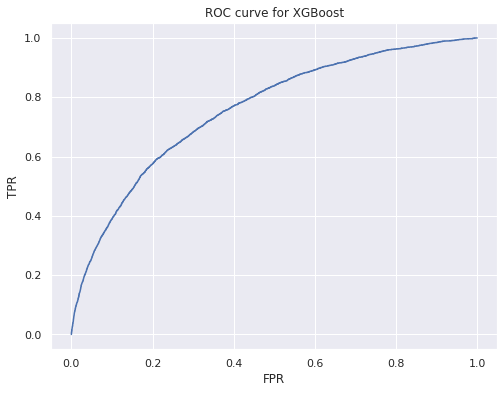

In [281]:
from sklearn import metrics
train_acc = model_xgb.score(X_train, y_train)
validAcc  = model_xgb.score(X_valid, y_valid)
testAcc  = model_xgb.score(X_test, y_test)
    
predictions = model_xgb.predict_proba(X_test)
print ("Score:",roc_auc_score(y_test, predictions[:,1]))
fpr, tpr, _ = metrics.roc_curve(y_test, predictions[:,1])
plt.figure(figsize=(8,6))
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for XGBoost')
plt.show()

<Figure size 1440x720 with 0 Axes>

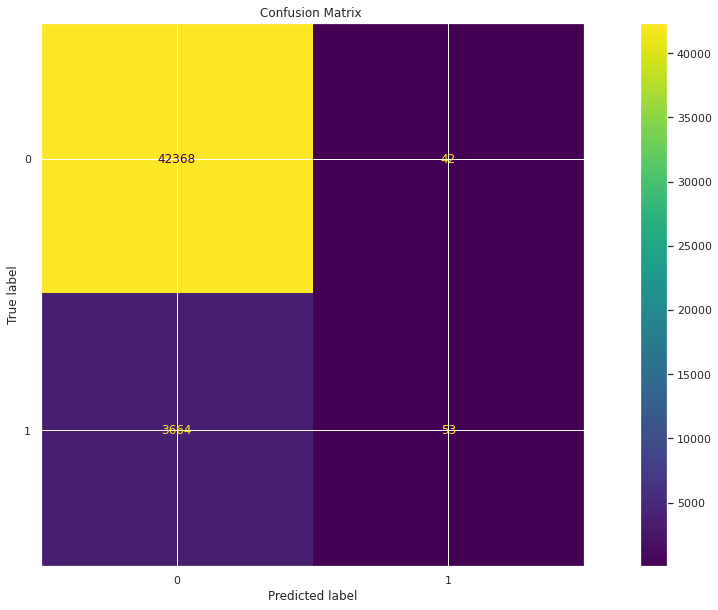

In [282]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
plt.clf()
plot_confusion_matrix(random_search,X_test, y_test)
plt.title('Confusion Matrix ')
plt.show()

### Handling Class Imbalance

In [283]:
print(f"X train shape: {X_train.shape}")
print(f"X validation shape: {X_valid.shape}")
print(f"X test shape: {X_test.shape}")
# print(f"X X_kaggle_test shape: {X_kaggle_test.shape}")

X train shape: (209107, 82)
X validation shape: (52277, 82)
X test shape: (46127, 82)


In [284]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data.head()

EXT_SOURCE_3  EXT_SOURCE_2  EXT_SOURCE_1  \
35339       0.643026      0.692395       0.00000   
82049       0.321735      0.261270       0.00000   
226288      0.574447      0.651296       0.00000   
265467      0.689479      0.605375       0.00000   
175195      0.315472      0.517576       0.24202   

        cc_CNT_DRAWINGS_ATM_CURRENT_sum  cc_CNT_DRAWINGS_ATM_CURRENT_max  \
35339                               0.0                              0.0   
82049                               0.0                              0.0   
226288                              0.4                              0.4   
265467                              0.0                              0.0   
175195                              0.0                              0.0   

        cc_CNT_DRAWINGS_ATM_CURRENT_min  cc_CNT_DRAWINGS_ATM_CURRENT  \
35339                               0.0                          0.0   
82049                               0.0                          0.0   
226288                              0.4                          0.4   
265467                              0.0                          0.0   
175195                              0.0                          0.0   

        cc_CNT_DRAWINGS_ATM_CURRENT_mean  bur_DAYS_CREDIT_max  \
35339                                0.0         -1321.500000   
82049                                0.0          -779.000000   
226288                               0.4         -1022.400000   
265467                               0.0         -1171.500000   
175195                               0.0          -444.555556   

        bur_DAYS_CREDIT_mean  ...    ins_DBD  ins_LATE_PAYMENT  \
35339           -1321.500000  ...  10.173913               1.0   
82049            -779.000000  ...   8.000000               1.0   
226288          -1022.400000  ...   5.916667               1.0   
265467          -1171.500000  ...  25.166667               1.0   
175195           -444.555556  ...   0.000000               0.0   

        bur_ENDDATE_DIFF  bur_UPDATE_DIFF  bur_DEBT_PERCENTAGE  \
35339         286.347222       -69.477778             1.771082   
82049          -2.500000        -9.000000             0.000000   
226288        499.800000       123.000000             2.179904   
265467        610.500000       582.000000             0.000000   
175195       4003.666667      3917.055556            57.727881   

        bur_DEBT_CREDIT_DIFF  bur_CREDIT_TO_ANNUITY_RATIO  \
35339              98897.301                    33.022962   
82049                  0.000                     8.241971   
226288             45834.300                     0.000000   
265467            197115.750                     0.000000   
175195            177927.000                     0.000000   

        bur_DEBT_TO_ANNUITY_RATIO  bur_CREDIT_OVERDUE_DIFF  TARGET  
35339                   18.645637              227155.0455       0  
82049                    0.000000              150135.7500       0  
226288                   0.000000               84680.1000       0  
265467                   0.000000              197115.7500       0  
175195                   0.000000              181063.5000       0  

[5 rows x 83 columns]

In [285]:
from sklearn.utils import resample

data_0 = train_data[train_data.TARGET==0]
data_1 = train_data[train_data.TARGET==1]
default_sampled_data = resample(data_1,replace=True, n_samples=len(data_0),random_state=42) 
train_data = pd.concat([data_0, default_sampled_data])
train_data.TARGET.value_counts()

1    192370
0    192370
Name: TARGET, dtype: int64

In [286]:
y_train = train_data['TARGET']
X_train = train_data.drop(columns = 'TARGET')

In [287]:
print(y_train.shape)
print(X_train.shape)

(384740,)
(384740, 82)


In [288]:
%%time 
np.random.seed(42)
full_pipeline_with_predictor_xgb = Pipeline([
        ("preparation", data_pipeline),
        ("xgboost", xgboost.XGBClassifier(min_child_weight = 5,max_depth=5,learning_rate=0.1))
    ])
model_xgb = full_pipeline_with_predictor_xgb.fit(X_train, y_train)


[02:57:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 9min 38s, sys: 2 s, total: 9min 40s
Wall time: 43.7 s


In [289]:
np.round(accuracy_score(y_train, model_xgb.predict(X_train)), 3)

0.722

In [290]:
roc_auc_score(y_train, model_xgb.predict_proba(X_train)[:, 1])

0.7961919179990539

In [291]:
f1_score(y_train, model_xgb.predict(X_train), average='weighted')

0.7215334061064205

In [292]:
exp_name = f"XGBoost_with_class_imbalanced_handled"
expLog2.loc[len(expLog2)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_xgb.predict(X_train)), 
                accuracy_score(y_valid, model_xgb.predict(X_valid)),
                accuracy_score(y_test, model_xgb.predict(X_test)),
                roc_auc_score(y_train, model_xgb.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model_xgb.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_xgb.predict_proba(X_test)[:, 1]),
                f1_score(y_train, model_xgb.predict(X_train), average='weighted'),
                f1_score(y_valid, model_xgb.predict(X_valid), average='weighted'),
                f1_score(y_test, model_xgb.predict(X_test), average='weighted')],
    4)) 


In [293]:
expLog2

exp_name  Train Acc  Valid Acc  Test  Acc  \
0      XGBoost_features_with_50_features     0.9207     0.9169     0.9196   
1  XGBoost_with_class_imbalanced_handled     0.7215     0.7073     0.7068   

   Train AUC  Valid AUC  Test  AUC  Train F1  Valid F1  Test F1  
0     0.7884      0.758     0.7591    0.8846    0.8792   0.8831  
1     0.7962      0.758     0.7599    0.7215    0.7714   0.7726

Score: 0.7598666076453535


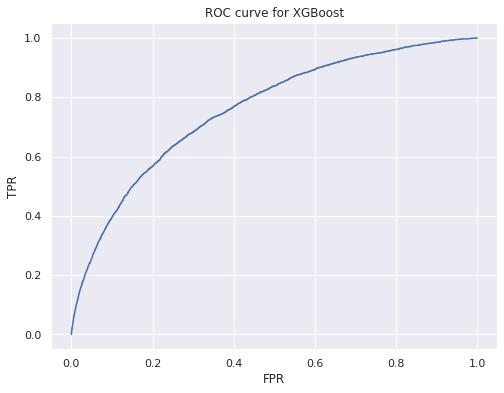

In [294]:
from sklearn import metrics
train_acc = model_xgb.score(X_train, y_train)
validAcc  = model_xgb.score(X_valid, y_valid)
testAcc  = model_xgb.score(X_test, y_test)
    
predictions = model_xgb.predict_proba(X_test)
print ("Score:",roc_auc_score(y_test, predictions[:,1]))
fpr, tpr, _ = metrics.roc_curve(y_test, predictions[:,1])
plt.figure(figsize=(8,6))
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for XGBoost')
plt.show()

<Figure size 1440x720 with 0 Axes>

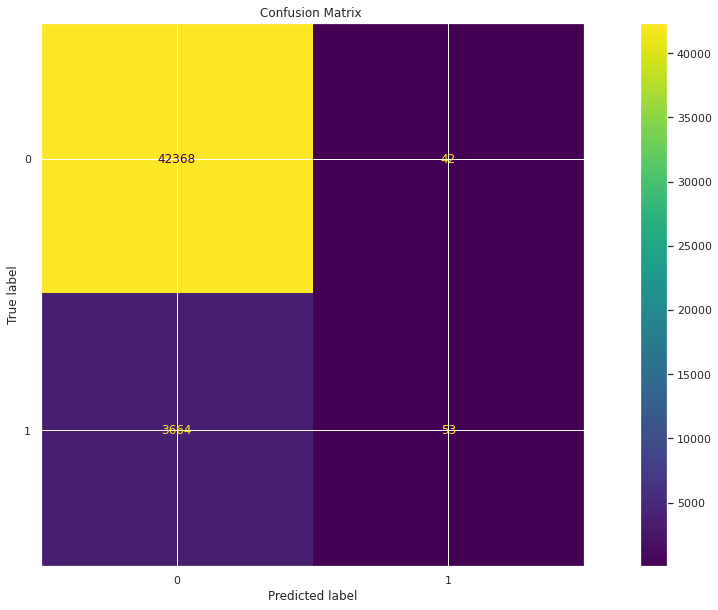

In [295]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
plt.clf()
plot_confusion_matrix(random_search,X_test, y_test)
plt.title('Confusion Matrix ')
plt.show()

### Selecting top 25 correlated features

In [296]:
features_top25 =list(corr_num.index[1:26])
features_top25

['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'EXT_SOURCE_1',
 'cc_LIMIT_USAGE',
 'cc_CNT_DRAWINGS_ATM_CURRENT_sum',
 'cc_CNT_DRAWINGS_ATM_CURRENT_max',
 'cc_CNT_DRAWINGS_ATM_CURRENT_min',
 'cc_CNT_DRAWINGS_ATM_CURRENT',
 'cc_CNT_DRAWINGS_ATM_CURRENT_mean',
 'bur_DAYS_CREDIT_max',
 'bur_DAYS_CREDIT_mean',
 'bur_DAYS_CREDIT_sum',
 'bur_DAYS_CREDIT_min',
 'bur_DAYS_CREDIT',
 'cc_AMT_BALANCE_min',
 'cc_AMT_BALANCE_max',
 'cc_AMT_BALANCE_mean',
 'cc_AMT_BALANCE_sum',
 'cc_AMT_BALANCE',
 'cc_AMT_TOTAL_RECEIVABLE',
 'cc_AMT_TOTAL_RECEIVABLE_max',
 'cc_AMT_TOTAL_RECEIVABLE_sum',
 'cc_AMT_TOTAL_RECEIVABLE_mean',
 'cc_AMT_TOTAL_RECEIVABLE_min',
 'cc_AMT_RECIVABLE_max']

In [297]:
app_train_top25 = app_train_df[features_top25]

In [298]:
engg_features=['pa_APPLICATION_CREDIT_DIFF','pa_APPLICATION_CREDIT_RATIO','pa_DOWN_PAYMENT_TO_CREDIT','cc_LIMIT_USAGE','cc_LATE_PAYMENT','cc_DRAWING_LIMIT_RATIO','pos_LATE_PAYMENT','ins_PAID_OVER_AMOUNT','ins_DBD','ins_LATE_PAYMENT','bur_ENDDATE_DIFF','bur_UPDATE_DIFF','bur_DEBT_PERCENTAGE','bur_DEBT_CREDIT_DIFF','bur_CREDIT_TO_ANNUITY_RATIO','bur_DEBT_TO_ANNUITY_RATIO','bur_CREDIT_OVERDUE_DIFF']

In [299]:
catvars=list(app_train_df.loc[:, ~app_train_df.columns.isin(engg_features)].select_dtypes(include="object").columns.values)

In [300]:
len(catvars)

16

In [301]:
numvars=list(app_train_df.loc[:, ~app_train_df.columns.isin(engg_features)]._get_numeric_data().columns)

In [302]:
len(numvars)

1355

In [303]:
app_df_final2=app_train_df[features_top25+['TARGET']+catvars+engg_features]

In [304]:
app_df_final2

EXT_SOURCE_3  EXT_SOURCE_2  EXT_SOURCE_1  cc_LIMIT_USAGE  \
0           0.139376      0.262949      0.083037             NaN   
1                NaN      0.622246      0.311267             NaN   
2           0.729567      0.555912           NaN             NaN   
3                NaN      0.650442           NaN             0.0   
4                NaN      0.322738           NaN             NaN   
...              ...           ...           ...             ...   
307506           NaN      0.681632      0.145570             NaN   
307507           NaN      0.115992           NaN             NaN   
307508      0.218859      0.535722      0.744026             NaN   
307509      0.661024      0.514163           NaN             NaN   
307510      0.113922      0.708569      0.734460             NaN   

        cc_CNT_DRAWINGS_ATM_CURRENT_sum  cc_CNT_DRAWINGS_ATM_CURRENT_max  \
0                                   NaN                              NaN   
1                                   NaN                              NaN   
2                                   NaN                              NaN   
3                                   0.0                              NaN   
4                                   NaN                              NaN   
...                                 ...                              ...   
307506                              NaN                              NaN   
307507                              NaN                              NaN   
307508                              NaN                              NaN   
307509                              NaN                              NaN   
307510                              NaN                              NaN   

        cc_CNT_DRAWINGS_ATM_CURRENT_min  cc_CNT_DRAWINGS_ATM_CURRENT  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   
...                                 ...                          ...   
307506                              NaN                          NaN   
307507                              NaN                          NaN   
307508                              NaN                          NaN   
307509                              NaN                          NaN   
307510                              NaN                          NaN   

        cc_CNT_DRAWINGS_ATM_CURRENT_mean  bur_DAYS_CREDIT_max  ...  \
0                                    NaN          -874.000000  ...   
1                                    NaN         -1400.750000  ...   
2                                    NaN          -867.000000  ...   
3                                    NaN                  NaN  ...   
4                                    NaN         -1149.000000  ...   
...                                  ...                  ...  ...   
307506                               NaN                  NaN  ...   
307507                               NaN                  NaN  ...   
307508                               NaN          -867.500000  ...   
307509                               NaN         -1104.000000  ...   
307510                               NaN         -1089.454545  ...   

        ins_PAID_OVER_AMOUNT    ins_DBD  ins_LATE_PAYMENT  bur_ENDDATE_DIFF  \
0                   0.000000  20.421053               1.0        348.500000   
1                   0.000000   7.160000               1.0        552.833333   
2                   0.000000   7.666667               1.0         44.000000   
3                   0.000000  19.375000               1.0               NaN   
4                -452.384318   3.636364               1.0          0.000000   
...                      ...        ...               ...               ...   
307506             

In [305]:
app_df_final2 = app_df_final2.loc[:, ~app_df_final2.columns[::-1].duplicated()[::-1]]

In [306]:
# app_df_final.T.drop_duplicates()

### Model Pipeline LR with top 50 features

In [307]:
y = app_df_final2['TARGET']
print(y.shape)
X = app_df_final2
print(X.shape)

(307511,)
(307511, 58)


In [308]:
X["TARGET"]

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

In [309]:
X = X.drop(["TARGET"],axis=1)
print(X.shape)

(307511, 57)


In [310]:
X.head()

EXT_SOURCE_3  EXT_SOURCE_2  EXT_SOURCE_1  cc_CNT_DRAWINGS_ATM_CURRENT_sum  \
0      0.139376      0.262949      0.083037                              NaN   
1           NaN      0.622246      0.311267                              NaN   
2      0.729567      0.555912           NaN                              NaN   
3           NaN      0.650442           NaN                              0.0   
4           NaN      0.322738           NaN                              NaN   

   cc_CNT_DRAWINGS_ATM_CURRENT_max  cc_CNT_DRAWINGS_ATM_CURRENT_min  \
0                              NaN                              NaN   
1                              NaN                              NaN   
2                              NaN                              NaN   
3                              NaN                              NaN   
4                              NaN                              NaN   

   cc_CNT_DRAWINGS_ATM_CURRENT  cc_CNT_DRAWINGS_ATM_CURRENT_mean  \
0                          NaN                               NaN   
1                          NaN                               NaN   
2                          NaN                               NaN   
3                          NaN                               NaN   
4                          NaN                               NaN   

   bur_DAYS_CREDIT_max  bur_DAYS_CREDIT_mean  ...  ins_PAID_OVER_AMOUNT  \
0              -874.00               -874.00  ...              0.000000   
1             -1400.75              -1400.75  ...              0.000000   
2              -867.00               -867.00  ...              0.000000   
3                  NaN                   NaN  ...              0.000000   
4             -1149.00              -1149.00  ...           -452.384318   

     ins_DBD  ins_LATE_PAYMENT  bur_ENDDATE_DIFF  bur_UPDATE_DIFF  \
0  20.421053               1.0        348.500000          150.875   
1   7.160000               1.0        552.833333          271.500   
2   7.666667               1.0         44.000000           43.500   
3  19.375000               1.0               NaN              NaN   
4   3.636364               1.0          0.000000            0.000   

   bur_DEBT_PERCENTAGE  bur_DEBT_CREDIT_DIFF  bur_CREDIT_TO_ANNUITY_RATIO  \
0             2.199762          58975.745625                          inf   
1                  inf         254350.125000                          NaN   
2                  inf          94518.900000                          NaN   
3                  NaN                   NaN                          NaN   
4                  inf         146250.000000                          NaN   

   bur_DEBT_TO_ANNUITY_RATIO  bur_CREDIT_OVERDUE_DIFF  
0                        inf            108131.945625  
1                        NaN            254350.125000  
2                        NaN             94518.900000  
3                        NaN                      NaN  
4                        NaN            146250.000000  

[5 rows x 57 columns]

In [311]:
X.isnull().sum()

EXT_SOURCE_3                         60965
EXT_SOURCE_2                           660
EXT_SOURCE_1                        173378
cc_CNT_DRAWINGS_ATM_CURRENT_sum     221476
cc_CNT_DRAWINGS_ATM_CURRENT_max     247192
cc_CNT_DRAWINGS_ATM_CURRENT_min     247192
cc_CNT_DRAWINGS_ATM_CURRENT         247192
cc_CNT_DRAWINGS_ATM_CURRENT_mean    247192
bur_DAYS_CREDIT_max                  44020
bur_DAYS_CREDIT_mean                 44020
bur_DAYS_CREDIT_sum                  44020
bur_DAYS_CREDIT_min                  44020
bur_DAYS_CREDIT                      44020
cc_AMT_BALANCE_min                  221476
cc_AMT_BALANCE_max                  221476
cc_AMT_BALANCE_mean                 221476
cc_AMT_BALANCE_sum                  221476
cc_AMT_BALANCE                      221476
cc_AMT_TOTAL_RECEIVABLE             221476
cc_AMT_TOTAL_RECEIVABLE_max         221476
cc_AMT_TOTAL_RECEIVABLE_sum         221476
cc_AMT_TOTAL_RECEIVABLE_mean        221476
cc_AMT_TOTAL_RECEIVABLE_min         221476
cc_AMT_RECI

In [312]:
numerical_features = X.select_dtypes(include = ['int64','float64']).columns
len(numerical_features)

41

In [313]:
cat_features = X.select_dtypes(include = ['object']).columns
len(cat_features)

16

In [314]:
X[numerical_features] = X[numerical_features].replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [315]:
X[cat_features] = X[cat_features].replace((np.inf, -np.inf, np.nan), 'NA').reset_index(drop=True)

In [316]:
cat_features.tolist()

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [317]:
X.isnull().sum()

EXT_SOURCE_3                        0
EXT_SOURCE_2                        0
EXT_SOURCE_1                        0
cc_CNT_DRAWINGS_ATM_CURRENT_sum     0
cc_CNT_DRAWINGS_ATM_CURRENT_max     0
cc_CNT_DRAWINGS_ATM_CURRENT_min     0
cc_CNT_DRAWINGS_ATM_CURRENT         0
cc_CNT_DRAWINGS_ATM_CURRENT_mean    0
bur_DAYS_CREDIT_max                 0
bur_DAYS_CREDIT_mean                0
bur_DAYS_CREDIT_sum                 0
bur_DAYS_CREDIT_min                 0
bur_DAYS_CREDIT                     0
cc_AMT_BALANCE_min                  0
cc_AMT_BALANCE_max                  0
cc_AMT_BALANCE_mean                 0
cc_AMT_BALANCE_sum                  0
cc_AMT_BALANCE                      0
cc_AMT_TOTAL_RECEIVABLE             0
cc_AMT_TOTAL_RECEIVABLE_max         0
cc_AMT_TOTAL_RECEIVABLE_sum         0
cc_AMT_TOTAL_RECEIVABLE_mean        0
cc_AMT_TOTAL_RECEIVABLE_min         0
cc_AMT_RECIVABLE_max                0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR

### Model Pipeline XGBoost with top 25 features

In [318]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split  # sklearn.cross_validation in old versions
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score



# Split the data into training and validationa and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")

# Identify the numeric features we wish to consider. 
numerical_features = X.select_dtypes(include = ['int64','float64']).columns
numerical_features = numerical_features.tolist()

num_pipeline =Pipeline([('std',StandardScaler()),
        ('imputer', SimpleImputer(strategy='mean'))
                       ])

categorical_features = X.select_dtypes(include = ['object']).columns
categorical_features = categorical_features.tolist()


cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

features = numerical_features + categorical_features

data_pipeline = ColumnTransformer([
       ("num_pipeline", num_pipeline, numerical_features),
       ("cat_pipeline", cat_pipeline, categorical_features)],
        remainder='drop',
        n_jobs=-1
    )


data_pipeline.fit(X_train[features])
data_pipeline.fit(X_valid[features])

#transforming the X train, valid, and test sets.
X_train_transformed = data_pipeline.transform(X_train[features])
X_valid_transformed = data_pipeline.transform(X_valid[features])
X_test_transformed = data_pipeline.transform(X_test[features])

column_names = numerical_features  + list(data_pipeline.transformers_[1][1].named_steps["ohe"].get_feature_names(categorical_features))
# display(pd.DataFrame([X_train_transformed]).head())
number_of_inputs = X_train_transformed.shape[1]

X train           shape: (209107, 57)
X validation      shape: (52277, 57)
X test            shape: (46127, 57)


In [319]:
%%time 
np.random.seed(42)
full_pipeline_with_predictor_xgb = Pipeline([
        ("preparation", data_pipeline),
        ("xgboost", xgboost.XGBClassifier(min_child_weight = 5,max_depth=5,learning_rate=0.1))
    ])
model_xgb = full_pipeline_with_predictor_xgb.fit(X_train, y_train)


[03:03:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 5min 6s, sys: 933 ms, total: 5min 7s
Wall time: 23.2 s


### Evaluation metrics

In [320]:
def pct(x):
    return round(100*x,3)

In [321]:
from sklearn.metrics import accuracy_score
np.round(accuracy_score(y_train, model_xgb.predict(X_train)), 3)

0.921

In [322]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, model_xgb.predict_proba(X_train)[:, 1])

0.7826075294067529

In [323]:
from sklearn.metrics import f1_score
f1_score(y_train, model_xgb.predict(X_train), average='weighted')

0.8838035166872555

In [324]:
exp_name = f"XGBoost_features_with_25_features"
expLog2.loc[len(expLog2)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_xgb.predict(X_train)), 
                accuracy_score(y_valid, model_xgb.predict(X_valid)),
                accuracy_score(y_test, model_xgb.predict(X_test)),
                roc_auc_score(y_train, model_xgb.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model_xgb.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_xgb.predict_proba(X_test)[:, 1]),
                f1_score(y_train, model_xgb.predict(X_train), average='weighted'),
                f1_score(y_valid, model_xgb.predict(X_valid), average='weighted'),
                f1_score(y_test, model_xgb.predict(X_test), average='weighted')],
    4)) 


In [325]:
expLog2

exp_name  Train Acc  Valid Acc  Test  Acc  \
0      XGBoost_features_with_50_features     0.9207     0.9169     0.9196   
1  XGBoost_with_class_imbalanced_handled     0.7215     0.7073     0.7068   
2      XGBoost_features_with_25_features     0.9205     0.9166     0.9195   

   Train AUC  Valid AUC  Test  AUC  Train F1  Valid F1  Test F1  
0     0.7884     0.7580     0.7591    0.8846    0.8792   0.8831  
1     0.7962     0.7580     0.7599    0.7215    0.7714   0.7726  
2     0.7826     0.7535     0.7551    0.8838    0.8781   0.8823

Score: 0.7551437036394213


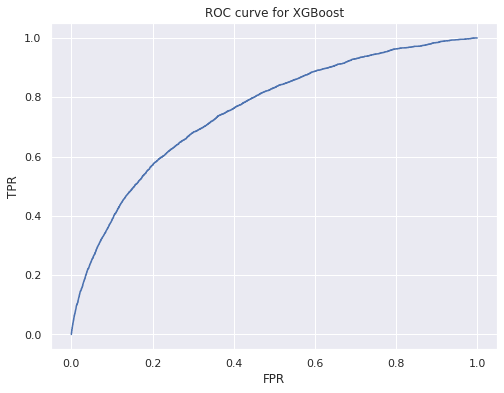

In [326]:
from sklearn import metrics
train_acc = model_xgb.score(X_train, y_train)
validAcc  = model_xgb.score(X_valid, y_valid)
testAcc  = model_xgb.score(X_test, y_test)
    
predictions = model_xgb.predict_proba(X_test)
print ("Score:",roc_auc_score(y_test, predictions[:,1]))
fpr, tpr, _ = metrics.roc_curve(y_test, predictions[:,1])
plt.figure(figsize=(8,6))
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for XGBoost')
plt.show()

### Final Results from our fine tuned model with experiments

In [327]:
expLog2

exp_name  Train Acc  Valid Acc  Test  Acc  \
0      XGBoost_features_with_50_features     0.9207     0.9169     0.9196   
1  XGBoost_with_class_imbalanced_handled     0.7215     0.7073     0.7068   
2      XGBoost_features_with_25_features     0.9205     0.9166     0.9195   

   Train AUC  Valid AUC  Test  AUC  Train F1  Valid F1  Test F1  
0     0.7884     0.7580     0.7591    0.8846    0.8792   0.8831  
1     0.7962     0.7580     0.7599    0.7215    0.7714   0.7726  
2     0.7826     0.7535     0.7551    0.8838    0.8781   0.8823

# Kaggle submission via the command line API

## Submission File Prep

For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

```python 
SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2
etc.
```

In [328]:
X_kaggle_test = app_test_df

In [329]:
numerical_features = X_kaggle_test.select_dtypes(include = ['int64','float64']).columns
len(numerical_features)

1371

In [330]:
cat_features = X_kaggle_test.select_dtypes(include = ['object']).columns
len(cat_features)

16

In [331]:
X_kaggle_test[numerical_features] = X_kaggle_test[numerical_features].replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [332]:
X_kaggle_test[cat_features] = X_kaggle_test[cat_features].replace((np.inf, -np.inf, np.nan), 'NA').reset_index(drop=True)

In [357]:
test_class_scores = model_xgb.predict_proba(X_kaggle_test)[:, 1]

In [358]:
test_class_scores[0:10]

array([0.038862  , 0.15876238, 0.1091873 , 0.03601242, 0.11429568,
       0.08365726, 0.01498645, 0.04870316, 0.01891618, 0.13330118],
      dtype=float32)

In [359]:
# Submission dataframe
submit_df = datasets["application_test"][['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores

submit_df.head()

SK_ID_CURR    TARGET
0      100001  0.038862
1      100005  0.158762
2      100013  0.109187
3      100028  0.036012
4      100038  0.114296

In [361]:
submit_df.to_csv("submission.csv",index=False)

# Kaggle submission via the command line API

In [362]:
!pip install kaggle

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [363]:
! kaggle competitions submit -c home-credit-default-risk -f submission.csv -m "baseline submission"

100%|████████████████████████████████████████| 876k/876k [00:00<00:00, 1.21MB/s]
Successfully submitted to Home Credit Default Risk

## report submission

Click on this [link](https://www.kaggle.com/c/home-credit-default-risk/submissions?sortBy=date&group=all&page=1)

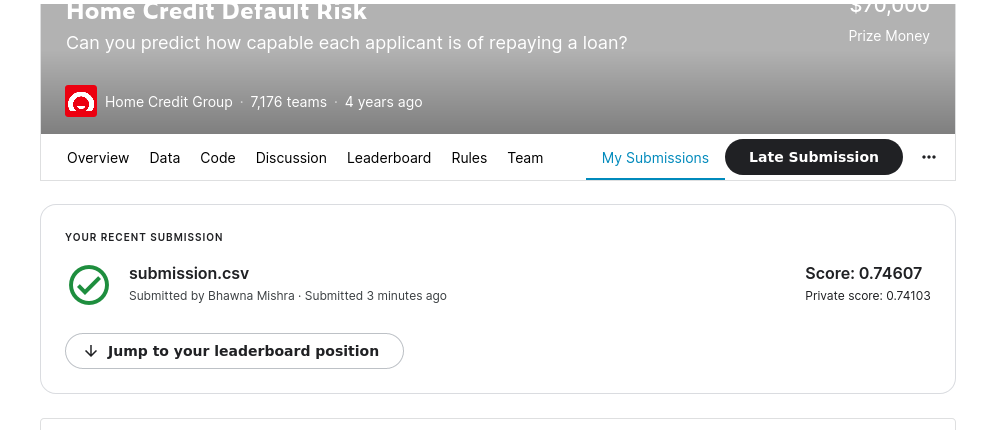

# Phase3

# Dataset and how to download


## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

## Data files overview
There are 7 different sources of data:

* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

## Downloading the files via Kaggle API

Create a base directory:

```bash
DATA_DIR = "../../../Data/home-credit-default-risk"   #same level as course repo in the data directory
```

Please download the project data files and data dictionary and unzip them using either of the following approaches:

1. Click on the `Download` button on the following [Data Webpage](https://www.kaggle.com/c/home-credit-default-risk/data) and unzip the  zip file to the `BASE_DIR`
2. If you plan to use the Kaggle API, please use the following steps.


In [1]:
DATA_DIR = "home-credit-default-risk/"   #same level as course repo in the data directory
#DATA_DIR = os.path.join('./ddddd/')
#!mkdir $DATA_DIR

In [2]:
!ls -l $DATA_DIR

total 3326848
-rw-rw-r-- 1 bhmish bhmish     37383 Apr 12 15:43 HomeCredit_columns_description.csv
-rw-rw-r-- 1 bhmish bhmish 392703158 Apr 12 15:49 POS_CASH_balance.csv
-rw-rw-r-- 1 bhmish bhmish  26567651 Apr 12 15:49 application_test.csv
-rw-rw-r-- 1 bhmish bhmish 166133370 Apr 12 15:50 application_train.csv
-rw-rw-r-- 1 bhmish bhmish 170016717 Apr 12 15:50 bureau.csv
-rw-rw-r-- 1 bhmish bhmish 375592889 Apr 12 15:50 bureau_balance.csv
-rw-rw-r-- 1 bhmish bhmish 424582605 Apr 12 15:50 credit_card_balance.csv
-rw-rw-r-- 1 bhmish bhmish 721616255 Apr 18 17:38 home-credit-default-risk.zip
-rw-rw-r-- 1 bhmish bhmish 723118349 Apr 12 15:51 installments_payments.csv
-rw-rw-r-- 1 bhmish bhmish 404973293 Apr 12 15:51 previous_application.csv
-rw-rw-r-- 1 bhmish bhmish    536202 Apr 12 15:48 sample_submission.csv


### Imports

In [3]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [4]:
unzippingReq = False
if unzippingReq: #please modify this code 
    zip_ref = zipfile.ZipFile('application_train.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('application_test.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('bureau_balance.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('bureau.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('credit_card_balance.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('installments_payments.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('POS_CASH_balance.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('previous_application.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()

## Data files overview
### Data Dictionary

As part of the data download comes a  Data Dictionary. It named `HomeCredit_columns_description.csv`

### Application train

In [5]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily
ds_name = ('application_train')
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

datasets['application_train'].shape

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

(307511, 122)

### Application test


* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.


In [6]:
ds_name = 'application_test'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

### The Other datasets

* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [7]:
%%time
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)


application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

CPU times: user 33.2 s, sys: 5.06 s, total: 38.3 s
Wall time: 38.5 s


In [8]:
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')


dataset application_train       : [    307,511, 122]
dataset application_test        : [     48,744, 121]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


In [9]:
appsDF = datasets["previous_application"]

In [10]:
appsDF.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

### Multiple condition expressions in Pandas
So far, both our boolean selections have involved a single condition. You can, of course, have as many conditions as you would like. To do so, you will need to combine your boolean expressions using the three logical operators and, or and not.

Use &, | , ~
Although Python uses the syntax and, or, and not, these will not work when testing multiple conditions with pandas. The details of why are explained [here](https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-39e811c81a0c).

You must use the following operators with pandas:

* & for and
* | for or
* ~ for not

In [11]:
appsDF[0:50][(appsDF["SK_ID_CURR"]==175704)]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
6     2315218      175704         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
6         0.0               NaN              NaN                    TUESDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
6                       11  ...                  XNA          NaN   

   NAME_YIELD_GROUP  PRODUCT_COMBINATION  DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
6               XNA                 Cash                 NaN            NaN   

  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
6                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
6                       NaN  

[1 rows x 37 columns]

In [12]:
appsDF[0:50][(appsDF["SK_ID_CURR"]==175704) & ~(appsDF["AMT_CREDIT"]==1.0)]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
6     2315218      175704         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
6         0.0               NaN              NaN                    TUESDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
6                       11  ...                  XNA          NaN   

   NAME_YIELD_GROUP  PRODUCT_COMBINATION  DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
6               XNA                 Cash                 NaN            NaN   

  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
6                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
6                       NaN  

[1 rows x 37 columns]

## Missing values in prevApps


In [13]:
appsDF.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [14]:
appsDF.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

## Feature Aggregation Class for Aggregation using Pipeline


In [15]:
class FeatureAggregator(BaseEstimator,TransformerMixin):
    def __init__(self,dataset,features):
        self.features=features
        self.dataset=dataset
        self.agg_ops=['min','max','mean','sum']
  
    def fit(self,X,y=None):
        return self
  
    def transform(self,X,y=None):
        result=X.groupby(['SK_ID_CURR']).agg(self.agg_ops)
        result.columns=["_".join(x) for x in result.columns.ravel()]
        result=result.reset_index(level=["SK_ID_CURR"])
        return result

In [16]:
# Function used to rename
def rename(df,name):
    df.columns=pd.Index([name + "_"+ col for col in list(df.columns)])
    df.rename(columns={name+"_SK_ID_CURR":"SK_ID_CURR"},inplace=True)
    
def ohe(df):
    cat_df=df.select_dtypes(include='object')
    cat_cols=cat_df.columns
    df=pd.get_dummies(df,columns=cat_cols,dummy_na=False)
    return df

### Feature engineering on Bureau dataset

In [17]:
datasets.keys()

dict_keys(['application_train', 'application_test', 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 'previous_application', 'POS_CASH_balance'])

In [18]:
def correlation(df):
    appsDF = datasets["application_train"]
    secondary_df = datasets[df]
    corr_matrix = pd.concat([appsDF.TARGET, secondary_df], axis=1).corr().filter(secondary_df.columns).filter(appsDF.columns, axis=0).abs()
    return corr_matrix

In [19]:
df_name = 'bureau'
corr_matrix = correlation(df_name)
print(f"Correlation of the {df_name} with Application :")
corr_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the bureau with Application :


DAYS_CREDIT_UPDATE        0.002159
DAYS_CREDIT_ENDDATE       0.002048
CREDIT_DAY_OVERDUE        0.001815
SK_ID_BUREAU              0.001550
AMT_CREDIT_SUM_OVERDUE    0.001464
DAYS_CREDIT               0.001443
SK_ID_CURR                0.001070
AMT_CREDIT_SUM_DEBT       0.000946
AMT_CREDIT_SUM_LIMIT      0.000558
CNT_CREDIT_PROLONG        0.000495
AMT_CREDIT_MAX_OVERDUE    0.000389
AMT_CREDIT_SUM            0.000218
DAYS_ENDDATE_FACT         0.000203
AMT_ANNUITY               0.000189
Name: TARGET, dtype: float64

In [20]:
#Features considered for bureau dataset
bureau_features = ['AMT_ANNUITY', 'AMT_CREDIT_SUM','DAYS_CREDIT', 'DAYS_CREDIT_UPDATE', 'DAYS_CREDIT_ENDDATE','AMT_CREDIT_SUM_OVERDUE','CREDIT_DAY_OVERDUE'
                   ,'AMT_CREDIT_SUM_DEBT','AMT_CREDIT_SUM_LIMIT','AMT_CREDIT_MAX_OVERDUE'
                  ]
bureau_df = datasets["bureau"]
bureau_df = ohe(bureau_df)

In [21]:
bureau_df=bureau_df.groupby(["SK_ID_CURR"],as_index=False).agg("mean")
bureau_pipeline=Pipeline([
                       ('bur_aggregator',FeatureAggregator(bureau_df,bureau_features))
                       ])

In [22]:
bureau_agg=bureau_pipeline.transform(bureau_df)
bureau_df=bureau_df.merge(bureau_agg,how='left',on='SK_ID_CURR')
rename(bureau_df,"bur")

In [23]:
bureau_df.head()

SK_ID_CURR  bur_SK_ID_BUREAU  bur_DAYS_CREDIT  bur_CREDIT_DAY_OVERDUE  \
0      100001       5896633.000      -735.000000                     0.0   
1      100002       6153272.125      -874.000000                     0.0   
2      100003       5885878.500     -1400.750000                     0.0   
3      100004       6829133.500      -867.000000                     0.0   
4      100005       6735201.000      -190.666667                     0.0   

   bur_DAYS_CREDIT_ENDDATE  bur_DAYS_ENDDATE_FACT  bur_AMT_CREDIT_MAX_OVERDUE  \
0                82.428571            -825.500000                         NaN   
1              -349.000000            -697.500000                    1681.029   
2              -544.500000           -1097.333333                       0.000   
3              -488.500000            -532.500000                       0.000   
4               439.333333            -123.000000                       0.000   

   bur_CNT_CREDIT_PROLONG  bur_AMT_CREDIT_SUM  bur_AMT_CREDIT_SUM_DEBT  ...  \
0                     0.0       207623.571429             85240.928571  ...   
1                     0.0       108131.945625             49156.200000  ...   
2                     0.0       254350.125000                 0.000000  ...   
3                     0.0        94518.900000                 0.000000  ...   
4                     0.0       219042.000000            189469.500000  ...   

   bur_CREDIT_TYPE_Mortgage_mean  bur_CREDIT_TYPE_Mortgage_sum  \
0                            0.0                           0.0   
1                            0.0                           0.0   
2                            0.0                           0.0   
3                            0.0                           0.0   
4                            0.0                           0.0   

   bur_CREDIT_TYPE_Real estate loan_min  bur_CREDIT_TYPE_Real estate loan_max  \
0                                   0.0                                   0.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   
3                                   0.0                                   0.0   
4                                   0.0                                   0.0   

   bur_CREDIT_TYPE_Real estate loan_mean  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   bur_CREDIT_TYPE_Real estate loan_sum  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   bur_CREDIT_TYPE_Unknown type of loan_min  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   bur_CREDIT_TYPE_Unknown type of loan_max  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   bur_CREDIT_TYPE_Unknown type of loan_mean  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   bur_CREDIT_TYPE_Unknown type of loan_sum  
0                                       0.0  
1                                       0.0  
2                                       0.0  
3                                       0.0  
4                                       0.0  

[5 rows x 181 columns]

In [24]:
bureau_df['bur_ENDDATE_DIFF'] = bureau_df['bur_DAYS_CREDIT_ENDDATE'] - bureau_df['bur_DAYS_ENDDATE_FACT']
bureau_df['bur_UPDATE_DIFF'] = bureau_df['bur_DAYS_CREDIT_ENDDATE'] - bureau_df['bur_DAYS_CREDIT_UPDATE']
bureau_df['bur_DEBT_PERCENTAGE'] = bureau_df['bur_AMT_CREDIT_SUM'] / bureau_df['bur_AMT_CREDIT_SUM_DEBT']
bureau_df['bur_DEBT_CREDIT_DIFF'] = bureau_df['bur_AMT_CREDIT_SUM'] - bureau_df['bur_AMT_CREDIT_SUM_DEBT']
bureau_df['bur_CREDIT_TO_ANNUITY_RATIO'] = bureau_df['bur_AMT_CREDIT_SUM'] / bureau_df['bur_AMT_ANNUITY']
bureau_df['bur_DEBT_TO_ANNUITY_RATIO'] = bureau_df['bur_AMT_CREDIT_SUM_DEBT'] / bureau_df['bur_AMT_ANNUITY']
bureau_df['bur_CREDIT_OVERDUE_DIFF'] = bureau_df['bur_AMT_CREDIT_SUM'] - bureau_df['bur_AMT_CREDIT_SUM_OVERDUE']

In [25]:
display(bureau_df.shape)
bureau_df.head()

(305811, 188)

SK_ID_CURR  bur_SK_ID_BUREAU  bur_DAYS_CREDIT  bur_CREDIT_DAY_OVERDUE  \
0      100001       5896633.000      -735.000000                     0.0   
1      100002       6153272.125      -874.000000                     0.0   
2      100003       5885878.500     -1400.750000                     0.0   
3      100004       6829133.500      -867.000000                     0.0   
4      100005       6735201.000      -190.666667                     0.0   

   bur_DAYS_CREDIT_ENDDATE  bur_DAYS_ENDDATE_FACT  bur_AMT_CREDIT_MAX_OVERDUE  \
0                82.428571            -825.500000                         NaN   
1              -349.000000            -697.500000                    1681.029   
2              -544.500000           -1097.333333                       0.000   
3              -488.500000            -532.500000                       0.000   
4               439.333333            -123.000000                       0.000   

   bur_CNT_CREDIT_PROLONG  bur_AMT_CREDIT_SUM  bur_AMT_CREDIT_SUM_DEBT  ...  \
0                     0.0       207623.571429             85240.928571  ...   
1                     0.0       108131.945625             49156.200000  ...   
2                     0.0       254350.125000                 0.000000  ...   
3                     0.0        94518.900000                 0.000000  ...   
4                     0.0       219042.000000            189469.500000  ...   

   bur_CREDIT_TYPE_Unknown type of loan_max  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   bur_CREDIT_TYPE_Unknown type of loan_mean  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   bur_CREDIT_TYPE_Unknown type of loan_sum  bur_ENDDATE_DIFF  \
0                                       0.0        907.928571   
1                                       0.0        348.500000   
2                                       0.0        552.833333   
3                                       0.0         44.000000   
4                                       0.0        562.333333   

   bur_UPDATE_DIFF  bur_DEBT_PERCENTAGE  bur_DEBT_CREDIT_DIFF  \
0       175.571429             2.435726         122382.642857   
1       150.875000             2.199762          58975.745625   
2       271.500000                  inf         254350.125000   
3        43.500000                  inf          94518.900000   
4       493.666667             1.156081          29572.500000   

   bur_CREDIT_TO_ANNUITY_RATIO  bur_DEBT_TO_ANNUITY_RATIO  \
0                    58.562103                  24.042974   
1                          inf                        inf   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                   154.200634                 133.382260   

   bur_CREDIT_OVERDUE_DIFF  
0            207623.571429  
1            108131.945625  
2            254350.125000  
3             94518.900000  
4            219042.000000  

[5 rows x 188 columns]

#### Joining the Bureau with Application train and test

In [26]:
app_train_df=datasets['application_train']
app_test_df=datasets['application_test']

In [27]:
import gc
app_train_df=app_train_df.merge(bureau_df,how='left',on='SK_ID_CURR')
app_test_df=app_test_df.merge(bureau_df,how='left',on='SK_ID_CURR')
gc.collect()


0

In [28]:
print(app_train_df.shape)
print(app_test_df.shape)

(307511, 309)
(48744, 308)


### Feature engineering on Bureau Balance dataset

In [29]:
df_name = 'bureau_balance'
corr_matrix = correlation(df_name)
print(f"Correlation of the {df_name} with Application :")
corr_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the bureau_balance with Application :


MONTHS_BALANCE    0.005262
SK_ID_BUREAU      0.001223
Name: TARGET, dtype: float64

In [30]:
bureau_bal_features = ['MONTHS_BALANCE']
bureau_bal_df = datasets["bureau_balance"]
bureau_bal_df = ohe(bureau_bal_df)

In [31]:
bureau_bal_df = bureau_bal_df.groupby(["SK_ID_BUREAU"],as_index=False).agg("mean")
bureau_bal_df = bureau_bal_df.groupby(["SK_ID_BUREAU"],as_index=False).agg({f"{feature}":["min","max","mean","sum"] for feature in ["MONTHS_BALANCE"]})
bureau_bal_df.columns = ["_".join(x) for x in bureau_bal_df.columns.ravel()]
bureau_bal_df.columns = pd.Index(['bur_bal_'+col for col in list(bureau_bal_df.columns)])

In [32]:
bureau_bal_df.rename(columns={"bur_bal_SK_ID_BUREAU_":"SK_ID_BUREAU"},inplace=True)
bureau_bal_df.rename(columns={"SK_ID_BUREAU":"SK_ID_CURR"},inplace=True)

In [33]:
bureau_bal_df.shape

(817395, 5)

In [34]:
bureau_bal_df.head()

SK_ID_CURR  bur_bal_MONTHS_BALANCE_min  bur_bal_MONTHS_BALANCE_max  \
0     5001709                       -48.0                       -48.0   
1     5001710                       -41.0                       -41.0   
2     5001711                        -1.5                        -1.5   
3     5001712                        -9.0                        -9.0   
4     5001713                       -10.5                       -10.5   

   bur_bal_MONTHS_BALANCE_mean  bur_bal_MONTHS_BALANCE_sum  
0                        -48.0                       -48.0  
1                        -41.0                       -41.0  
2                         -1.5                        -1.5  
3                         -9.0                        -9.0  
4                        -10.5                       -10.5

#### Joining the Bureau with Application train and test

In [35]:
app_train_df=app_train_df.merge(bureau_bal_df,how='left',on='SK_ID_CURR')
app_test_df=app_test_df.merge(bureau_bal_df,how='left',on='SK_ID_CURR')
gc.collect()

0

In [36]:
print(app_train_df.shape)
print(app_test_df.shape)

(307511, 313)
(48744, 312)


### Feature engineering on Credit Card Balance dataset

In [37]:
df_name = 'credit_card_balance'
corr_matrix = correlation(df_name)
print(f"Correlation of the {df_name} with Application :")
corr_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the credit_card_balance with Application :


AMT_DRAWINGS_POS_CURRENT      0.003518
AMT_DRAWINGS_OTHER_CURRENT    0.002672
CNT_DRAWINGS_POS_CURRENT      0.002387
CNT_DRAWINGS_ATM_CURRENT      0.001908
CNT_DRAWINGS_OTHER_CURRENT    0.001833
CNT_DRAWINGS_CURRENT          0.001764
AMT_DRAWINGS_ATM_CURRENT      0.001520
AMT_INST_MIN_REGULARITY       0.001435
AMT_DRAWINGS_CURRENT          0.001419
AMT_PAYMENT_TOTAL_CURRENT     0.001395
AMT_PAYMENT_CURRENT           0.001129
SK_ID_CURR                    0.001086
MONTHS_BALANCE                0.000768
AMT_CREDIT_LIMIT_ACTUAL       0.000515
AMT_BALANCE                   0.000448
SK_ID_PREV                    0.000446
AMT_RECIVABLE                 0.000412
AMT_TOTAL_RECEIVABLE          0.000407
AMT_RECEIVABLE_PRINCIPAL      0.000383
CNT_INSTALMENT_MATURE_CUM     0.000342
SK_DPD_DEF                    0.000201
SK_DPD                        0.000092
Name: TARGET, dtype: float64

In [38]:
#Features considered for credit card balance dataset
credit_card_bal_features = ['AMT_DRAWINGS_POS_CURRENT','AMT_DRAWINGS_OTHER_CURRENT','CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_POS_CURRENT' , 'CNT_DRAWINGS_CURRENT'
                            'MONTHS_BALANCE', 'AMT_BALANCE', 'CNT_INSTALMENT_MATURE_CUM','AMT_DRAWINGS_ATM_CURRENT', 'AMT_CREDIT_LIMIT_ACTUAL'
                              ]
credit_card_bal_df = datasets["credit_card_balance"]
credit_card_bal_df = ohe(credit_card_bal_df)

In [39]:
credit_card_bal_df = credit_card_bal_df.groupby(["SK_ID_CURR"],as_index=False).agg("mean")
credit_card_bal_pipeline=Pipeline([
                 ("credit_card_bal_aggregator",FeatureAggregator(credit_card_bal_df,credit_card_bal_features))
])

In [40]:
credit_card_bal_agg = credit_card_bal_pipeline.transform(credit_card_bal_df)
credit_card_bal_df = credit_card_bal_df.merge(credit_card_bal_agg,how='left',on=['SK_ID_CURR'])
rename(credit_card_bal_df,"cc")

In [41]:
credit_card_bal_df['cc_LIMIT_USAGE'] = credit_card_bal_df['cc_AMT_BALANCE'] / credit_card_bal_df['cc_AMT_CREDIT_LIMIT_ACTUAL']
credit_card_bal_df['cc_LATE_PAYMENT'] = credit_card_bal_df['cc_SK_DPD'].apply(lambda x: 1 if x > 0 else 0)    
credit_card_bal_df['cc_DRAWING_LIMIT_RATIO'] = credit_card_bal_df['cc_AMT_DRAWINGS_ATM_CURRENT'] / credit_card_bal_df['cc_AMT_CREDIT_LIMIT_ACTUAL']

In [42]:
display(credit_card_bal_df.shape)
credit_card_bal_df.head()

(103558, 144)

SK_ID_CURR  cc_SK_ID_PREV  cc_MONTHS_BALANCE  cc_AMT_BALANCE  \
0      100006      1489396.0               -3.5        0.000000   
1      100011      1843384.0              -38.5    54482.111149   
2      100013      2038692.0              -48.5    18159.919219   
3      100021      2594025.0              -10.0        0.000000   
4      100023      1499902.0               -7.5        0.000000   

   cc_AMT_CREDIT_LIMIT_ACTUAL  cc_AMT_DRAWINGS_ATM_CURRENT  \
0               270000.000000                          NaN   
1               164189.189189                  2432.432432   
2               131718.750000                  6350.000000   
3               675000.000000                          NaN   
4               135000.000000                          NaN   

   cc_AMT_DRAWINGS_CURRENT  cc_AMT_DRAWINGS_OTHER_CURRENT  \
0                 0.000000                            NaN   
1              2432.432432                            0.0   
2              5953.125000                            0.0   
3                 0.000000                            NaN   
4                 0.000000                            NaN   

   cc_AMT_DRAWINGS_POS_CURRENT  cc_AMT_INST_MIN_REGULARITY  ...  \
0                          NaN                    0.000000  ...   
1                          0.0                 3956.221849  ...   
2                          0.0                 1454.539551  ...   
3                          NaN                    0.000000  ...   
4                          NaN                    0.000000  ...   

   cc_NAME_CONTRACT_STATUS_Sent proposal_max  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   cc_NAME_CONTRACT_STATUS_Sent proposal_mean  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   cc_NAME_CONTRACT_STATUS_Sent proposal_sum  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   cc_NAME_CONTRACT_STATUS_Signed_min  cc_NAME_CONTRACT_STATUS_Signed_max  \
0                                 0.0                                 0.0   
1                                 0.0                                 0.0   
2                                 0.0                                 0.0   
3                                 0.0                                 0.0   
4                                 0.0                                 0.0   

   cc_NAME_CONTRACT_STATUS_Signed_mean  cc_NAME_CONTRACT_STATUS_Signed_sum  \
0                                  0.0                                 0.0   
1                                  0.0                                 0.0   
2                                  0.0                                 0.0   
3                                  0.0                                 0.0   
4                                  0.0                                 0.0   

   cc_LIMIT_USAGE  cc_LATE_PAYMENT  cc_DRAWING_LIMIT_RATIO  
0        0.000000                0                     NaN  
1        0.331825                0                0.014815  
2        0.137869                1                0.048209  
3        0.000000                0                     NaN  
4        0.000000                0                     NaN  

[5 rows x 144 columns]

#### Joining the Credit card balance with Application train and test

In [43]:
app_train_df = app_train_df.merge(credit_card_bal_df,how='left',on='SK_ID_CURR')
app_test_df = app_test_df.merge(credit_card_bal_df,how='left',on='SK_ID_CURR')
gc.collect()

0

In [44]:
print(app_train_df.shape)
print(app_test_df.shape)

(307511, 456)
(48744, 455)


### Feature engineering on Installment Payment dataset

In [45]:
df_name = 'installments_payments'
corr_matrix = correlation(df_name)
print(f"Correlation of the {df_name} with Application :")
corr_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the installments_payments with Application :


DAYS_ENTRY_PAYMENT        0.004046
AMT_INSTALMENT            0.003972
DAYS_INSTALMENT           0.003955
AMT_PAYMENT               0.003512
SK_ID_PREV                0.002891
NUM_INSTALMENT_VERSION    0.002511
SK_ID_CURR                0.000781
NUM_INSTALMENT_NUMBER     0.000626
Name: TARGET, dtype: float64

In [46]:
installments_payments_features = ['DAYS_ENTRY_PAYMENT','AMT_INSTALMENT','DAYS_INSTALMENT', 'AMT_PAYMENT' ,'NUM_INSTALMENT_VERSION']
installments_payments_df=datasets['installments_payments']
installments_payments_df = ohe(installments_payments_df)


In [47]:
installments_payments_df = installments_payments_df.groupby(["SK_ID_CURR"],as_index=False).agg("mean")
installments_payments_pipeline = Pipeline([
                           ("ins_pay_aggregator",FeatureAggregator(installments_payments_df,installments_payments_features))
])

In [48]:
installments_payments_agg = installments_payments_pipeline.transform(installments_payments_df)
installments_payments_df = installments_payments_df.merge(installments_payments_agg,how='left',on=['SK_ID_CURR'])
rename(installments_payments_df,"ins")

In [49]:
installments_payments_df['ins_PAID_OVER_AMOUNT'] = installments_payments_df['ins_AMT_PAYMENT'] - installments_payments_df['ins_AMT_INSTALMENT']
installments_payments_df['ins_DBD'] = installments_payments_df['ins_DAYS_INSTALMENT'] - installments_payments_df['ins_DAYS_ENTRY_PAYMENT']
installments_payments_df['ins_DBD'] = installments_payments_df['ins_DBD'].apply(lambda x: 0 if x <= 0 else x)
installments_payments_df['ins_LATE_PAYMENT'] = installments_payments_df['ins_DBD'].apply(lambda x: 1 if x > 0 else 0)

In [50]:
display(installments_payments_df.shape)
installments_payments_df.head()

(339587, 39)

SK_ID_CURR  ins_SK_ID_PREV  ins_NUM_INSTALMENT_VERSION  \
0      100001    1.576389e+06                    1.142857   
1      100002    1.038818e+06                    1.052632   
2      100003    2.290070e+06                    1.040000   
3      100004    1.564014e+06                    1.333333   
4      100005    2.495675e+06                    1.111111   

   ins_NUM_INSTALMENT_NUMBER  ins_DAYS_INSTALMENT  ins_DAYS_ENTRY_PAYMENT  \
0                   2.714286         -2187.714286            -2195.000000   
1                  10.000000          -295.000000             -315.421053   
2                   5.080000         -1378.160000            -1385.320000   
3                   2.000000          -754.000000             -761.666667   
4                   5.000000          -586.000000             -609.555556   

   ins_AMT_INSTALMENT  ins_AMT_PAYMENT  ins_SK_ID_PREV_min  \
0         5885.132143      5885.132143        1.576389e+06   
1        11559.247105     11559.247105        1.038818e+06   
2        64754.586000     64754.586000        2.290070e+06   
3         7096.155000      7096.155000        1.564014e+06   
4         6240.205000      6240.205000        2.495675e+06   

   ins_SK_ID_PREV_max  ...  ins_AMT_INSTALMENT_max  ins_AMT_INSTALMENT_mean  \
0        1.576389e+06  ...             5885.132143              5885.132143   
1        1.038818e+06  ...            11559.247105             11559.247105   
2        2.290070e+06  ...            64754.586000             64754.586000   
3        1.564014e+06  ...             7096.155000              7096.155000   
4        2.495675e+06  ...             6240.205000              6240.205000   

   ins_AMT_INSTALMENT_sum  ins_AMT_PAYMENT_min  ins_AMT_PAYMENT_max  \
0             5885.132143          5885.132143          5885.132143   
1            11559.247105         11559.247105         11559.247105   
2            64754.586000         64754.586000         64754.586000   
3             7096.155000          7096.155000          7096.155000   
4             6240.205000          6240.205000          6240.205000   

   ins_AMT_PAYMENT_mean  ins_AMT_PAYMENT_sum  ins_PAID_OVER_AMOUNT    ins_DBD  \
0           5885.132143          5885.132143                   0.0   7.285714   
1          11559.247105         11559.247105                   0.0  20.421053   
2          64754.586000         64754.586000                   0.0   7.160000   
3           7096.155000          7096.155000                   0.0   7.666667   
4           6240.205000          6240.205000                   0.0  23.555556   

   ins_LATE_PAYMENT  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  

[5 rows x 39 columns]

#### Joining the Installment Payment  with Application train and test

In [51]:
app_train_df = app_train_df.merge(installments_payments_df,how='left',on='SK_ID_CURR')
app_test_df = app_test_df.merge(installments_payments_df,how='left',on='SK_ID_CURR')
gc.collect()

0

In [52]:
print(app_train_df.shape)
print(app_test_df.shape)

(307511, 494)
(48744, 493)


### Feature engineering on Previous Application Dataset

In [53]:
df_name = 'previous_application'
corr_matrix = correlation(df_name)
print(f"Correlation of the {df_name} with Application :")
corr_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the previous_application with Application :


RATE_INTEREST_PRIVILEGED     0.026427
AMT_DOWN_PAYMENT             0.002496
CNT_PAYMENT                  0.002341
HOUR_APPR_PROCESS_START      0.002285
DAYS_LAST_DUE                0.001940
DAYS_LAST_DUE_1ST_VERSION    0.001908
AMT_CREDIT                   0.001833
AMT_APPLICATION              0.001689
AMT_GOODS_PRICE              0.001676
DAYS_FIRST_DRAWING           0.001293
NFLAG_LAST_APPL_IN_DAY       0.001256
SK_ID_CURR                   0.001107
DAYS_TERMINATION             0.001072
SELLERPLACE_AREA             0.000954
DAYS_FIRST_DUE               0.000943
NFLAG_INSURED_ON_APPROVAL    0.000879
RATE_DOWN_PAYMENT            0.000850
RATE_INTEREST_PRIMARY        0.000542
AMT_ANNUITY                  0.000492
DAYS_DECISION                0.000482
SK_ID_PREV                   0.000362
Name: TARGET, dtype: float64

In [54]:
prevApps_features = ['AMT_ANNUITY', 'AMT_APPLICATION','AMT_GOODS_PRICE','AMT_DOWN_PAYMENT','CNT_PAYMENT','RATE_INTEREST_PRIVILEGED',   
                     'AMT_CREDIT','DAYS_FIRST_DRAWING','DAYS_LAST_DUE','DAYS_FIRST_DUE','DAYS_TERMINATION' 
                    ]
prevApps_df=datasets['previous_application']
prevApps_df = ohe(prevApps_df)

In [55]:
prevApps_df = prevApps_df.groupby(["SK_ID_CURR"],as_index=False).agg('mean')
prevApps_pipeline=Pipeline([
                            ("prevApps_aggregator",FeatureAggregator(prevApps_df,prevApps_features))
                            ])

In [56]:
prevApps_agg = prevApps_pipeline.transform(prevApps_df)
prevApps_df = prevApps_df.merge(prevApps_agg, how='left',on=['SK_ID_CURR'])
rename(prevApps_df,"pa")

In [57]:
prevApps_df['pa_APPLICATION_CREDIT_DIFF'] = prevApps_df['pa_AMT_APPLICATION'] - prevApps_df['pa_AMT_CREDIT']
prevApps_df['pa_APPLICATION_CREDIT_RATIO'] = prevApps_df['pa_AMT_APPLICATION'] / prevApps_df['pa_AMT_CREDIT']
prevApps_df['pa_DOWN_PAYMENT_TO_CREDIT'] = prevApps_df['pa_AMT_DOWN_PAYMENT'] / prevApps_df['pa_AMT_CREDIT']

In [58]:
display(prevApps_df.shape)
prevApps_df.head()

(338857, 819)

SK_ID_CURR  pa_SK_ID_PREV  pa_AMT_ANNUITY  pa_AMT_APPLICATION  \
0      100001   1.369693e+06        3951.000            24835.50   
1      100002   1.038818e+06        9251.775           179055.00   
2      100003   2.281150e+06       56553.990           435436.50   
3      100004   1.564014e+06        5357.250            24282.00   
4      100005   2.176837e+06        4813.200            22308.75   

   pa_AMT_CREDIT  pa_AMT_DOWN_PAYMENT  pa_AMT_GOODS_PRICE  \
0       23787.00               2520.0             24835.5   
1      179055.00                  0.0            179055.0   
2      484191.00               3442.5            435436.5   
3       20106.00               4860.0             24282.0   
4       20076.75               4464.0             44617.5   

   pa_HOUR_APPR_PROCESS_START  pa_NFLAG_LAST_APPL_IN_DAY  \
0                   13.000000                        1.0   
1                    9.000000                        1.0   
2                   14.666667                        1.0   
3                    5.000000                        1.0   
4                   10.500000                        1.0   

   pa_RATE_DOWN_PAYMENT  ...  \
0              0.104326  ...   
1              0.000000  ...   
2              0.050030  ...   
3              0.212008  ...   
4              0.108964  ...   

   pa_PRODUCT_COMBINATION_POS other with interest_max  \
0                                                0.0    
1                                                1.0    
2                                                0.0    
3                                                0.0    
4                                                0.0    

   pa_PRODUCT_COMBINATION_POS other with interest_mean  \
0                                                0.0     
1                                                1.0     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   pa_PRODUCT_COMBINATION_POS other with interest_sum  \
0                                                0.0    
1                                                1.0    
2                                                0.0    
3                                                0.0    
4                                                0.0    

   pa_PRODUCT_COMBINATION_POS others without interest_min  \
0                                                0.0        
1                                                0.0        
2                                                0.0        
3                                                0.0        
4                                                0.0        

   pa_PRODUCT_COMBINATION_POS others without interest_max  \
0                                                0.0        
1                                                0.0        
2                                                0.0        
3                                                0.0        
4                                                0.0        

   pa_PRODUCT_COMBINATION_POS others without interest_mean  \
0                                                0.0         
1                                                0.0         
2                                                0.0         
3                                                0.0         
4                                                0.0         

   pa_PRODUCT_COMBINATION_POS others without interest_sum  \
0                                                0.0        
1                                                0.0        
2                                                0.0        
3                                                0.0        
4                                                0.0        

   pa_APPLICATION_CREDIT_DIFF  pa_APPLICATION_CREDIT_RATIO  \
0                      1048.5                     1.044079   
1                         0.0           

#### Joining the Installment Payment  with Application train and test

In [59]:
app_train_df = app_train_df.merge(prevApps_df,how='left',on='SK_ID_CURR')
app_test_df = app_test_df.merge(prevApps_df,how='left',on='SK_ID_CURR')
gc.collect()

0

In [60]:
print(app_train_df.shape)
print(app_test_df.shape)

(307511, 1312)
(48744, 1311)


### Feature engineering on POS_CASH_Balance Dataset


In [61]:
df_name = 'POS_CASH_balance'
corr_matrix = correlation(df_name)
print(f"Correlation of the {df_name} with Application :")
corr_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the POS_CASH_balance with Application :


CNT_INSTALMENT_FUTURE    0.002811
MONTHS_BALANCE           0.002775
SK_ID_PREV               0.002164
CNT_INSTALMENT           0.001434
SK_DPD_DEF               0.001362
SK_ID_CURR               0.000136
SK_DPD                   0.000050
Name: TARGET, dtype: float64

In [62]:
pos_cash_balance_features = ['CNT_INSTALMENT_FUTURE','MONTHS_BALANCE','CNT_INSTALMENT','SK_DPD_DEF']
pos_cash_balance_df=datasets['POS_CASH_balance']
pos_cash_balance_df = ohe(pos_cash_balance_df)

In [63]:
pos_cash_balance_df = pos_cash_balance_df.groupby(["SK_ID_CURR"],as_index=False).agg("mean")
pos_cash_balance_pipeline=Pipeline([
                             ("pos_cash_aggregator",FeatureAggregator(pos_cash_balance_df,pos_cash_balance_features))
                            ])

In [64]:
pos_cash_balance_agg = pos_cash_balance_pipeline.transform(pos_cash_balance_df)
pos_cash_balance_df = pos_cash_balance_df.merge(pos_cash_balance_agg,how='left',on=['SK_ID_CURR'])
rename(pos_cash_balance_df,"pos")

In [65]:
pos_cash_balance_df['pos_LATE_PAYMENT'] = pos_cash_balance_df['pos_SK_DPD'].apply(lambda x:1 if x>0 else 0)

In [66]:
display(pos_cash_balance_df.shape)
pos_cash_balance_df.head()

(337252, 77)

SK_ID_CURR  pos_SK_ID_PREV  pos_MONTHS_BALANCE  pos_CNT_INSTALMENT  \
0      100001    1.584045e+06          -72.555556            4.000000   
1      100002    1.038818e+06          -10.000000           24.000000   
2      100003    2.297665e+06          -43.785714           10.107143   
3      100004    1.564014e+06          -25.500000            3.750000   
4      100005    2.495675e+06          -20.000000           11.700000   

   pos_CNT_INSTALMENT_FUTURE  pos_SK_DPD  pos_SK_DPD_DEF  \
0                   1.444444    0.777778        0.777778   
1                  15.000000    0.000000        0.000000   
2                   5.785714    0.000000        0.000000   
3                   2.250000    0.000000        0.000000   
4                   7.200000    0.000000        0.000000   

   pos_NAME_CONTRACT_STATUS_Active  pos_NAME_CONTRACT_STATUS_Amortized debt  \
0                         0.777778                                      0.0   
1                         1.000000                                      0.0   
2                         0.928571                                      0.0   
3                         0.750000                                      0.0   
4                         0.818182                                      0.0   

   pos_NAME_CONTRACT_STATUS_Approved  ...  \
0                                0.0  ...   
1                                0.0  ...   
2                                0.0  ...   
3                                0.0  ...   
4                                0.0  ...   

   pos_NAME_CONTRACT_STATUS_Returned to the store_sum  \
0                                                0.0    
1                                                0.0    
2                                                0.0    
3                                                0.0    
4                                                0.0    

   pos_NAME_CONTRACT_STATUS_Signed_min  pos_NAME_CONTRACT_STATUS_Signed_max  \
0                             0.000000                             0.000000   
1                             0.000000                             0.000000   
2                             0.000000                             0.000000   
3                             0.000000                             0.000000   
4                             0.090909                             0.090909   

   pos_NAME_CONTRACT_STATUS_Signed_mean  pos_NAME_CONTRACT_STATUS_Signed_sum  \
0                              0.000000                             0.000000   
1                              0.000000                             0.000000   
2                              0.000000                             0.000000   
3                              0.000000                             0.000000   
4                              0.090909                             0.090909   

   pos_NAME_CONTRACT_STATUS_XNA_min  pos_NAME_CONTRACT_STATUS_XNA_max  \
0                               0.0                               0.0   
1                               0.0                               0.0   
2                               0.0                               0.0   
3                               0.0                               0.0   
4                               0.0                               0.0   

   pos_NAME_CONTRACT_STATUS_XNA_mean  pos_NAME_CONTRACT_STATUS_XNA_sum  \
0                                0.0                               0.0   
1                                0.0                               0.0   
2                                0.0                               0.0   
3                                0.0                               0.0   
4                                0.0                               0.0   

   pos_LATE_PAYMENT  
0                 1  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 77 columns]

#### Joining the POS_CASH_Balance with Application train and test

In [67]:
app_train_df = app_train_df.merge(pos_cash_balance_df, how='left',on='SK_ID_CURR')
app_test_df = app_test_df.merge(pos_cash_balance_df, how='left',on='SK_ID_CURR')
gc.collect()

0

In [68]:
print(app_train_df.shape)
print(app_test_df.shape)

(307511, 1388)
(48744, 1387)


In [69]:
corr_num=np.abs(app_train_df.loc[:, app_train_df.columns].corr()['TARGET']).sort_values(ascending=False)
corr_num
corr_num.head()

TARGET            1.000000
EXT_SOURCE_3      0.178919
EXT_SOURCE_2      0.160472
EXT_SOURCE_1      0.155317
cc_LIMIT_USAGE    0.135499
Name: TARGET, dtype: float64

In [70]:
corr_num.head(50)

TARGET                                  1.000000
EXT_SOURCE_3                            0.178919
EXT_SOURCE_2                            0.160472
EXT_SOURCE_1                            0.155317
cc_LIMIT_USAGE                          0.135499
cc_CNT_DRAWINGS_ATM_CURRENT_sum         0.115949
cc_CNT_DRAWINGS_ATM_CURRENT             0.107692
cc_CNT_DRAWINGS_ATM_CURRENT_mean        0.107692
cc_CNT_DRAWINGS_ATM_CURRENT_max         0.107692
cc_CNT_DRAWINGS_ATM_CURRENT_min         0.107692
bur_DAYS_CREDIT_mean                    0.089729
bur_DAYS_CREDIT_min                     0.089729
bur_DAYS_CREDIT                         0.089729
bur_DAYS_CREDIT_sum                     0.089729
bur_DAYS_CREDIT_max                     0.089729
cc_AMT_BALANCE_min                      0.087177
cc_AMT_BALANCE_mean                     0.087177
cc_AMT_BALANCE                          0.087177
cc_AMT_BALANCE_sum                      0.087177
cc_AMT_BALANCE_max                      0.087177
cc_AMT_TOTAL_RECEIVA

In [71]:
corr_num.head(20)

TARGET                              1.000000
EXT_SOURCE_3                        0.178919
EXT_SOURCE_2                        0.160472
EXT_SOURCE_1                        0.155317
cc_LIMIT_USAGE                      0.135499
cc_CNT_DRAWINGS_ATM_CURRENT_sum     0.115949
cc_CNT_DRAWINGS_ATM_CURRENT         0.107692
cc_CNT_DRAWINGS_ATM_CURRENT_mean    0.107692
cc_CNT_DRAWINGS_ATM_CURRENT_max     0.107692
cc_CNT_DRAWINGS_ATM_CURRENT_min     0.107692
bur_DAYS_CREDIT_mean                0.089729
bur_DAYS_CREDIT_min                 0.089729
bur_DAYS_CREDIT                     0.089729
bur_DAYS_CREDIT_sum                 0.089729
bur_DAYS_CREDIT_max                 0.089729
cc_AMT_BALANCE_min                  0.087177
cc_AMT_BALANCE_mean                 0.087177
cc_AMT_BALANCE                      0.087177
cc_AMT_BALANCE_sum                  0.087177
cc_AMT_BALANCE_max                  0.087177
Name: TARGET, dtype: float64

In [72]:
features_top50 =list(corr_num.index[1:51])
features_top50

['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'EXT_SOURCE_1',
 'cc_LIMIT_USAGE',
 'cc_CNT_DRAWINGS_ATM_CURRENT_sum',
 'cc_CNT_DRAWINGS_ATM_CURRENT',
 'cc_CNT_DRAWINGS_ATM_CURRENT_mean',
 'cc_CNT_DRAWINGS_ATM_CURRENT_max',
 'cc_CNT_DRAWINGS_ATM_CURRENT_min',
 'bur_DAYS_CREDIT_mean',
 'bur_DAYS_CREDIT_min',
 'bur_DAYS_CREDIT',
 'bur_DAYS_CREDIT_sum',
 'bur_DAYS_CREDIT_max',
 'cc_AMT_BALANCE_min',
 'cc_AMT_BALANCE_mean',
 'cc_AMT_BALANCE',
 'cc_AMT_BALANCE_sum',
 'cc_AMT_BALANCE_max',
 'cc_AMT_TOTAL_RECEIVABLE_mean',
 'cc_AMT_TOTAL_RECEIVABLE_max',
 'cc_AMT_TOTAL_RECEIVABLE_min',
 'cc_AMT_TOTAL_RECEIVABLE',
 'cc_AMT_TOTAL_RECEIVABLE_sum',
 'cc_AMT_RECIVABLE_max',
 'cc_AMT_RECIVABLE_min',
 'cc_AMT_RECIVABLE_mean',
 'cc_AMT_RECIVABLE_sum',
 'cc_AMT_RECIVABLE',
 'cc_AMT_RECEIVABLE_PRINCIPAL_min',
 'cc_AMT_RECEIVABLE_PRINCIPAL',
 'cc_AMT_RECEIVABLE_PRINCIPAL_sum',
 'cc_AMT_RECEIVABLE_PRINCIPAL_mean',
 'cc_AMT_RECEIVABLE_PRINCIPAL_max',
 'cc_CNT_DRAWINGS_CURRENT_min',
 'cc_CNT_DRAWINGS_CURRENT_max',
 'cc

In [73]:
app_train_df[features_top50].head()

EXT_SOURCE_3  EXT_SOURCE_2  EXT_SOURCE_1  cc_LIMIT_USAGE  \
0      0.139376      0.262949      0.083037             NaN   
1           NaN      0.622246      0.311267             NaN   
2      0.729567      0.555912           NaN             NaN   
3           NaN      0.650442           NaN             0.0   
4           NaN      0.322738           NaN             NaN   

   cc_CNT_DRAWINGS_ATM_CURRENT_sum  cc_CNT_DRAWINGS_ATM_CURRENT  \
0                              NaN                          NaN   
1                              NaN                          NaN   
2                              NaN                          NaN   
3                              0.0                          NaN   
4                              NaN                          NaN   

   cc_CNT_DRAWINGS_ATM_CURRENT_mean  cc_CNT_DRAWINGS_ATM_CURRENT_max  \
0                               NaN                              NaN   
1                               NaN                              NaN   
2                               NaN                              NaN   
3                               NaN                              NaN   
4                               NaN                              NaN   

   cc_CNT_DRAWINGS_ATM_CURRENT_min  bur_DAYS_CREDIT_mean  ...  \
0                              NaN               -874.00  ...   
1                              NaN              -1400.75  ...   
2                              NaN               -867.00  ...   
3                              NaN                   NaN  ...   
4                              NaN              -1149.00  ...   

   bur_CREDIT_ACTIVE_Closed_sum  bur_CREDIT_ACTIVE_Closed_min  \
0                          0.75                          0.75   
1                          0.75                          0.75   
2                          1.00                          1.00   
3                           NaN                           NaN   
4                          1.00                          1.00   

   bur_CREDIT_ACTIVE_Closed_max  bur_CREDIT_ACTIVE_Closed_mean  DAYS_BIRTH  \
0                          0.75                           0.75       -9461   
1                          0.75                           0.75      -16765   
2                          1.00                           1.00      -19046   
3                           NaN                            NaN      -19005   
4                          1.00                           1.00      -19932   

   pa_NAME_CONTRACT_STATUS_Refused_max  pa_NAME_CONTRACT_STATUS_Refused_min  \
0                             0.000000                             0.000000   
1                             0.000000                             0.000000   
2                             0.000000                             0.000000   
3                             0.111111                             0.111111   
4                             0.000000                             0.000000   

   pa_NAME_CONTRACT_STATUS_Refused_mean  pa_NAME_CONTRACT_STATUS_Refused_sum  \
0                              0.000000                             0.000000   
1                              0.000000                             0.000000   
2                              0.000000                             0.000000   
3                              0.111111                             0.111111   
4                              0.000000                             0.000000   

   pa_NAME_CONTRACT_STATUS_Refused  
0                         0.000000  
1                         0.000000  
2                         0.000000  
3                         0.111111  
4                         0.000000  

[5 rows x 50 columns]

In [74]:
app_train_top50 = app_train_df[features_top50]

In [75]:
engg_features=['pa_APPLICATION_CREDIT_DIFF','pa_APPLICATION_CREDIT_RATIO','pa_DOWN_PAYMENT_TO_CREDIT','cc_LIMIT_USAGE','cc_LATE_PAYMENT','cc_DRAWING_LIMIT_RATIO','pos_LATE_PAYMENT','ins_PAID_OVER_AMOUNT','ins_DBD','ins_LATE_PAYMENT','bur_ENDDATE_DIFF','bur_UPDATE_DIFF','bur_DEBT_PERCENTAGE','bur_DEBT_CREDIT_DIFF','bur_CREDIT_TO_ANNUITY_RATIO','bur_DEBT_TO_ANNUITY_RATIO','bur_CREDIT_OVERDUE_DIFF']

In [76]:
engg_features

['pa_APPLICATION_CREDIT_DIFF',
 'pa_APPLICATION_CREDIT_RATIO',
 'pa_DOWN_PAYMENT_TO_CREDIT',
 'cc_LIMIT_USAGE',
 'cc_LATE_PAYMENT',
 'cc_DRAWING_LIMIT_RATIO',
 'pos_LATE_PAYMENT',
 'ins_PAID_OVER_AMOUNT',
 'ins_DBD',
 'ins_LATE_PAYMENT',
 'bur_ENDDATE_DIFF',
 'bur_UPDATE_DIFF',
 'bur_DEBT_PERCENTAGE',
 'bur_DEBT_CREDIT_DIFF',
 'bur_CREDIT_TO_ANNUITY_RATIO',
 'bur_DEBT_TO_ANNUITY_RATIO',
 'bur_CREDIT_OVERDUE_DIFF']

In [77]:
catvars=list(app_train_df.loc[:, ~app_train_df.columns.isin(engg_features)].select_dtypes(include="object").columns.values)

In [78]:
catvars

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [79]:
len(catvars)

16

In [80]:
numvars=list(app_train_df.loc[:, ~app_train_df.columns.isin(engg_features)]._get_numeric_data().columns)

In [81]:
numvars

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAR

In [82]:
len(numvars)

1355

In [83]:
app_df_final=app_train_df[features_top50+['TARGET']+catvars+engg_features]

In [84]:
app_df_final

EXT_SOURCE_3  EXT_SOURCE_2  EXT_SOURCE_1  cc_LIMIT_USAGE  \
0           0.139376      0.262949      0.083037             NaN   
1                NaN      0.622246      0.311267             NaN   
2           0.729567      0.555912           NaN             NaN   
3                NaN      0.650442           NaN             0.0   
4                NaN      0.322738           NaN             NaN   
...              ...           ...           ...             ...   
307506           NaN      0.681632      0.145570             NaN   
307507           NaN      0.115992           NaN             NaN   
307508      0.218859      0.535722      0.744026             NaN   
307509      0.661024      0.514163           NaN             NaN   
307510      0.113922      0.708569      0.734460             NaN   

        cc_CNT_DRAWINGS_ATM_CURRENT_sum  cc_CNT_DRAWINGS_ATM_CURRENT  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   0.0                          NaN   
4                                   NaN                          NaN   
...                                 ...                          ...   
307506                              NaN                          NaN   
307507                              NaN                          NaN   
307508                              NaN                          NaN   
307509                              NaN                          NaN   
307510                              NaN                          NaN   

        cc_CNT_DRAWINGS_ATM_CURRENT_mean  cc_CNT_DRAWINGS_ATM_CURRENT_max  \
0                                    NaN                              NaN   
1                                    NaN                              NaN   
2                                    NaN                              NaN   
3                                    NaN                              NaN   
4                                    NaN                              NaN   
...                                  ...                              ...   
307506                               NaN                              NaN   
307507                               NaN                              NaN   
307508                               NaN                              NaN   
307509                               NaN                              NaN   
307510                               NaN                              NaN   

        cc_CNT_DRAWINGS_ATM_CURRENT_min  bur_DAYS_CREDIT_mean  ...  \
0                                   NaN           -874.000000  ...   
1                                   NaN          -1400.750000  ...   
2                                   NaN           -867.000000  ...   
3                                   NaN                   NaN  ...   
4                                   NaN          -1149.000000  ...   
...                                 ...                   ...  ...   
307506                              NaN                   NaN  ...   
307507                              NaN                   NaN  ...   
307508                              NaN           -867.500000  ...   
307509                              NaN          -1104.000000  ...   
307510                              NaN          -1089.454545  ...   

        ins_PAID_OVER_AMOUNT    ins_DBD  ins_LATE_PAYMENT  bur_ENDDATE_DIFF  \
0                   0.000000  20.421053               1.0        348.500000   
1                   0.000000   7.160000               1.0        552.833333   
2                   0.000000   7.666667               1.0         44.000000   
3                   0.000000  19.375000               1.0               NaN   
4                -452.384318   3.636364               1.0          0.000000   
...                      ...        ...               ...               ...   
307506 

In [85]:
app_df_final.columns.unique

<bound method Index.unique of Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'cc_LIMIT_USAGE',
       'cc_CNT_DRAWINGS_ATM_CURRENT_sum', 'cc_CNT_DRAWINGS_ATM_CURRENT',
       'cc_CNT_DRAWINGS_ATM_CURRENT_mean', 'cc_CNT_DRAWINGS_ATM_CURRENT_max',
       'cc_CNT_DRAWINGS_ATM_CURRENT_min', 'bur_DAYS_CREDIT_mean',
       'bur_DAYS_CREDIT_min', 'bur_DAYS_CREDIT', 'bur_DAYS_CREDIT_sum',
       'bur_DAYS_CREDIT_max', 'cc_AMT_BALANCE_min', 'cc_AMT_BALANCE_mean',
       'cc_AMT_BALANCE', 'cc_AMT_BALANCE_sum', 'cc_AMT_BALANCE_max',
       'cc_AMT_TOTAL_RECEIVABLE_mean', 'cc_AMT_TOTAL_RECEIVABLE_max',
       'cc_AMT_TOTAL_RECEIVABLE_min', 'cc_AMT_TOTAL_RECEIVABLE',
       'cc_AMT_TOTAL_RECEIVABLE_sum', 'cc_AMT_RECIVABLE_max',
       'cc_AMT_RECIVABLE_min', 'cc_AMT_RECIVABLE_mean', 'cc_AMT_RECIVABLE_sum',
       'cc_AMT_RECIVABLE', 'cc_AMT_RECEIVABLE_PRINCIPAL_min',
       'cc_AMT_RECEIVABLE_PRINCIPAL', 'cc_AMT_RECEIVABLE_PRINCIPAL_sum',
       'cc_AMT_RECEIVABLE_PRINCIPAL_mean', 'cc_AMT_R

In [86]:
app_df_final = app_df_final.loc[:, ~app_df_final.columns[::-1].duplicated()[::-1]]

### Model Pipeline LR with top 50 features

In [87]:
y = app_df_final['TARGET']
print(y.shape)
X = app_df_final
print(X.shape)

(307511,)
(307511, 83)


In [88]:
X["TARGET"]

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

In [89]:
X = X.drop(["TARGET"],axis=1)
print(X.shape)

(307511, 82)


In [90]:
X.head()

EXT_SOURCE_3  EXT_SOURCE_2  EXT_SOURCE_1  cc_CNT_DRAWINGS_ATM_CURRENT_sum  \
0      0.139376      0.262949      0.083037                              NaN   
1           NaN      0.622246      0.311267                              NaN   
2      0.729567      0.555912           NaN                              NaN   
3           NaN      0.650442           NaN                              0.0   
4           NaN      0.322738           NaN                              NaN   

   cc_CNT_DRAWINGS_ATM_CURRENT  cc_CNT_DRAWINGS_ATM_CURRENT_mean  \
0                          NaN                               NaN   
1                          NaN                               NaN   
2                          NaN                               NaN   
3                          NaN                               NaN   
4                          NaN                               NaN   

   cc_CNT_DRAWINGS_ATM_CURRENT_max  cc_CNT_DRAWINGS_ATM_CURRENT_min  \
0                              NaN                              NaN   
1                              NaN                              NaN   
2                              NaN                              NaN   
3                              NaN                              NaN   
4                              NaN                              NaN   

   bur_DAYS_CREDIT_mean  bur_DAYS_CREDIT_min  ...  ins_PAID_OVER_AMOUNT  \
0               -874.00              -874.00  ...              0.000000   
1              -1400.75             -1400.75  ...              0.000000   
2               -867.00              -867.00  ...              0.000000   
3                   NaN                  NaN  ...              0.000000   
4              -1149.00             -1149.00  ...           -452.384318   

     ins_DBD  ins_LATE_PAYMENT  bur_ENDDATE_DIFF  bur_UPDATE_DIFF  \
0  20.421053               1.0        348.500000          150.875   
1   7.160000               1.0        552.833333          271.500   
2   7.666667               1.0         44.000000           43.500   
3  19.375000               1.0               NaN              NaN   
4   3.636364               1.0          0.000000            0.000   

   bur_DEBT_PERCENTAGE  bur_DEBT_CREDIT_DIFF  bur_CREDIT_TO_ANNUITY_RATIO  \
0             2.199762          58975.745625                          inf   
1                  inf         254350.125000                          NaN   
2                  inf          94518.900000                          NaN   
3                  NaN                   NaN                          NaN   
4                  inf         146250.000000                          NaN   

   bur_DEBT_TO_ANNUITY_RATIO  bur_CREDIT_OVERDUE_DIFF  
0                        inf            108131.945625  
1                        NaN            254350.125000  
2                        NaN             94518.900000  
3                        NaN                      NaN  
4                        NaN            146250.000000  

[5 rows x 82 columns]

In [91]:
X.isnull().sum()

EXT_SOURCE_3                        60965
EXT_SOURCE_2                          660
EXT_SOURCE_1                       173378
cc_CNT_DRAWINGS_ATM_CURRENT_sum    220606
cc_CNT_DRAWINGS_ATM_CURRENT        246371
                                    ...  
bur_DEBT_PERCENTAGE                 52294
bur_DEBT_CREDIT_DIFF                51381
bur_CREDIT_TO_ANNUITY_RATIO        227576
bur_DEBT_TO_ANNUITY_RATIO          238234
bur_CREDIT_OVERDUE_DIFF             44021
Length: 82, dtype: int64

In [92]:
numerical_features = X.select_dtypes(include = ['int64','float64']).columns
len(numerical_features)

66

In [93]:
cat_features = X.select_dtypes(include = ['object']).columns
len(cat_features)

16

In [94]:
X[numerical_features] = X[numerical_features].replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [95]:
X[cat_features] = X[cat_features].replace((np.inf, -np.inf, np.nan), 'NA').reset_index(drop=True)

In [96]:
cat_features.tolist()

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [97]:
X.isnull().sum()

EXT_SOURCE_3                       0
EXT_SOURCE_2                       0
EXT_SOURCE_1                       0
cc_CNT_DRAWINGS_ATM_CURRENT_sum    0
cc_CNT_DRAWINGS_ATM_CURRENT        0
                                  ..
bur_DEBT_PERCENTAGE                0
bur_DEBT_CREDIT_DIFF               0
bur_CREDIT_TO_ANNUITY_RATIO        0
bur_DEBT_TO_ANNUITY_RATIO          0
bur_CREDIT_OVERDUE_DIFF            0
Length: 82, dtype: int64

In [98]:
numerical_features = X.select_dtypes(include = ['int64','float64']).columns
numerical_features = numerical_features.tolist()

In [99]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split  # sklearn.cross_validation in old versions
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score



# Split the data into training and validationa and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")

# Identify the numeric features we wish to consider. 
numerical_features = X.select_dtypes(include = ['int64','float64']).columns
numerical_features = numerical_features.tolist()

num_pipeline =Pipeline([('std',StandardScaler()),
        ('imputer', SimpleImputer(strategy='mean'))
                       ])

categorical_features = X.select_dtypes(include = ['object']).columns
categorical_features = categorical_features.tolist()


cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

features = numerical_features + categorical_features

data_pipeline = ColumnTransformer([
       ("num_pipeline", num_pipeline, numerical_features),
       ("cat_pipeline", cat_pipeline, categorical_features)],
        remainder='drop',
        n_jobs=-1
    )


data_pipeline.fit(X_train[features])
data_pipeline.fit(X_valid[features])

#transforming the X train, valid, and test sets.
X_train_transformed = data_pipeline.transform(X_train[features])
X_valid_transformed = data_pipeline.transform(X_valid[features])
X_test_transformed = data_pipeline.transform(X_test[features])

column_names = numerical_features  + list(data_pipeline.transformers_[1][1].named_steps["ohe"].get_feature_names(categorical_features))
# display(pd.DataFrame([X_train_transformed]).head())
number_of_inputs = X_train_transformed.shape[1]

X train           shape: (209107, 82)
X validation      shape: (52277, 82)
X test            shape: (46127, 82)


In [100]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [101]:
from sklearn.metrics import roc_auc_score, accuracy_score, mean_absolute_error, mean_squared_error
import xgboost
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_pipeline),
        ("xgb", xgboost.XGBClassifier())
    ])

### Baseline Model with XGBoost

In [102]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from time import time, ctime
from scipy import stats

start = time()
model = full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time() - start, 4)
np.random.seed(42)

cvsplits = ShuffleSplit(n_splits=3, test_size=0.15, random_state=0)
xgb_scores = cross_val_score(full_pipeline_with_predictor, X_train, y_train, cv=cvsplits)   

xgb_score_train = xgb_scores.mean()

# Time and score test predictions
start = time()
xgb_score_test  = full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time() - start, 4)

[16:48:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:49:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:49:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [103]:
expLog = pd.DataFrame(columns=["exp_name", 
                               "Train Acc", 
                               "Valid Acc",
                               "Test  Acc",
                               "Train AUC", 
                               "Valid AUC",
                               "Test  AUC",
                               "Train F1",
                               "Valid F1",
                               "Test F1",
                               "Train Time"
                                ])

In [104]:
from sklearn.metrics import f1_score
exp_name = f"Baseline_{len(features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)), 
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
                f1_score(y_train, model.predict(X_train), average='weighted'),
                f1_score(y_valid, model.predict(X_valid), average='weighted'),
                f1_score(y_test, model.predict(X_test), average='weighted')],
    4)) + [train_time]
expLog

exp_name  Train Acc  Valid Acc  Test  Acc  Train AUC  \
0  Baseline_82_features     0.9253     0.9163     0.9189     0.8502   

   Valid AUC  Test  AUC  Train F1  Valid F1  Test F1  Train Time  
0     0.7518     0.7533    0.8956    0.8816   0.8856     24.2549

## Multi-Layer Perceptron (MLP) model in PyTorch

In [105]:
!pip install torchsummary

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [106]:
pip install torch

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [107]:
from torchsummary import summary  #install it if necessary using !pip install torchsummary 
import torch
#import torchvision
import torch.utils.data
#import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# is there a GPU availabale. If available use it
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(f"We are working on a {device} device")

in_features = X.shape[1]
X.shape

# train validation test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
print(y_train)
#y_train = torch.Tensor(y_train.to_numpy())
X_train = data_pipeline.fit_transform(X_train)
X_validation = data_pipeline.transform(X_validation) 
X_test = data_pipeline.transform(X_test) 

# convert numpy arrays to tensors
X_train_tensor = torch.from_numpy(X_train).float()
X_validation_tensor = torch.from_numpy(X_validation).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_train_tensor = torch.from_numpy(y_train.to_numpy()).float()
y_test_tensor = torch.from_numpy(y_test.to_numpy()).float()
y_validation_tensor = torch.from_numpy(y_validation.to_numpy()).float()

#print(X_train_tensor.type)
X_train = X_train_tensor.to(device)
X_test  = X_test_tensor.to(device)
y_train = y_train_tensor.to(device)
y_test  = y_test_tensor.to(device)

train_data = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
val_data = torch.utils.data.TensorDataset(X_validation_tensor, y_validation_tensor)
test_data = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)

We are working on a cpu device
21614     0
209797    0
17976     0
282543    0
52206     0
         ..
144129    0
32963     0
90412     0
246459    0
212146    0
Name: TARGET, Length: 222176, dtype: int64


In [108]:
torch.manual_seed(0)
D_in = X_test.shape[1]
print(D_in)

212


In [109]:
m_row, D_in, D_out, D_hidden = len(X_train),X_train.shape[1], 1, 512
# Three densely connected alyers with Linear and ReLU activation function
class net(nn.Module):
    def __init__(self):
        super(net, self).__init__()
        self.layer1 = torch.nn.Linear(D_in,D_hidden)
        self.sigmoid = torch.nn.Sigmoid()
      
        self.layer2 = torch.nn.Linear(D_hidden,D_out)

 # Forward Pass   
    def forward(self, x):
        x = self.layer1(x)
        x = self.sigmoid(x)
        
        x_class = self.layer2(x)
        return x_class
    
print(m_row, D_in, D_out,D_hidden)

222176 212 1 512


In [110]:
import torch.optim as optim
model = net()
model.to(device)
print(model)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) # Adam optimizer for optimizing

net(
  (layer1): Linear(in_features=212, out_features=512, bias=True)
  (sigmoid): Sigmoid()
  (layer2): Linear(in_features=512, out_features=1, bias=True)
)


In [111]:
# Function for Accuracy and AUC score caculation 
def acc_score(y_pred, y_test):
    # y_pred_tag = 

    correct_results_sum = (torch.round(torch.sigmoid(y_pred)) == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)

    return acc

def roc_auc_compute(y_preds: torch.Tensor, y_test: torch.Tensor) -> float:
    ROC_AUC= 0
    y_true = y_test.cpu().detach().numpy()
    y_pred = y_preds.cpu().detach().numpy()
    # print(y_true)
    # print(y_pred)
    try:
        ROC_AUC = roc_auc_score(y_true, y_pred)
        # ROC_AUC = torch.round(ROC_AUC * 100)
    except ValueError:
        pass

    return (ROC_AUC * 100)

In [112]:
# Converting tensordataset into Dataloader with batch size =96
from torch.utils.data import TensorDataset, DataLoader
train_loader = DataLoader(dataset=train_data, batch_size=96, shuffle=True, num_workers=0)
val_loader = DataLoader(dataset=val_data, batch_size=X_test.shape[0], shuffle = True, num_workers=0)
test_loader = DataLoader(dataset=test_data, batch_size=X_test.shape[0], shuffle = True, num_workers=0)

In [113]:
!pip install tensorboard

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [114]:
from torch.utils.tensorboard import SummaryWriter
writer =SummaryWriter("runs/HCDR")
dataiter = iter(train_loader)
inputs, target = dataiter.next()
writer.add_graph(model, inputs.to(device))

writer.close()

In [115]:
!pip install tensorboard

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [116]:
%load_ext tensorboard
%tensorboard --logdir runs/HCDR&

### MLP model on Train Loader

In [117]:
import sys
sigmoid = nn.Sigmoid()
def train_epoch(epoch, clf, loss_fn, opt, train_loader):
    clf.train() # set model in training mode (need this because of dropout)
    e_loss = 0.0
    e_acc = 0.0
    e_auc = 0.0
    count = 0
    loss_history=[]
    # dataset API gives us pythonic batching 

    for batch_id, data in enumerate(train_loader):
        inputs, target = data[0].to(device), data[1].to(device)     
        # 1:zero the grad, 2:forward pass, 3:calculate loss,  and 4:backprop!
        optimizer.zero_grad() # each iteration assign zero gradient
        y_preds = model(inputs) #prediction over the input data

        # compute loss and gradients
        loss = criterion(sigmoid(y_preds), target.unsqueeze(1))
        acc = acc_score(y_preds, target.unsqueeze(1))

        auc = roc_auc_compute(y_preds, target.unsqueeze(1))
        loss.backward() #calculate nabla_w (gradient)

        optimizer.step()  #update W
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit

        count += inputs.size(0)

        e_loss += loss.item()*inputs.size(0)
        loss_train = e_loss/count  #  batch-loss 

        e_acc += acc.item()*inputs.size(0)
        acc_train = e_acc/count  # accuracy score

        e_auc +=  auc*inputs.size(0)
        auc_train = e_auc/count # AUC score
      
    return (clf, loss_train, acc_train, auc_train)

ep=[]
loss_tr=[]
auc_tr =[]
for epoch in range(20):
   
    clf, loss_train, acc_train, auc_train = train_epoch(epoch, model, criterion, optimizer, train_loader=train_loader) 
    print(f'Epoch {epoch}: | Loss: {loss_train:.5f} | Acc: {acc_train:.3f} | AUC: {auc_train:.3f}')
    writer.add_scalar("accuracy", acc_train, epoch) 
    writer.add_scalar("Loss", loss_train, epoch)
    writer.add_scalar("AUC", auc_train, epoch)
    writer.close()
    loss_tr.append(loss_train)
    ep.append(epoch)
    auc_tr.append(auc_train)

Epoch 0: | Loss: 0.25571 | Acc: 92.254 | AUC: 72.574
Epoch 1: | Loss: 0.25252 | Acc: 92.253 | AUC: 73.521
Epoch 2: | Loss: 0.25135 | Acc: 92.257 | AUC: 74.028
Epoch 3: | Loss: 0.25058 | Acc: 92.260 | AUC: 74.111
Epoch 4: | Loss: 0.24940 | Acc: 92.261 | AUC: 74.520
Epoch 5: | Loss: 0.24869 | Acc: 92.281 | AUC: 74.684
Epoch 6: | Loss: 0.24764 | Acc: 92.274 | AUC: 75.001
Epoch 7: | Loss: 0.24697 | Acc: 92.283 | AUC: 75.287
Epoch 8: | Loss: 0.24608 | Acc: 92.301 | AUC: 75.631
Epoch 9: | Loss: 0.24524 | Acc: 92.294 | AUC: 75.739
Epoch 10: | Loss: 0.24455 | Acc: 92.297 | AUC: 76.026
Epoch 11: | Loss: 0.24367 | Acc: 92.308 | AUC: 76.407
Epoch 12: | Loss: 0.24281 | Acc: 92.316 | AUC: 76.733
Epoch 13: | Loss: 0.24187 | Acc: 92.332 | AUC: 76.999
Epoch 14: | Loss: 0.24067 | Acc: 92.342 | AUC: 77.309
Epoch 15: | Loss: 0.23970 | Acc: 92.337 | AUC: 77.646
Epoch 16: | Loss: 0.23849 | Acc: 92.356 | AUC: 77.998
Epoch 17: | Loss: 0.23726 | Acc: 92.368 | AUC: 78.355
Epoch 18: | Loss: 0.23582 | Acc: 92.39

In [118]:
%reload_ext tensorboard
%tensorboard --logdir runs/HCDR

### MLP model on Validation dataset 

In [119]:
next(model.parameters()).is_cuda 

False

In [120]:
import torch.multiprocessing
torch.multiprocessing.set_sharing_strategy('file_system')

In [121]:
from torch.autograd import Variable
valid_losses = []
model.eval()
tot_y_valid_in = []
tot_y_valid_out = []
for i, (X_batch, y_batch) in enumerate(val_loader):
    with torch.no_grad():
        input = Variable(X_batch).to(device)
        target = Variable(y_batch).to(device)
        y_pred_valid = model(input)
        y_pred_valid.to(device)
        validation_loss = criterion(sigmoid(y_pred_valid.squeeze(1)), target)
        valid_losses.append(validation_loss.item())
        tot_y_valid_in.append(y_pred_valid)
        tot_y_valid_out.append(target)

valid_loss = round(1.0 * sum(valid_losses) / len(valid_losses), 5)
print("\t Validation loss: " + str(valid_loss))
valid_auc = roc_auc_score(torch.cat(tot_y_valid_out).cpu(), torch.cat(tot_y_valid_in).cpu())
print("\t Validation AUC score: " + str(valid_auc))

	 Validation loss: 0.262
	 Validation AUC score: 0.7359748797847805


### MLP model on Test dataset

In [122]:
import torch.multiprocessing
torch.multiprocessing.set_sharing_strategy('file_system')

In [123]:
sigmoid = nn.Sigmoid()
test_losses = []
model.eval()
tot_y_test_in = []
tot_y_test_out = []
for i, (X_batch, y_batch) in enumerate(test_loader):
    with torch.no_grad():
        input = Variable(X_batch).to(device)
        target = Variable(y_batch).to(device)
        y_pred_test = model(input)
        # print(y_pred_test)
        y_pred_test.to(device)
        test_loss = criterion(sigmoid(y_pred_test.squeeze(1)), target)
        test_losses.append(test_loss.item())
        tot_y_test_in.append(y_pred_test)
        tot_y_test_out.append(target)

test_loss = round(1.0 * sum(test_losses) / len(test_losses), 5)
print("\tTest Loss: " + str(test_loss))
test_auc = roc_auc_score(torch.cat(tot_y_test_out).cpu(), torch.cat(tot_y_test_in).cpu())
print("\tTest AUC score: " + str(test_auc))

	Test Loss: 0.25372
	Test AUC score: 0.7379604926401934


## Kaggle Submission
Our Kaggle Public score was reported as 0.72656, while our Private score was reported to be 0.72775.

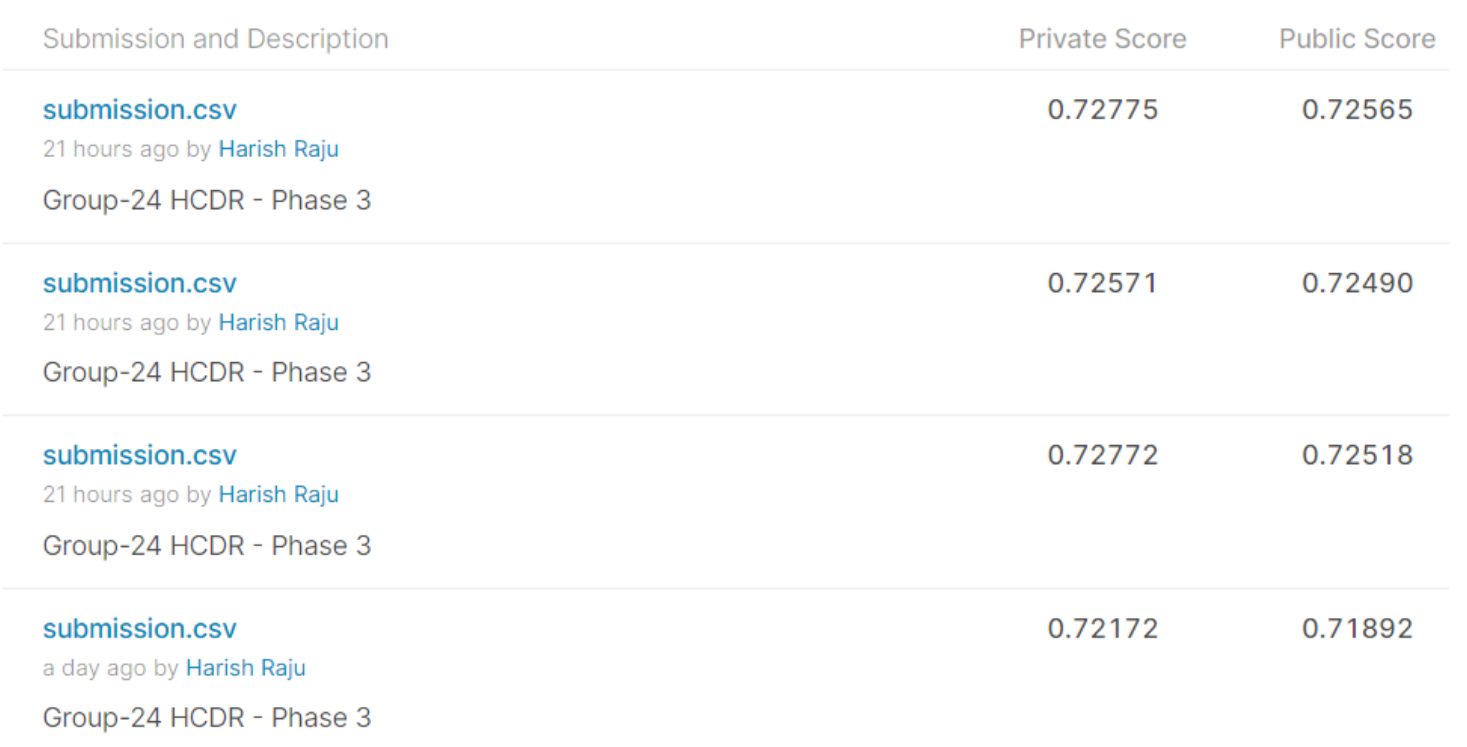

# References

Some of the material in this notebook has been adopted from [here](https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction/notebook)




https://towardsdatascience.com/multi-layer-perceptron-usingfastai-and-pytorch-9e401dd288b8

https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

https://www.kaggle.com/c/home-credit-default-risk/discussion/57750

https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/bar_stacked.html

# Kaggle submission via the command line API

## Submission File Prep

For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

```python 
SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2
etc.
```

In [328]:
X_kaggle_test = app_test_df

In [329]:
numerical_features = X_kaggle_test.select_dtypes(include = ['int64','float64']).columns
len(numerical_features)

1371

In [330]:
cat_features = X_kaggle_test.select_dtypes(include = ['object']).columns
len(cat_features)

16

In [331]:
X_kaggle_test[numerical_features] = X_kaggle_test[numerical_features].replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [332]:
X_kaggle_test[cat_features] = X_kaggle_test[cat_features].replace((np.inf, -np.inf, np.nan), 'NA').reset_index(drop=True)

In [357]:
test_class_scores = model_xgb.predict_proba(X_kaggle_test)[:, 1]

In [358]:
test_class_scores[0:10]

array([0.038862  , 0.15876238, 0.1091873 , 0.03601242, 0.11429568,
       0.08365726, 0.01498645, 0.04870316, 0.01891618, 0.13330118],
      dtype=float32)

In [359]:
# Submission dataframe
submit_df = datasets["application_test"][['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores

submit_df.head()

SK_ID_CURR    TARGET
0      100001  0.038862
1      100005  0.158762
2      100013  0.109187
3      100028  0.036012
4      100038  0.114296

In [361]:
submit_df.to_csv("submission.csv",index=False)

# Kaggle submission via the command line API

In [362]:
!pip install kaggle

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [363]:
! kaggle competitions submit -c home-credit-default-risk -f submission.csv -m "Group 24 Phase 3"

100%|████████████████████████████████████████| 876k/876k [00:00<00:00, 1.21MB/s]
Successfully submitted to Home Credit Default Risk

# Write-up 

## Project Abstract
In previous phases, we completed basic EDA and ran the baseline model for logistic regression, XGBoost and Random Forest classifier along with hyperparameter tuning for all three models. XGBoost model was found to be reporting best metrics after hyperparameter tuning, hence we used it. Furthermore, we carried out feature engineering by selecting two groups of highly correlated features - top 50 and top 25 respectively. Additionally, while using F1 scores, we encountered class balance issues, so instead of relying on accuracy solely, we moved forward with AUC scores as our evaluation metrics. The class imbalance issue was later handled and we have used accuracy, AUC score and F1 score as the evaluation metrics. We faced a lot of trouble incorporating F1 score as an evaluation metric, as well as dealing with NaN values in our datasets, but we overcame them. 
In this phase, our groups’ main aim was to create a neural network using PyTorch. We were having troubles with low accuracy, but we were able to fix the issue by switching our activation function from ReLU to Sigmoid. We also found that running 50/100 Epochs would somehow net us lower accuracy than running 20 Epochs. Our Tensorboard was not functional when we ran our notebook on AWS, but it worked when we ran it on IURed. In this phase, we successfully implemented Multi-Level Perceptron and reported a test accuracy of 72%. Our Kaggle Public score was reported as 0.72565, while our Private Score was reported as 0.72775. 
## Project Description
The aim of Home Credit Default Risk project is to provide a positive and safe borrowing experience for the unbanked population and ensure that people who can repay the loans are not rejected. Founded in 1997, Home Credit is an international non-bank financial institution that offers loans to people with little or no credit history. It uses alternative data to predict the repayment abilities of their customers and make sure they have a positive loan experience. 

## Feature Engineering
We performed feature engineering on secondary datasets and merged with application train and application test. For feature selection from application train, we selected top 50 and top 25 numeric features based on the correlation with target variable. All the numeric features as well as the engineered features were part of the final dataset. We used pipelines to avoid the data leakage during preprocessing of numeric and categorical features.
Features added:

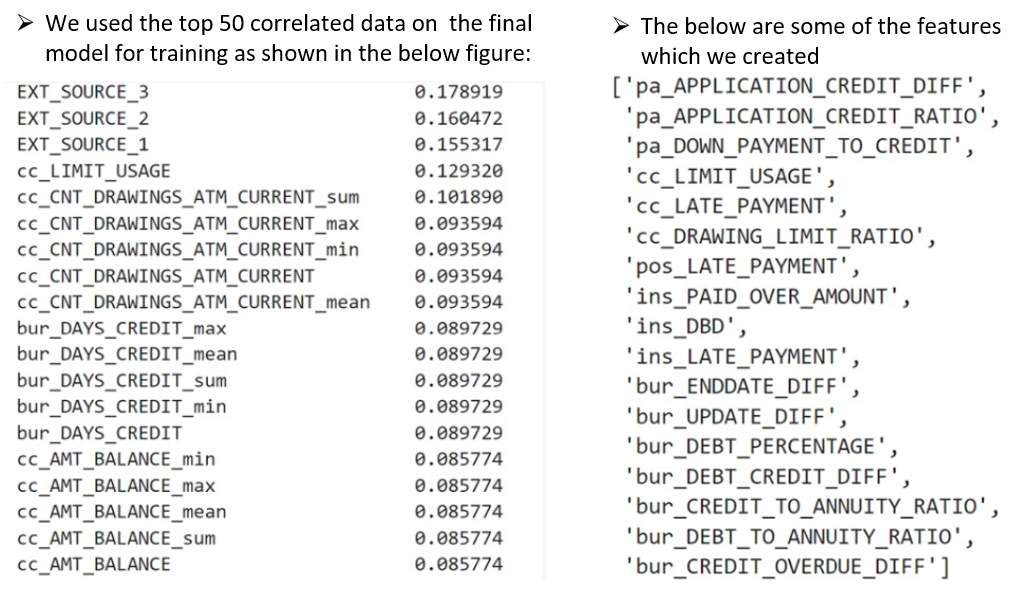

Above added features were chosen based on top 25 and top 50 (two seperate groups of highly correlating features) features.

## Hyperparameter Tuning
We chose gridsearch for the tuning the baseline model for logistic regression and random forests resulting in best parameters: {'lr_C': 10.0, 'lrpenalty': 'none'} and {'rmfbootstrap': True, 'rmfmax_depth': 10, 'rmfmax_features': 2, rmfn_estimators': 100} respectively, while we performed random search for tuning baseline model for XGBoost netting us best parameters: {'xgbmin_child_weight': 3, 'xgbmax_depth': 5, 'xgb_learning_rate': 0.1}.

## Pipelines

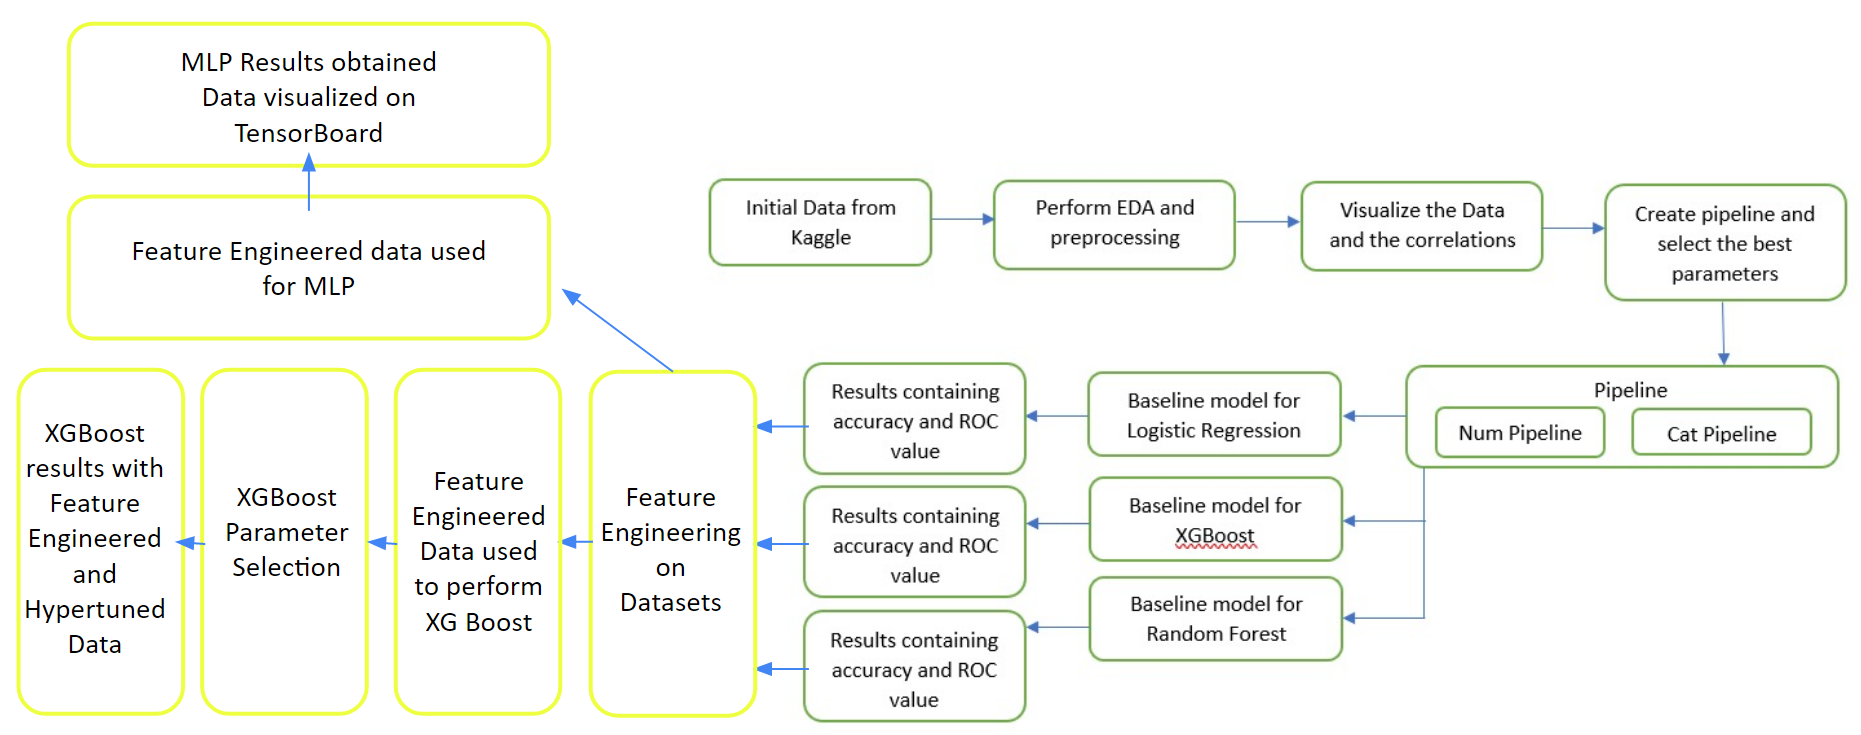

## Tensorboard Visualizations

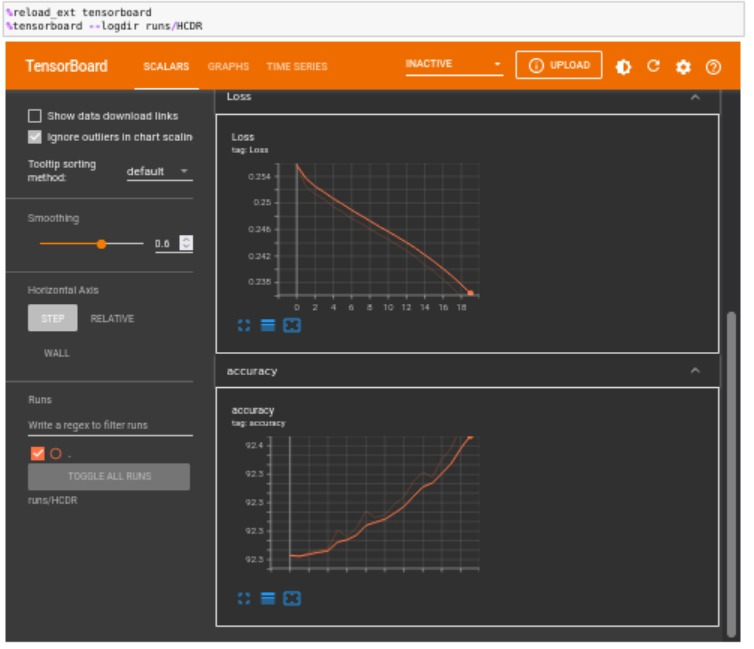

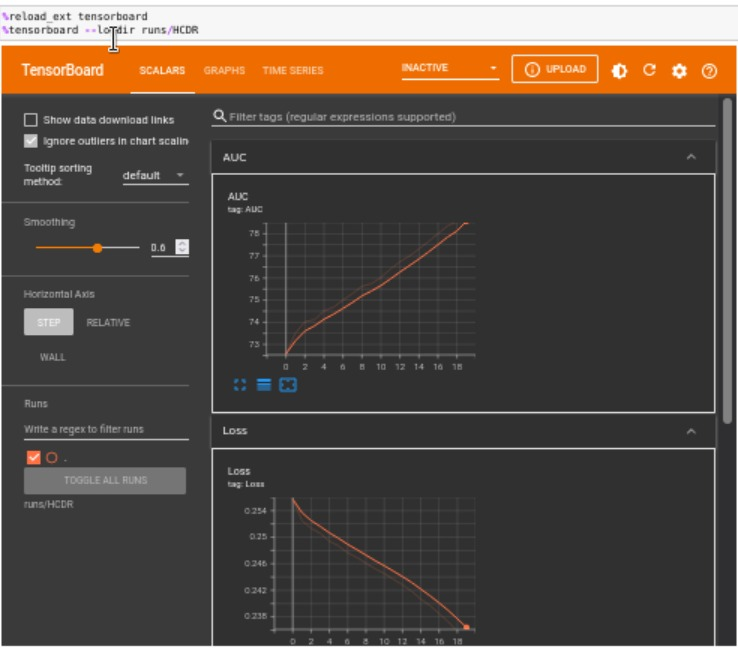

## Experimental Results

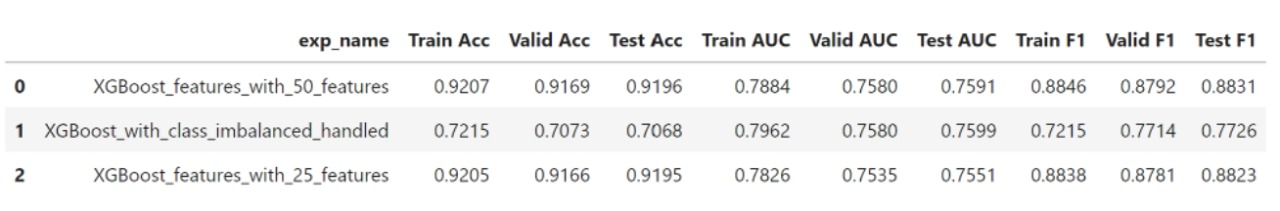

Multi-Layer Perceptron results:

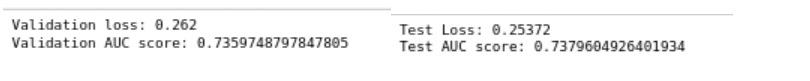

## Results & Discussion
We had already created the baseline models for three major analytical methods Logistic Regression, XGBoost and Random Forest Classifier, and found XGBoost to be the best performing model. Our models have used F1 score, AUC and accuracy as evaluation metrics in this phase, which have led to better results. We had fixed class imbalance to obtain a more generic accuracy value. In this phase, we have implemented Multi-Layer Perceptron using Sigmoid function, since ReLU function did not give us appropriate accuracy value. Test AUC score obtained in this phase was 0.7379604926401934. We also incorporated Tensorboard, but since it was not working on AWS, we ran it on IURed.


## Conclusion
The aim of the project is to determine individuals who are capable of repaying the loans. We successfully implemented the MLP(Multilayer Perceptrons) model with PyTorch, to obtain an accuracy of 73.79%. We found that Sigmoid activation function works best for us, and lower number of epochs (20 as opposed to 50~100) give us a higher accuracy. Overall, XGBoost Model gave us the best metrics after hyperparameter tuning compared to all the other models and gave us a test AUC score of 0.7962 when class imbalanced was performed on it. 